### Quantum-Driven Hybrid Deep Learning Model for Forex Price Prediction

# Project Description

Traditional and deep learning models such as LSTM and Transformers can predict general market trends but often fail to capture the hidden, non-linear, and chaotic behaviors in Forex data.

This project introduces a **Hybrid Quantum–Deep Learning Model** that merges the computational strengths of **Quantum Computing** with **Deep Neural Networks** to improve Forex price prediction.

By integrating **Quantum Machine Learning (QML)** techniques like **Variational Quantum Circuits (VQC)** and   with classical models such as **LSTM**, **GRU**, and hybrid models like QLSTM,QGRU,QTRANSFORMER  the system aims to:
- Learn deeper, complex relationships within Forex data.
- Capture non-linear dependencies missed by traditional models.
- Achieve higher accuracy and robustness in price forecasting.


TEAM MEMBERS:

1.M.V.RAGHUPATHI SAI

2.G.JEEVAN

3.R.SUNOJ

4.B.SIVA SAI

# About the Database

The dataset used in this project consists of **Forex (Foreign Exchange) price data**, containing features such as:
- **Open**, **High**, **Low**, and **Close** prices  
- **Volume**  
- **Timestamp (Date and Time)**  

### Data Source:
The data is fetched using the **Yahoo Finance API (yfinance)** library, which provides historical Forex data directly from Yahoo Finance.

### Data Usage in the Project:
1. **Data Collection:**  
   The `yfinance` library retrieves historical Forex currency pair data such as *EUR/USD*, *GBP/USD*, and *USD/JPY*.  

2. **Data Preprocessing:**  
   - Missing values are handled and data is normalized using **MinMaxScaler**.  
   - A **sliding window technique** is applied to convert time series data into supervised learning format for model training.  

3. **Training and Testing:**  
   - The processed data is split into training, validation, and testing sets.  
   - Each model (classical and quantum) is trained on this structured dataset.  

4. **Evaluation:**  
   - Predictions are compared with actual prices.  
   - Metrics like RMSE, MAE, and Directional Accuracy are computed.

This dataset structure enables both **classical deep learning** and **quantum-enhanced learning** models to analyze temporal patterns effectively.


## Installing Required Python Packages

This cell installs all the essential libraries for your project, including PyTorch for deep learning, PennyLane for quantum machine learning, and other scientific and data analysis tools. These installations ensure that your Colab environment has everything it needs to run your hybrid quantum–classical models.

In [ ]:
# Install PyTorch and related libraries (with CUDA 11.8 support for GPU acceleration)
!pip install --quiet torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu118

# Install PennyLane (for quantum computing), Autoray (backend library),
# and common data science libraries like yfinance, sklearn, pandas, matplotlib, tqdm
!pip install --quiet pennylane==0.34.0 autoray==0.6.7 yfinance scikit-learn pandas matplotlib tqdm

# Print confirmation message
print('Packages installed (if no errors). Restart runtime if Colab requests it.')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 91.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 82.9 MB/s eta 0:00:00
Packages installed (if no errors). Restart runtime if Colab requests it.


## Mounting Google Drive and Setting Project Directory

This cell connects Google Drive to your Colab environment, ensuring all project files (datasets, models, checkpoints, etc.) are saved persistently. It then sets up a directory path inside your Google Drive for this project.

In [ ]:
# Mount Google Drive to access saved files from your Drive in Colab
from google.colab import drive
drive.mount('/content/drive')

# Import the os module to handle directory operations
import os

# Define a directory path inside Google Drive for storing all project files
DRIVE_DIR = "/content/drive/MyDrive/quantum_project"

# Create the project folder if it doesn't already exist
os.makedirs(DRIVE_DIR, exist_ok=True)

# Confirm that Google Drive is mounted and show the working directory path
print("Drive mounted. Working directory:", DRIVE_DIR)


Mounted at /content/drive
Drive mounted. Working directory: /content/drive/MyDrive/quantum_project


## Core Helpers for Time Series Forecasting

This cell imports all required Python libraries for the project, sets up deterministic behavior for reproducible experiments, initializes the device (CPU or GPU), and checks if quantum computing libraries like PennyLane are available.

In [ ]:
# Importing standard Python modules for system operations, timing, and JSON handling
import os, time, json

# Importing NumPy for numerical computations
import numpy as np

# Importing pandas for data manipulation and analysis
import pandas as pd

# Importing matplotlib for visualizations
import matplotlib.pyplot as plt

# Importing tqdm to display progress bars during loops
from tqdm import tqdm

# Importing random for controlling Python’s random number generator
import random

# Importing sys to access system-specific parameters and functions
import sys


# Importing required modules from scikit-learn for preprocessing and evaluation
from sklearn.preprocessing import MinMaxScaler, StandardScaler   # For scaling numerical features
from sklearn.decomposition import PCA                             # For dimensionality reduction
from sklearn.manifold import TSNE                                 # For visualizing high-dimensional data
from sklearn.metrics import mean_squared_error, mean_absolute_error  # For model performance evaluation


# Importing PyTorch libraries for deep learning models
import torch
import torch.nn as nn
import torch.optim as optim


# Attempt to import quantum libraries safely (useful if available)
QUANTUM_AVAILABLE = False
try:
    import pennylane as qml                     # PennyLane for quantum machine learning
    from pennylane import qnn                   # Quantum neural network tools
    QUANTUM_AVAILABLE = True                    # Mark as available if import succeeds
except Exception as _e:
    # If PennyLane is not available, print short error message without showing full traceback
    print("pennylane not available in this environment:", type(_e).__name__, str(_e))


# Setting a random seed for reproducibility of experiments
SEED = 42

# Function to apply the seed to all libraries used (NumPy, PyTorch, random)
def set_seed(seed=SEED):
    random.seed(seed)                 # Set Python random seed
    np.random.seed(seed)              # Set NumPy random seed
    torch.manual_seed(seed)           # Set PyTorch CPU seed

    # If CUDA GPU is available, set GPU seed for reproducibility
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

    # Try to enable deterministic behavior in PyTorch
    # Some operations might not support strict determinism, so we handle safely
    try:
        torch.use_deterministic_algorithms(True)  # Enforce deterministic behavior
    except Exception:
        # If the strict method fails, apply a best-effort fallback for determinism
        try:
            torch.backends.cudnn.deterministic = True
            torch.backends.cudnn.benchmark = False
        except Exception:
            pass  # If even this fails, continue without stopping the notebook

# Apply seed settings for reproducibility
set_seed(SEED)


# Choose computing device: use GPU if available, otherwise use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Print which device is being used and whether quantum libraries are available
print(f"Device -> {device} | Quantum available -> {QUANTUM_AVAILABLE} | PyTorch {torch.__version__}")


# Helper function to print versions of key packages (useful for debugging and consistency)
def env_versions():
    import sklearn, matplotlib, numpy, pandas
    return {
        "python": sys.version.split()[0],                         # Python version
        "torch": torch.__version__,                               # PyTorch version
        "sklearn": sklearn.__version__,                           # scikit-learn version
        "matplotlib": matplotlib.__version__,                     # matplotlib version
        "numpy": numpy.__version__,                               # NumPy version
        "pandas": pandas.__version__,                             # pandas version
        "pennylane": getattr(qml, "__version__", "not-installed") # PennyLane version if installed
        if QUANTUM_AVAILABLE else "not-installed"
    }

# Display environment versions for confirmation
print("Versions:", env_versions())


# Set default visualization settings for plots
plt.rcParams["figure.figsize"] = (10, 4)   # Set figure size
plt.rcParams["axes.grid"] = True           # Enable gridlines in plots


Device -> cpu | Quantum available -> True | PyTorch 2.8.0+cu126
Versions: {'python': '3.12.12', 'torch': '2.8.0+cu126', 'sklearn': '1.6.1', 'matplotlib': '3.10.0', 'numpy': '2.0.2', 'pandas': '2.2.2', 'pennylane': '0.34.0'}


In [ ]:
# --- Cell 4 (UPDATED): Core helpers (windowing, scalers, training / eval utilities) ---

import os, pickle
from torch.utils.data import TensorDataset, DataLoader
from joblib import dump, load

# --- 1️⃣ WINDOWING / SERIES HELPERS ---
def create_sliding_windows(arr, window, target_col=3):
    """
    arr : 2D numpy array (n_rows, n_features)
    target_col : index of column to predict (default=3 for 'Close')
    returns: X_windows (n_windows, window, n_features), y (n_windows,)
    """
    X, y = [], []
    for i in range(len(arr) - window):
        X.append(arr[i:i+window])
        y.append(arr[i + window, target_col])
    X, y = np.array(X, dtype=np.float32), np.array(y, dtype=np.float32)
    return X, y


# --- 2️⃣ SCALER WRAPPER ---
class TimeSeriesScaler:
    """
    Wraps feature & target scalers. Fit only on training data.
    Supports saving & loading as .joblib for inference consistency.
    """
    def __init__(self, feat_scaler=None, target_scaler=None):
        self.feat_scaler = feat_scaler or MinMaxScaler()
        self.target_scaler = target_scaler or MinMaxScaler()
        self.fitted = False

    def fit(self, X_train, y_train):
        N, seq, feat = X_train.shape
        self.feat_scaler.fit(X_train.reshape(-1, feat))
        self.target_scaler.fit(y_train.reshape(-1, 1))
        self.fitted = True

    def transform_X(self, X):
        N, seq, feat = X.shape
        Xs = self.feat_scaler.transform(X.reshape(-1, feat)).reshape(N, seq, feat)
        return Xs.astype(np.float32)

    def transform_y(self, y):
        return self.target_scaler.transform(y.reshape(-1, 1)).reshape(-1).astype(np.float32)

    def inverse_y(self, y_scaled):
        return self.target_scaler.inverse_transform(y_scaled.reshape(-1, 1)).reshape(-1)

    def save(self, path):
        os.makedirs(os.path.dirname(path), exist_ok=True)
        dump(self, path)  # <-- Use joblib for safety with numpy
        print(f"✅ Scaler saved to: {path}")

    @staticmethod
    def load(path):
        print(f"🔁 Loading scaler from: {path}")
        return load(path)


# --- 3️⃣ TORCH TRAINING / EVAL UTILITIES ---
def make_dataloader(X, y, batch_size=64, shuffle=True):
    ds = TensorDataset(torch.from_numpy(X), torch.from_numpy(y))
    return DataLoader(ds, batch_size=batch_size, shuffle=shuffle)


def train_torch_model(
    model, X_train, y_train, X_val, y_val,
    epochs=400, lr=5e-4, device="cpu", patience=25
):
    """
    Generic trainer for classical & quantum models.
    - Fixes ReduceLROnPlateau verbose bug for older torch.
    - Removes unsafe mean() on model outputs.
    - Adds automatic best model restore.
    """
    model.to(device)
    opt = torch.optim.Adam(model.parameters(), lr=lr)

    # ✅ Fix: 'verbose' removed for older torch versions
    try:
        scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(opt, factor=0.5, patience=30, verbose=True)
    except TypeError:
        scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(opt, factor=0.5, patience=30)

    loss_fn = nn.MSELoss()

    train_loader = DataLoader(
        TensorDataset(
            torch.tensor(X_train, dtype=torch.float32),
            torch.tensor(y_train, dtype=torch.float32)
        ),
        batch_size=64, shuffle=True
    )

    val_x = torch.tensor(X_val, dtype=torch.float32).to(device)
    val_y = torch.tensor(y_val, dtype=torch.float32).to(device)

    best_val = float("inf")
    patience_counter = 0
    all_train_losses, all_val_losses = [], []

    print(f"🚀 Training {model.__class__.__name__} for {epochs} epochs on {device}")

    for epoch in range(epochs):
        model.train()
        batch_losses = []

        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)
            out = model(xb)

            # ✅ Fix: never average predictions — only squeeze if last dim = 1
            if out.ndim > 1 and out.shape[-1] == 1:
                out = out.squeeze(-1)
            yb = yb.reshape_as(out)

            loss = loss_fn(out, yb)
            opt.zero_grad()
            loss.backward()
            opt.step()
            batch_losses.append(loss.item())

        # validation
        model.eval()
        with torch.no_grad():
            out_val = model(val_x)
            if out_val.ndim > 1 and out_val.shape[-1] == 1:
                out_val = out_val.squeeze(-1)
            val_y = val_y.reshape_as(out_val)
            val_loss = loss_fn(out_val, val_y).item()

        mean_train = np.mean(batch_losses)
        all_train_losses.append(mean_train)
        all_val_losses.append(val_loss)
        scheduler.step(val_loss)

        print(f"Epoch {epoch+1:03d}/{epochs} | Train: {mean_train:.6f} | Val: {val_loss:.6f}")

        # early stopping
        if val_loss < best_val - 1e-5:
            best_val = val_loss
            best_state = model.state_dict()
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f"⏸ Early stopping at epoch {epoch+1}")
                break

    model.load_state_dict(best_state)
    print(f"✅ Best val_loss: {best_val:.6f}")
    preds, metrics = eval_torch_model(model, X_val, y_val, device=device)
    return model, preds, metrics


def eval_torch_model(model, X, y, device="cpu"):
    """
    Evaluates model safely — fixes shape issues & computes metrics.
    """
    model.eval()
    preds = []

    with torch.no_grad():
        for i in range(0, len(X), 64):
            xb = torch.tensor(X[i:i+64], dtype=torch.float32).to(device)
            out = model(xb)
            if out.ndim > 1 and out.shape[-1] == 1:
                out = out.squeeze(-1)
            preds.append(out.cpu().numpy())

    preds = np.concatenate(preds, axis=0)
    n = min(len(preds), len(y))
    preds, y = preds[:n], y[:n]
    preds, y = preds.reshape(-1), y.reshape(-1)

    rmse = np.sqrt(np.mean((preds - y) ** 2))
    mae = np.mean(np.abs(preds - y))
    dir_acc = np.mean(np.sign(np.diff(preds)) == np.sign(np.diff(y))) if len(y) > 1 else np.nan

    return preds, {
        "rmse": float(rmse),
        "mae": float(mae),
        "dir_acc": float(dir_acc)
    }


# --- 4️⃣ SAVE / LOAD HELPERS ---
def save_model(model, path):
    os.makedirs(os.path.dirname(path), exist_ok=True)
    torch.save(model.state_dict(), path)
    print(f"💾 Model saved to {path}")

def load_model_state(model, path, map_location="cpu"):
    state = torch.load(path, map_location=map_location)
    model.load_state_dict(state)
    print(f"🔁 Loaded weights from {path}")
    return model


print("✅ Helpers ready: windows, TimeSeriesScaler, train_torch_model, eval_torch_model, save/load.")


✅ Helpers ready: windows, TimeSeriesScaler, train_torch_model, eval_torch_model, save/load.


##Quantum Variational Circuit (VQC) Torch Layer Creator

This function builds a hybrid quantum layer that can be inserted into PyTorch models such as QLSTM, QGRU, or QTransformer.
It uses PennyLane’s QNode + TorchLayer integration to make the quantum circuit differentiable and trainable like a regular neural layer.

In [ ]:
# Importing the required module from PennyLane that allows connecting quantum circuits with PyTorch
from pennylane import qnn

# Function to create a VQC Torch Layer
def make_vqc_torchlayer(n_qubits=4, n_layers=1):
    # Creating a quantum device with a given number of qubits using the default simulator
    dev = qml.device('default.qubit', wires=n_qubits)

    # Defining a quantum node (QNode) that links quantum operations to PyTorch
    @qml.qnode(dev, interface='torch')
    def qc(inputs, weights):
        # Encoding classical data (inputs) into quantum states using rotation gates
        qml.templates.AngleEmbedding(inputs, wires=range(n_qubits))
        # Applying entangling layers to connect qubits using the provided weights
        qml.templates.BasicEntanglerLayers(weights, wires=range(n_qubits))
        # Measuring expectation values of the Pauli-Z operator for each qubit (returns real numbers)
        return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

    # Defining the shape of the trainable weights for the entangler layers
    weight_shapes = {'weights': (n_layers, n_qubits)}

    # Attempting to create a PyTorch-compatible quantum layer
    try:
        layer = qnn.TorchLayer(qc, weight_shapes)  # Converts QNode into a Torch layer
        print('Created VQC TorchLayer')             # Message confirming successful creation
        return layer                               # Returning the created layer

    # Handling exceptions if layer creation fails
    except Exception as e:
        print('TorchLayer failed, fallback', e)    # Prints error message if creation fails
        return None                                # Returns None as a fallback

# Setting the number of qubits
n_qubits = 4
# Calling the function to create a 1-layer quantum circuit with 4 qubits
vqc_layer = make_vqc_torchlayer(n_qubits=n_qubits, n_layers=1)


Created VQC TorchLayer


##Classical and Quantum Architectures

This cell defines all neural network architectures used in your forex quantum forecasting project.
It includes both classical models (LSTM, GRU, Transformer) and their quantum-enhanced counterparts (QLSTM, QGRU, QTransformer).
Each model follows a common pattern — feature extraction + optional quantum layer + final linear output for prediction.

In [ ]:
# Importing required deep learning libraries
import torch
import torch.nn as nn

# Checking if the quantum torch layer helper function exists.
# This helper (make_vqc_torchlayer) connects classical models with quantum layers.
# If not defined earlier, we create a fallback using a simple Linear layer instead.
try:
    _ = make_vqc_torchlayer
except NameError:
    def make_vqc_torchlayer(n_qubits=4, n_layers=1):
        print(" make_vqc_torchlayer not found — using fallback linear layer")
        return nn.Linear(n_qubits, n_qubits)
    QUANTUM_AVAILABLE = False


# Defining the classical LSTM baseline model
class LSTMBaseline(nn.Module):
    def __init__(self, input_size=4, hidden_size=48):
        super().__init__()
        # The LSTM layer extracts temporal (sequence) patterns from price data
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        # Fully connected output layer predicts the next price
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        # hn represents the hidden state after the last timestep
        out, (hn, _) = self.lstm(x)
        # Pass the final hidden state through the output layer
        return self.fc(hn[-1]).squeeze(-1)


# Defining the Quantum LSTM model (LSTM with a quantum variational layer)
class QLSTM(nn.Module):
    def __init__(self, input_size=4, hidden=48, n_qubits=4):
        super().__init__()
        # First part: classical LSTM for sequential learning
        self.lstm = nn.LSTM(input_size, hidden, batch_first=True)
        # Linear projection to map hidden features to quantum inputs
        self.qproj = nn.Linear(hidden, n_qubits)
        # Quantum layer: acts as a non-linear embedding transformation
        try:
            self.qlayer = make_vqc_torchlayer(n_qubits=n_qubits, n_layers=1)
        except Exception:
            print(" Using fallback linear layer for QLSTM")
            self.qlayer = nn.Linear(n_qubits, n_qubits)
        # Final output layer to predict the next value
        self.fc = nn.Linear(n_qubits, 1)

    def forward(self, x):
        # Extract hidden states from LSTM
        out, (hn, _) = self.lstm(x)
        h = hn[-1]
        # Project into quantum space
        qin = torch.tanh(self.qproj(h))
        # Apply quantum transformation (or fallback linear)
        qout = self.qlayer(qin)
        # Ensure tensor shape compatibility
        if isinstance(qout, list):
            qout = torch.stack(qout, dim=1).squeeze(-1)
        return self.fc(qout).squeeze(-1)


# Defining the classical GRU baseline model
class GRUBaseline(nn.Module):
    def __init__(self, input_size=4, hidden_size=48):
        super().__init__()
        # GRU (Gated Recurrent Unit) for faster sequence modeling
        self.gru = nn.GRU(input_size, hidden_size, batch_first=True)
        # Final linear output layer
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, hn = self.gru(x)
        # hn[-1] gives the last hidden state in the sequence
        return self.fc(hn[-1]).squeeze(-1)


# Defining the Quantum GRU model (classical GRU + quantum feature layer)
class QGRU(nn.Module):
    def __init__(self, input_size=4, hidden=48, n_qubits=4):
        super().__init__()
        # Classical GRU for temporal feature extraction
        self.gru = nn.GRU(input_size, hidden, batch_first=True)
        # Projection to quantum input dimension
        self.qproj = nn.Linear(hidden, n_qubits)
        try:
            # Attach quantum layer if available
            self.qlayer = make_vqc_torchlayer(n_qubits=n_qubits, n_layers=1)
        except Exception:
            print(" Using fallback linear layer for QGRU")
            self.qlayer = nn.Linear(n_qubits, n_qubits)
        # Output layer to produce scalar prediction
        self.fc = nn.Linear(n_qubits, 1)

    def forward(self, x):
        out, hn = self.gru(x)
        h = hn[-1]
        qin = torch.tanh(self.qproj(h))
        qout = self.qlayer(qin)
        if isinstance(qout, list):
            qout = torch.stack(qout, dim=1).squeeze(-1)
        return self.fc(qout).squeeze(-1)


# Defining the classical Transformer baseline
class TransformerBaseline(nn.Module):
    def __init__(self, input_size=4, hidden_size=48, num_heads=4, num_layers=2):
        super().__init__()
        # Transformer encoder layer to learn attention over past timesteps
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=input_size, nhead=num_heads, dim_feedforward=hidden_size, batch_first=True
        )
        # Stacking multiple encoder layers
        self.encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        # Linear output for next price prediction
        self.fc = nn.Linear(input_size, 1)

    def forward(self, x):
        out = self.encoder(x)
        # Use the representation from the final timestep
        h = out[:, -1, :]
        return self.fc(h).squeeze(-1)


# Defining the Quantum Transformer model
class QTransformer(nn.Module):
    def __init__(self, input_size=4, hidden=48, n_qubits=4, num_heads=4, num_layers=2):
        super().__init__()
        # Transformer encoder built with attention mechanisms
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=hidden,
            nhead=num_heads,
            dim_feedforward=hidden * 2,  # slightly larger feedforward network
            batch_first=True
        )
        self.encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        # Linear projection to match Transformer input dimension
        self.input_proj = nn.Linear(input_size, hidden)
        # Quantum projection layer
        self.qproj = nn.Linear(hidden, n_qubits)
        try:
            # Attach quantum feature transformation layer
            self.qlayer = make_vqc_torchlayer(n_qubits=n_qubits, n_layers=1)
        except Exception:
            print("⚠️ Using fallback linear layer for QTransformer")
            self.qlayer = nn.Linear(n_qubits, n_qubits)
        # Final output layer for prediction
        self.fc = nn.Linear(n_qubits, 1)

    def forward(self, x):
        x = self.input_proj(x)      # Match input size to hidden dimension
        out = self.encoder(x)       # Pass through Transformer layers
        h = out[:, -1, :]           # Use last timestep output
        qin = torch.tanh(self.qproj(h))  # Map hidden features to quantum input
        qout = self.qlayer(qin)          # Apply quantum operation
        if isinstance(qout, list):
            qout = torch.stack(qout, dim=1).squeeze(-1)
        return self.fc(qout).squeeze(-1)

print(" Model Zoo ready: LSTM / QLSTM / GRU / QGRU  / QTransformer")


✅ Model Zoo ready: LSTM / QLSTM / GRU / QGRU / Transformer / QTransformer


##Robust Auto-Healing Data Loader

This cell automatically loads forex data (EURUSD, GBPUSD, USDJPY, etc.) from your Google Drive or downloads it from Yahoo Finance when missing or corrupted.
It cleans, converts, and repairs all numeric columns, removes invalid rows, fills missing values, and prepares the data for model training by generating sliding windows.

In [ ]:
# Importing all essential libraries
import os                  # for file handling and directory operations
import numpy as np         # for numerical operations and arrays
import pandas as pd        # for reading and cleaning data
import yfinance as yf      # for downloading forex data directly

# Setting the Drive directory where data files are stored or saved
DRIVE_DIR = "/content/drive/MyDrive/quantum_project"
os.makedirs(DRIVE_DIR, exist_ok=True)  # create folder if it doesn't exist

# Function: Smart auto-healing data loader
def load_pair(pair_name: str):
    """
    Load forex data from Google Drive or Yahoo Finance.
    Automatically fixes any corrupted numeric data and ensures a clean OHLCV DataFrame.
    """

    # File path for the current forex pair (e.g., EURUSD.csv)
    path = os.path.join(DRIVE_DIR, f"{pair_name}.csv")

    # Inner function to download clean data if the local file is missing or invalid
    def _download_clean():
        print(f" Downloading fresh {pair_name} data (1D)...")
        # Using yfinance to fetch 2 years of daily forex data
        df = yf.download(f"{pair_name}=X", period="2y", interval="1d", progress=False)
        if df.empty:
            raise ValueError(f"No data fetched for {pair_name}")
        # Reset index and save a clean version locally
        df.reset_index(inplace=True)
        df.to_csv(path, index=False)
        print(f" Saved clean dataset: {path}")
        return df

    # Step 1: Try to load the cached CSV file if it already exists
    if os.path.exists(path):
        print(f" Using cached {pair_name}.csv")
        try:
            df = pd.read_csv(path)
        except Exception as e:
            # If the file is unreadable, download a fresh one
            print(f" Failed to read cached file ({e}) — re-downloading.")
            df = _download_clean()
    else:
        # If no local file exists, download new data from yfinance
        df = _download_clean()

    # Step 2: Clean column names (remove spaces, capitalize, and standardize)
    df.columns = [c.strip().capitalize().replace(" ", "_") for c in df.columns]
    if "Datetime" in df.columns:
        df.rename(columns={"Datetime": "Date"}, inplace=True)

    # Step 3: Ensure all important columns exist (Date, Open, High, Low, Close, Volume)
    keep_cols = ["Date", "Open", "High", "Low", "Close", "Volume"]
    for col in keep_cols:
        if col not in df.columns:
            df[col] = 0.0 if col == "Volume" else np.nan  # add missing columns

    # Step 4: Remove duplicate rows and drop missing Close values
    df = df.drop_duplicates(subset="Date")
    df = df[df["Close"].notna()]

    # Step 5: Clean numeric columns to remove commas, symbols, or text artifacts
    for col in ["Open", "High", "Low", "Close", "Volume"]:
        df[col] = (
            df[col]
            .astype(str)
            .str.replace(",", "")
            .str.replace(" ", "")
            .str.replace("=", "", regex=False)
            .str.replace("X", "", regex=False)
        )
        df[col] = pd.to_numeric(df[col], errors="coerce")  # convert to numeric safely

    # Step 6: Fill remaining missing values with forward and backward fills
    df = df.fillna(method="ffill").fillna(method="bfill")

    # Step 7: If critical numeric data is still missing, re-download clean data
    if df[["Open", "High", "Low", "Close"]].isna().any().any():
        print(f" Corrupted numeric data detected for {pair_name}, re-downloading.")
        df = _download_clean()

    # Step 8: Keep only numeric OHLCV columns for model input
    df_numeric = df[["Open", "High", "Low", "Close", "Volume"]].astype(float)
    print(f" {pair_name}: Loaded {len(df_numeric)} clean rows.")
    return df_numeric

# Function: Create sliding windows from numeric data
def create_sliding_windows(arr, window=30):
    """
    Convert OHLC or OHLCV arrays into overlapping sliding windows for training and validation.
    Each window contains 'window' time steps of input features, and the label is the next close price.
    """
    X, y = [], []
    n_features = arr.shape[1]

    for i in range(len(arr) - window):
        # Select a segment of data as input (covering all features)
        X.append(arr[i:i + window, :n_features])
        # Use the next closing price as the prediction target
        y.append(arr[i + window, 3])

    if not X:
        raise ValueError("Insufficient data for window creation.")

    return np.array(X, dtype=np.float32), np.array(y, dtype=np.float32)

print(" Data loader + window creation fully ready (no duplicate QLSTM).")


✅ Data loader + window creation fully ready (no duplicate QLSTM).


##Per-pair Summary Generation (Auto Feature Detection + Hybrid Quantum-Classical Training)

This cell loads each forex pair (EURUSD, GBPUSD, USDJPY), automatically detects usable features (OHLCV), scales data, trains both classical and quantum LSTM models, and saves a summary comparing their performance metrics (RMSE, MAE, and Directional Accuracy)

In [ ]:
# Importing all required Python libraries for data handling and deep learning
import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn

# Reusing previously defined helper functions:
# load_pair, TimeSeriesScaler, create_sliding_windows,
# train_torch_model, eval_torch_model, save_model,
# make_vqc_torchlayer, and QLSTM

# Defining the currency pairs to process
pairs = ["EURUSD", "GBPUSD", "USDJPY"]

# Initializing an empty list to store model performance summaries for each pair
summary_rows = []

# Setting key hyperparameters for model training
EPOCHS_LSTM = 80        # Number of training epochs for classical LSTM
EPOCHS_QLSTM = 400       # Number of training epochs for Quantum LSTM
LR = 5e-4                # Learning rate for optimization
BATCH = 64               # Mini-batch size for training
WINDOW = 32              # Lookback window length for time-series
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Use GPU if available

# Checking if the quantum layer (VQC) backend is available on the system
try:
    _ = make_vqc_torchlayer(2, 1)
    QUANTUM_AVAILABLE = True
except Exception as e:
    print(f" Quantum backend check failed: {e}")
    QUANTUM_AVAILABLE = False
print(f" Quantum backend available: {QUANTUM_AVAILABLE}")

# Defining the baseline classical LSTM model architecture
class LSTMBaseline(nn.Module):
    def __init__(self, input_size=4, hidden_size=48):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)
    def forward(self, x):
        _, (hn, _) = self.lstm(x)
        return self.fc(hn[-1]).squeeze(-1)

# Looping through each currency pair (EURUSD, GBPUSD, USDJPY)
for PAIR in pairs:
    print(f"\n======================================================================")
    print(f"PAIR: {PAIR}")
    print(f"======================================================================")

    try:
        # Loading the dataset for the current pair
        df_pair = load_pair(PAIR)

        # Ensuring the data is not empty or too short
        if df_pair is None or df_pair.empty:
            raise ValueError(f"{PAIR}: DataFrame is empty.")
        if len(df_pair) < WINDOW + 2:
            raise ValueError(f"{PAIR}: Not enough rows ({len(df_pair)}).")

        # Automatically selecting input features
        # Use OHLCV (Open, High, Low, Close, Volume) if available, otherwise fallback to OHLC
        if all(col in df_pair.columns for col in ["Open", "High", "Low", "Close", "Volume"]):
            arr = df_pair[["Open", "High", "Low", "Close", "Volume"]].values
        else:
            arr = df_pair[["Open", "High", "Low", "Close"]].values

        # Counting the number of input features used
        n_features = arr.shape[1]
        print(f" Using {n_features} input features.")

        # Creating sliding time windows for supervised learning
        X_all, y_all = create_sliding_windows(arr, window=WINDOW)
        if len(X_all) < 10:
            raise ValueError(f"{PAIR}: Too few windows ({len(X_all)}).")
        print(f" Windowed data created: X={X_all.shape}, y={y_all.shape}")

        # Splitting data into Train, Validation, and Test sets
        N = len(X_all)
        test_size = int(N * 0.15)
        val_size = int(N * 0.10)
        train_end = N - val_size - test_size
        X_tr, y_tr = X_all[:train_end], y_all[:train_end]
        X_val, y_val = X_all[train_end:train_end + val_size], y_all[train_end:train_end + val_size]
        X_te, y_te = X_all[train_end + val_size:], y_all[train_end + val_size:]

        # Scaling all datasets to stabilize training and improve convergence
        scaler = TimeSeriesScaler()
        scaler.fit(X_tr, y_tr)
        X_tr_s = scaler.transform_X(X_tr)
        X_val_s = scaler.transform_X(X_val)
        X_te_s = scaler.transform_X(X_te)
        y_tr_s = scaler.transform_y(y_tr)
        y_val_s = scaler.transform_y(y_val)
        y_te_s = scaler.transform_y(y_te)
        print(f" Scaled data: Train={X_tr_s.shape}, Val={X_val_s.shape}, Test={X_te_s.shape}")

        # Training a classical LSTM model
        lstm_local = LSTMBaseline(input_size=n_features, hidden_size=48).to(device)
        lstm_local, _, m_l_val = train_torch_model(
            lstm_local, X_tr_s, y_tr_s, X_val_s, y_val_s,
            epochs=EPOCHS_LSTM, lr=LR, device=device
        )
        preds_l_s, m_l_test = eval_torch_model(lstm_local, X_te_s, y_te_s, device=device)
        save_model(lstm_local, os.path.join(DRIVE_DIR, f"LSTM_{PAIR}.pt"))
        print(f" LSTM done: RMSE={m_l_test['rmse']:.5f}, DirAcc={m_l_test['dir_acc']:.2f}%")

        # Training a Quantum LSTM model (only if quantum backend is available)
        if QUANTUM_AVAILABLE:
            qlstm_local = QLSTM(input_size=n_features, hidden=48, n_qubits=4).to(device)
            qlstm_local, _, m_q_val = train_torch_model(
                qlstm_local, X_tr_s, y_tr_s, X_val_s, y_val_s,
                epochs=EPOCHS_QLSTM, lr=LR, device=device
            )
            preds_q_s, m_q_test = eval_torch_model(qlstm_local, X_te_s, y_te_s, device=device)
            save_model(qlstm_local, os.path.join(DRIVE_DIR, f"QLSTM_{PAIR}.pt"))
            print(f" QLSTM done: RMSE={m_q_test['rmse']:.5f}, DirAcc={m_q_test['dir_acc']:.2f}%")
        else:
            m_q_test = {"rmse": np.nan, "mae": np.nan, "dir_acc": np.nan}
            print(" Skipped QLSTM — quantum backend unavailable.")

        # Saving the performance summary for this currency pair
        summary_rows.append({
            "pair": PAIR,
            "lstm_rmse": m_l_test["rmse"],
            "qlstm_rmse": m_q_test["rmse"],
            "lstm_mae": m_l_test["mae"],
            "qlstm_mae": m_q_test["mae"],
            "lstm_diracc": m_l_test["dir_acc"],
            "qlstm_diracc": m_q_test["dir_acc"]
        })

    except Exception as e:
        import traceback
        traceback.print_exc(limit=1)
        print(f" Error for {PAIR}: {e}")
        summary_rows.append({
            "pair": PAIR,
            "lstm_rmse": np.nan, "qlstm_rmse": np.nan,
            "lstm_mae": np.nan, "qlstm_mae": np.nan,
            "lstm_diracc": np.nan, "qlstm_diracc": np.nan
        })

# Saving all summary results into a single CSV file for easy comparison
summary_path = os.path.join(DRIVE_DIR, "summary_per_pair.csv")
pd.DataFrame(summary_rows).to_csv(summary_path, index=False)
print(f"\n Saved summary_per_pair.csv to {summary_path} ({len(summary_rows)} entries)")


Created VQC TorchLayer
🧠 Quantum backend available: True

PAIR: EURUSD
📂 Using cached EURUSD.csv


/tmp/ipython-input-278092034.py:61: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method="ffill").fillna(method="bfill")


✅ EURUSD: Loaded 521 clean rows.
📊 Using 5 input features.
✅ Windowed data created: X=(489, 32, 5), y=(489,)
✅ Scaled data: Train=(368, 32, 5), Val=(48, 32, 5), Test=(73, 32, 5)
🚀 Training LSTMBaseline for 80 epochs on cpu
Epoch 001/80 | Train: 0.175819 | Val: 0.811029
Epoch 002/80 | Train: 0.137626 | Val: 0.683616
Epoch 003/80 | Train: 0.104740 | Val: 0.556219
Epoch 004/80 | Train: 0.072879 | Val: 0.422170
Epoch 005/80 | Train: 0.044912 | Val: 0.278348
Epoch 006/80 | Train: 0.022763 | Val: 0.136891
Epoch 007/80 | Train: 0.014609 | Val: 0.043682
Epoch 008/80 | Train: 0.016196 | Val: 0.039387
Epoch 009/80 | Train: 0.012954 | Val: 0.069940
Epoch 010/80 | Train: 0.011189 | Val: 0.084365
Epoch 011/80 | Train: 0.010663 | Val: 0.071173
Epoch 012/80 | Train: 0.009464 | Val: 0.045900
Epoch 013/80 | Train: 0.008297 | Val: 0.026548
Epoch 014/80 | Train: 0.007588 | Val: 0.017785
Epoch 015/80 | Train: 0.006799 | Val: 0.015966
Epoch 016/80 | Train: 0.006127 | Val: 0.012874
Epoch 017/80 | Train: 0.0

/tmp/ipython-input-278092034.py:61: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method="ffill").fillna(method="bfill")


✅ GBPUSD: Loaded 521 clean rows.
📊 Using 5 input features.
✅ Windowed data created: X=(489, 32, 5), y=(489,)
✅ Scaled data: Train=(368, 32, 5), Val=(48, 32, 5), Test=(73, 32, 5)
🚀 Training LSTMBaseline for 80 epochs on cpu
Epoch 001/80 | Train: 0.444739 | Val: 1.469361
Epoch 002/80 | Train: 0.369674 | Val: 1.251343
Epoch 003/80 | Train: 0.297416 | Val: 1.038985
Epoch 004/80 | Train: 0.230542 | Val: 0.820761
Epoch 005/80 | Train: 0.163688 | Val: 0.587295
Epoch 006/80 | Train: 0.096038 | Val: 0.333254
Epoch 007/80 | Train: 0.035624 | Val: 0.096819
Epoch 008/80 | Train: 0.013030 | Val: 0.008047
Epoch 009/80 | Train: 0.020513 | Val: 0.020600
Epoch 010/80 | Train: 0.011122 | Val: 0.065179
Epoch 011/80 | Train: 0.011299 | Val: 0.079885
Epoch 012/80 | Train: 0.010662 | Val: 0.058448
Epoch 013/80 | Train: 0.009000 | Val: 0.032888
Epoch 014/80 | Train: 0.008239 | Val: 0.023025
Epoch 015/80 | Train: 0.008037 | Val: 0.024684
Epoch 016/80 | Train: 0.007486 | Val: 0.026654
Epoch 017/80 | Train: 0.0

/tmp/ipython-input-278092034.py:61: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method="ffill").fillna(method="bfill")


✅ USDJPY: Loaded 521 clean rows.
📊 Using 5 input features.
✅ Windowed data created: X=(489, 32, 5), y=(489,)
✅ Scaled data: Train=(368, 32, 5), Val=(48, 32, 5), Test=(73, 32, 5)
🚀 Training LSTMBaseline for 80 epochs on cpu
Epoch 001/80 | Train: 0.444762 | Val: 0.124855
Epoch 002/80 | Train: 0.378283 | Val: 0.098511
Epoch 003/80 | Train: 0.311153 | Val: 0.074032
Epoch 004/80 | Train: 0.244167 | Val: 0.050360
Epoch 005/80 | Train: 0.172083 | Val: 0.027403
Epoch 006/80 | Train: 0.094842 | Val: 0.008300
Epoch 007/80 | Train: 0.027825 | Val: 0.005641
Epoch 008/80 | Train: 0.016697 | Val: 0.020524
Epoch 009/80 | Train: 0.019091 | Val: 0.009349
Epoch 010/80 | Train: 0.009556 | Val: 0.004112
Epoch 011/80 | Train: 0.010595 | Val: 0.003527
Epoch 012/80 | Train: 0.009897 | Val: 0.004261
Epoch 013/80 | Train: 0.008113 | Val: 0.005407
Epoch 014/80 | Train: 0.007917 | Val: 0.005247
Epoch 015/80 | Train: 0.007752 | Val: 0.004372
Epoch 016/80 | Train: 0.007212 | Val: 0.003649
Epoch 017/80 | Train: 0.0

##Unified Ablation Training

This cell builds, trains, evaluates, and saves multiple deep learning and quantum models using common configurations.
It runs an ablation study to compare model types (LSTM, GRU, QLSTM, QGRU, QTransformer, etc.) and logs their performance metrics in a single CSV file.

In [ ]:
# Importing required libraries
import pandas as pd
import torch
import torch.nn as nn
import os

# Creating all model configuration combinations for the ablation experiment
# Each configuration defines which model type to train and its hyperparameters
configs = []
for model_type in ['LSTM', 'GRU', 'Transformer', 'QLSTM', 'QGRU', 'QTransformer']:
    for nq in [2, 4]:          # number of qubits for quantum models
        for qlayers in [1]:    # number of quantum layers
            for hidden in [32]: # hidden layer size
                configs.append({
                    'model': model_type,
                    'nq': nq,
                    'qlayers': qlayers,
                    'hidden': hidden
                })

# Initializing empty list for storing results of all runs
rows = []

# Defining hyperparameters shared across models
BATCH = 64                  # mini-batch size for training
LR = 5e-4                   # learning rate
EPOCHS_CLASSICAL = 80       # epochs for classical models (LSTM, GRU)
EPOCHS_QUANTUM = 400        # epochs for quantum models (QLSTM, QGRU, QTransformer)

# Function to build the correct model type based on configuration
def make_model_from_cfg(cfg, input_size):
    mtype = cfg['model']
    if mtype == 'LSTM':
        return LSTMBaseline(input_size=input_size, hidden_size=cfg['hidden'])
    elif mtype == 'GRU':
        return GRUBaseline(input_size=input_size, hidden_size=cfg['hidden'])
    elif mtype == 'QLSTM':
        return QLSTM(input_size=input_size, hidden=cfg['hidden'], n_qubits=cfg['nq'])
    elif mtype == 'QGRU':
        return QGRU(input_size=input_size, hidden=cfg['hidden'], n_qubits=cfg['nq'])
    elif mtype == 'QTransformer':
        return QTransformer(input_size=input_size, hidden=cfg['hidden'], n_qubits=cfg['nq'])
    elif mtype == 'Transformer':
        # Transformer not implemented here, so we skip it safely
        print(" Skipping plain Transformer (not implemented).")
        return None
    else:
        raise ValueError(f"Unknown model type: {mtype}")

# Making sure the training data (X_tr, y_tr_s, etc.) is already defined
# This ensures data-preparation cells were run first
if 'X_tr' not in globals():
    raise RuntimeError("X_tr is not defined — please run data-prep cells first.")

# Looping through each model configuration to train and evaluate it
for cfg in configs:
    model = make_model_from_cfg(cfg, input_size=X_tr.shape[2])
    if model is None:
        continue  # Skip if model not supported

    # Choosing the number of epochs based on whether it's quantum or classical
    epochs_to_run = EPOCHS_QUANTUM if cfg['model'].startswith("Q") else EPOCHS_CLASSICAL

    print(f"\n Training {cfg['model']} (nq={cfg['nq']}, hidden={cfg['hidden']}) for {epochs_to_run} epochs, lr={LR}")

    try:
        # Sending model to GPU if available
        model = model.to(device)

        # Training the model; train_torch_model may return either (model, history) or just model
        trained_obj = train_torch_model(
            model, X_tr, y_tr_s, X_val, y_val_s,
            epochs=epochs_to_run, lr=LR
        )

        # Handling both return types gracefully
        if isinstance(trained_obj, tuple):
            model = trained_obj[0]
        else:
            model = trained_obj

        # Ensuring the model is in evaluation mode for testing
        model.eval()

        # Evaluating the trained model on the test set
        preds_s, metrics = eval_torch_model(model, X_te, y_te_s)

        # Making sure the save directory exists
        os.makedirs(DRIVE_DIR, exist_ok=True)

        # Creating a descriptive filename for saving the weights
        fname = f"{cfg['model']}_nq{cfg['nq']}_ql{cfg['qlayers']}_h{cfg['hidden']}.pt"
        save_path = os.path.join(DRIVE_DIR, fname)

        # Trying to save the trained model weights
        try:
            torch.save(model.state_dict(), save_path)
            print(f"Saved {cfg['model']} weights to {save_path}")
        except Exception as save_err:
            print(f" Could not save {cfg['model']} weights: {save_err}")

        # Storing model metrics and configuration into a single dictionary
        row = dict(cfg)
        row.update(metrics)
        rows.append(row)

        # Showing completion message for this model config
        print(f" Done config: {cfg} -> {metrics}")

    except Exception as e:
        import traceback
        traceback.print_exc()
        print(f" Failed config: {cfg}, Error: {e}")

# After training all models, saving the results as a CSV file
outpath = os.path.join(DRIVE_DIR, "ablation_full_extended.csv")
pd.DataFrame(rows).to_csv(outpath, index=False)
print(f"\n Saved ablation CSV to {outpath}")



🚀 Training LSTM (nq=2, hidden=32) for 80 epochs, lr=0.0005
🚀 Training LSTMBaseline for 80 epochs on cpu
Epoch 001/80 | Train: 0.783728 | Val: 0.302585
Epoch 002/80 | Train: 0.676965 | Val: 0.211776
Epoch 003/80 | Train: 0.448836 | Val: 0.037634
Epoch 004/80 | Train: 0.228841 | Val: 0.018034
Epoch 005/80 | Train: 0.186761 | Val: 0.008214
Epoch 006/80 | Train: 0.130959 | Val: 0.027647
Epoch 007/80 | Train: 0.074673 | Val: 0.171635
Epoch 008/80 | Train: 0.076999 | Val: 0.127598
Epoch 009/80 | Train: 0.064353 | Val: 0.083670
Epoch 010/80 | Train: 0.060724 | Val: 0.075819
Epoch 011/80 | Train: 0.060759 | Val: 0.074102
Epoch 012/80 | Train: 0.060279 | Val: 0.072365
Epoch 013/80 | Train: 0.060141 | Val: 0.069188
Epoch 014/80 | Train: 0.059586 | Val: 0.072248
Epoch 015/80 | Train: 0.060322 | Val: 0.070978
Epoch 016/80 | Train: 0.059854 | Val: 0.071888
Epoch 017/80 | Train: 0.060245 | Val: 0.069457
Epoch 018/80 | Train: 0.059614 | Val: 0.073884
Epoch 019/80 | Train: 0.059273 | Val: 0.077237
Ep

##Model Performance Summary and Visualization

This cell loads the ablation experiment results, summarizes each model’s performance metrics (RMSE, MAE, Directional Accuracy), and visualizes the RMSE comparison using a bar chart.

Summary of all runs:
                 rmse      mae  dir_acc
model                                  
QLSTM        0.113726 0.104975 0.555556
GRU          0.127945 0.117909 0.590278
QGRU         0.130236 0.119869 0.590278
LSTM         0.130433 0.119960 0.687500
QTransformer 0.130729 0.105520 0.625000


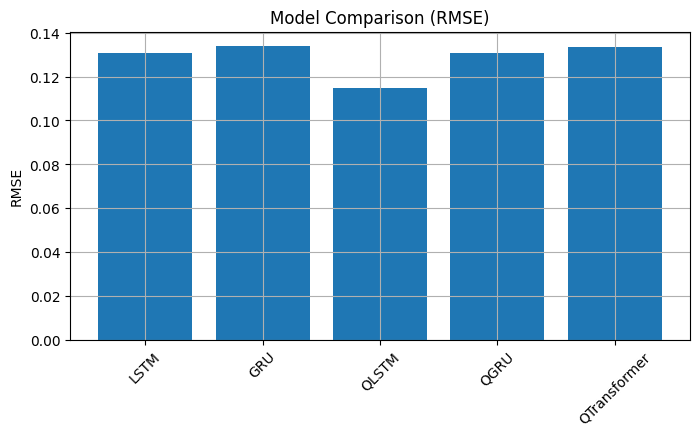

In [ ]:
# Importing pandas for handling tabular data and matplotlib for plotting graphs
import pandas as pd
import matplotlib.pyplot as plt

# Loading the ablation study results from the project folder
df = pd.read_csv("/content/drive/MyDrive/quantum_project/ablation_full_extended.csv")

# Cleaning model names by removing unwanted spaces (to avoid duplicates like 'LSTM ' vs 'LSTM')
df['model'] = df['model'].str.strip()

# Showing the overall summary:
# We group by each model type, calculate the average RMSE, MAE, and Directional Accuracy,
# then sort models in ascending order of RMSE (lower RMSE = better performance)
print("Summary of all runs:")
print(df.groupby('model')[['rmse', 'mae', 'dir_acc']].mean().sort_values('rmse'))

# Creating a bar chart to visually compare RMSE values across different models
plt.figure(figsize=(8, 4))
plt.bar(df['model'], df['rmse'])  # Each bar represents a model’s RMSE
plt.title("Model Comparison (RMSE)")  # Title for the plot
plt.ylabel("RMSE")                   # Label for the Y-axis
plt.xticks(rotation=45)              # Rotating X-axis labels for readability
plt.show()                           # Displaying the plot


##Best Model Configuration Selector

This cell reads the ablation study results, removes invalid entries, and finds the best configuration both overall and per model type based on the lowest RMSE (Root Mean Squared Error).

In [ ]:
# Importing pandas for data handling and os for file path management
import pandas as pd
import os

# Building the path to the ablation results file stored in Drive
csv_path = os.path.join(DRIVE_DIR, "ablation_full_extended.csv")

# Reading the ablation CSV file that contains model performance metrics
df = pd.read_csv(csv_path)

# Removing any rows where RMSE values are missing or undefined
df = df.dropna(subset=['rmse'])

# Selecting the single best model configuration across all models (lowest RMSE)
best_row = df.loc[df['rmse'].idxmin()]
print("Best config:\n", best_row)

# Grouping by model type and finding the best configuration for each model separately
best_each = df.loc[df.groupby('model')['rmse'].idxmin()].reset_index(drop=True)
print("Best per model:\n", best_each)


Best config:
 model         QLSTM
nq                2
qlayers           1
hidden           32
rmse       0.112415
mae        0.103347
dir_acc    0.694444
Name: 4, dtype: object
Best per model:
           model  nq  qlayers  hidden      rmse       mae   dir_acc
0           GRU   4        1      32  0.122040  0.113182  0.416667
1          LSTM   2        1      32  0.130009  0.119581  0.708333
2          QGRU   2        1      32  0.129786  0.119478  0.638889
3         QLSTM   2        1      32  0.112415  0.103347  0.694444
4  QTransformer   4        1      32  0.128069  0.088711  0.611111


##Data Preparation and Model Evaluation

This cell loads currency pair data, cleans it, prepares time-series windows, scales features, loads each trained model automatically, generates predictions, and saves them for backtesting.

In [ ]:
# Importing all necessary libraries for data handling, model loading, and scaling
import numpy as np
import pandas as pd
import os
import torch
import re
from sklearn.preprocessing import MinMaxScaler
import joblib

# Defining the main folder where all files and weights are stored
DRIVE_DIR = "/content/drive/MyDrive/quantum_project"

# Listing all currency pairs that we will process
pairs = ["EURUSD", "GBPUSD", "USDJPY"]

# Setting the input sequence window size (number of previous timesteps per sample)
window = 60

# Automatically choosing GPU if available, otherwise using CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Function to load and clean the data for each currency pair
def load_pair(pair):
    # Constructing the path for the CSV file of this pair
    path = os.path.join(DRIVE_DIR, f"{pair}.csv")

    # If the file doesn’t exist, stop and raise an error
    if not os.path.exists(path):
        raise FileNotFoundError(f"{path} not found")

    # Reading the CSV into a DataFrame
    df = pd.read_csv(path)

    # Cleaning column names by stripping spaces and standardizing capitalization
    df.columns = df.columns.str.strip().str.title()

    # Keeping only useful columns
    keep = ["Date", "Open", "High", "Low", "Close", "Volume"]
    df = df[[c for c in keep if c in df.columns]]

    # Cleaning numeric columns (removing commas, $, %, and spaces)
    for col in ["Open", "High", "Low", "Close", "Volume"]:
        if col in df.columns:
            df[col] = (
                df[col].astype(str)
                .str.replace(",", "")
                .str.replace("$", "")
                .str.replace("%", "")
                .str.replace(" ", "")
            )
            df[col] = pd.to_numeric(df[col], errors="coerce")

    # Removing rows without closing price
    df.dropna(subset=["Close"], inplace=True)

    # Filling any other missing values with 0
    df.fillna(0, inplace=True)

    # Converting the Date column to datetime format and sorting chronologically
    if "Date" in df.columns:
        df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
        df.sort_values("Date", inplace=True)

    # Returning the cleaned DataFrame
    return df

# Function to find a model’s weight file by keyword
def find_weights(model_keyword):
    for f in os.listdir(DRIVE_DIR):
        if f.endswith(".pt") and model_keyword.lower() in f.lower():
            return os.path.join(DRIVE_DIR, f)
    return None

# Function to extract hidden layer size from filename using regex
def parse_hidden_size(filename):
    if not filename:
        return 48
    m = re.search(r"h(\d+)", filename)
    return int(m.group(1)) if m else 48

# Function to extract qubit count from filename using regex
def parse_qubits(filename):
    if not filename:
        return 4
    m = re.search(r"nq(\d+)", filename)
    return int(m.group(1)) if m else 4

# Function to safely load model weights while skipping mismatched layers
def safe_load_model(model, weight_path, device):
    # If the weight file is missing, just return the untrained model
    if not weight_path or not os.path.exists(weight_path):
        print(f" Weight file missing: {weight_path}")
        return model

    try:
        # Loading saved state dictionary (weights)
        state_dict = torch.load(weight_path, map_location=device)
        model_state = model.state_dict()

        # Keeping only those weights that match layer names and shapes
        filtered_state = {
            k: v for k, v in state_dict.items()
            if k in model_state and model_state[k].shape == v.shape
        }

        # Updating the model’s parameters with matching ones
        model_state.update(filtered_state)
        model.load_state_dict(model_state, strict=False)

        # Calculating how many layers were successfully matched
        match_ratio = len(filtered_state) / max(1, len(model_state))

        # Showing a warning if less than 70% of weights matched
        if match_ratio < 0.7:
            print(f" Only {100*match_ratio:.1f}% of weights matched — architecture mismatch?")
        else:
            print(f"Loaded {len(filtered_state)}/{len(model_state)} weights from {os.path.basename(weight_path)}")

    except Exception as e:
        # Handling errors gracefully without stopping the program
        print(f" Failed to load weights from {weight_path}: {e}")

    # Returning the (partially) loaded model
    return model

# Looping through each currency pair one by one
for PAIR in pairs:
    try:
        print(f"\n Processing {PAIR}...")
        # Loading the dataset for this pair
        df = load_pair(PAIR)

        # Converting data into NumPy arrays for supervised learning (X windows and y targets)
        arr = df[["Open", "High", "Low", "Close", "Volume"]].values
        X, y = [], []
        for i in range(len(arr) - window):
            X.append(arr[i:i + window])
            y.append(arr[i + window, 3])
        X, y = np.array(X), np.array(y)

        # Splitting into training, validation, and testing sets
        test_size = int(0.15 * len(X))
        val_size = int(0.10 * len(X))
        train_end = len(X) - val_size - test_size
        X_tr, y_tr = X[:train_end], y[:train_end]
        X_val, y_val = X[train_end:train_end + val_size], y[train_end:train_end + val_size]
        X_te, y_te = X[train_end + val_size:], y[train_end + val_size:]

        # Scaling each feature independently to the [0,1] range
        n_feat = X_tr.shape[2]
        scalers_X = []
        for f in range(n_feat):
            sc = MinMaxScaler()
            sc.fit(X_tr[:, :, f].reshape(-1, 1))
            for split in [X_tr, X_val, X_te]:
                split[:, :, f] = sc.transform(split[:, :, f].reshape(-1, 1)).reshape(split.shape[0], split.shape[1])
            scalers_X.append(sc)

        # Scaling the target variable
        y_scl = MinMaxScaler().fit(y_tr.reshape(-1, 1))
        y_tr_s = y_scl.transform(y_tr.reshape(-1, 1)).reshape(-1)
        y_val_s = y_scl.transform(y_val.reshape(-1, 1)).reshape(-1)
        y_te_s = y_scl.transform(y_te.reshape(-1, 1)).reshape(-1)

        # Saving the target scaler for future inverse transformations
        joblib.dump(y_scl, os.path.join(DRIVE_DIR, f"scaler_{PAIR}.pkl"))

        # Running predictions for all model types
        for model_type in ["lstm", "qlstm", "gru", "qgru", "qtransformer"]:
            weight_path = find_weights(model_type)
            if not weight_path:
                print(f" No weights found for {model_type.upper()} — skipping.")
                continue

            # Extracting hidden size and qubit count from the file name
            hidden_size = parse_hidden_size(weight_path)
            n_qubits = parse_qubits(weight_path)
            print(f"\n Found {model_type.upper()} weights: {os.path.basename(weight_path)} (hidden={hidden_size}, qubits={n_qubits})")

            # Creating the correct model architecture based on model_type
            if model_type == "lstm":
                model = LSTMBaseline(input_size=n_feat, hidden_size=hidden_size).to(device)
            elif model_type == "qlstm":
                model = QLSTM(input_size=n_feat, hidden=hidden_size, n_qubits=n_qubits).to(device)
            elif model_type == "gru":
                model = GRUBaseline(input_size=n_feat, hidden_size=hidden_size).to(device)
            elif model_type == "qgru":
                model = QGRU(input_size=n_feat, hidden=hidden_size, n_qubits=n_qubits).to(device)
            elif model_type == "qtransformer":
                model = QTransformer(input_size=n_feat, hidden=hidden_size, n_qubits=n_qubits).to(device)
            else:
                continue

            # Loading pre-trained weights safely
            model = safe_load_model(model, weight_path, device)
            model.eval()

            # Converting test data to a PyTorch tensor
            X_te_t = torch.tensor(X_te, dtype=torch.float32).to(device)
            if X_te_t.ndim != 3:
                X_te_t = X_te_t.unsqueeze(1)

            # Running the model to get predictions
            with torch.no_grad():
                preds = model(X_te_t).cpu().numpy()

            # Converting predictions and true values back to original scale
            preds_raw = y_scl.inverse_transform(preds.reshape(-1, 1)).reshape(-1)
            y_te_raw = y_scl.inverse_transform(y_te_s.reshape(-1, 1)).reshape(-1)

            # Saving both predicted and true price arrays as .npy files
            np.save(os.path.join(DRIVE_DIR, f"preds_{model_type}_{PAIR}.npy"), preds_raw)
            np.save(os.path.join(DRIVE_DIR, f"true_{PAIR}.npy"), y_te_raw)

            # Showing success message
            print(f" Saved predictions for {PAIR} using {model_type.upper()} ({len(preds_raw)} points)")

    except Exception as e:
        import traceback
        traceback.print_exc()
        print(f" Failed for {PAIR}: {e}")

# Final message after all pairs are processed
print(" All predictions saved successfully! Ready for backtesting.")



 Processing EURUSD...

 Found LSTM weights: QLSTM_nq4_ql1_h32.pt (hidden=32, qubits=4)
Loaded 5/6 weights from QLSTM_nq4_ql1_h32.pt
 Saved predictions for EURUSD using LSTM (69 points)

 Found QLSTM weights: QLSTM_nq4_ql1_h32.pt (hidden=32, qubits=4)
Created VQC TorchLayer
Loaded 9/9 weights from QLSTM_nq4_ql1_h32.pt
 Saved predictions for EURUSD using QLSTM (69 points)

 Found GRU weights: QGRU_nq2_ql1_h32.pt (hidden=32, qubits=2)
Loaded 5/6 weights from QGRU_nq2_ql1_h32.pt
 Saved predictions for EURUSD using GRU (69 points)

 Found QGRU weights: QGRU_nq2_ql1_h32.pt (hidden=32, qubits=2)
Created VQC TorchLayer
Loaded 9/9 weights from QGRU_nq2_ql1_h32.pt
 Saved predictions for EURUSD using QGRU (69 points)

 Found QTRANSFORMER weights: QTransformer_nq2_ql1_h32.pt (hidden=32, qubits=2)
Created VQC TorchLayer
Loaded 31/31 weights from QTransformer_nq2_ql1_h32.pt
 Saved predictions for EURUSD using QTRANSFORMER (69 points)

 Processing GBPUSD...

 Found LSTM weights: QLSTM_nq4_ql1_h32.pt

##Full Sensitivity + Interpretability Analysis(Single Seed)

This notebook cell loads all trained models automatically, checks how much each input feature affects the model’s prediction, and saves visual and CSV outputs for interpretability.

 Auto-loading all trained models...
 Loaded 5,025 parameters from LSTM_nq2_ql1_h32.pt
Created VQC TorchLayer
 Loaded 5,063 parameters from QLSTM_nq2_ql1_h32.pt
 Loaded 3,777 parameters from GRU_nq2_ql1_h32.pt
Created VQC TorchLayer
 Loaded 3,815 parameters from QGRU_nq2_ql1_h32.pt
Created VQC TorchLayer
 Loaded 17,351 parameters from QTransformer_nq2_ql1_h32.pt
 Loaded 5 models successfully.

 Running sensitivity analysis for all trained models...

 Model: LSTM
  • Feature 0: Δ=0.000003
  • Feature 1: Δ=0.000002
  • Feature 2: Δ=0.000001
  • Feature 3: Δ=0.000001
  • Feature 4: Δ=0.000000
 Saved: /content/drive/MyDrive/quantum_project/sensitivity_lstm.csv

 Model: QLSTM
  • Feature 0: Δ=0.000000
  • Feature 1: Δ=0.000000
  • Feature 2: Δ=0.000000
  • Feature 3: Δ=0.000000
  • Feature 4: Δ=0.000000
 Saved: /content/drive/MyDrive/quantum_project/sensitivity_qlstm.csv

 Model: GRU
  • Feature 0: Δ=0.000038
  • Feature 1: Δ=0.000022
  • Feature 2: Δ=0.000017
  • Feature 3: Δ=0.000000
  • F

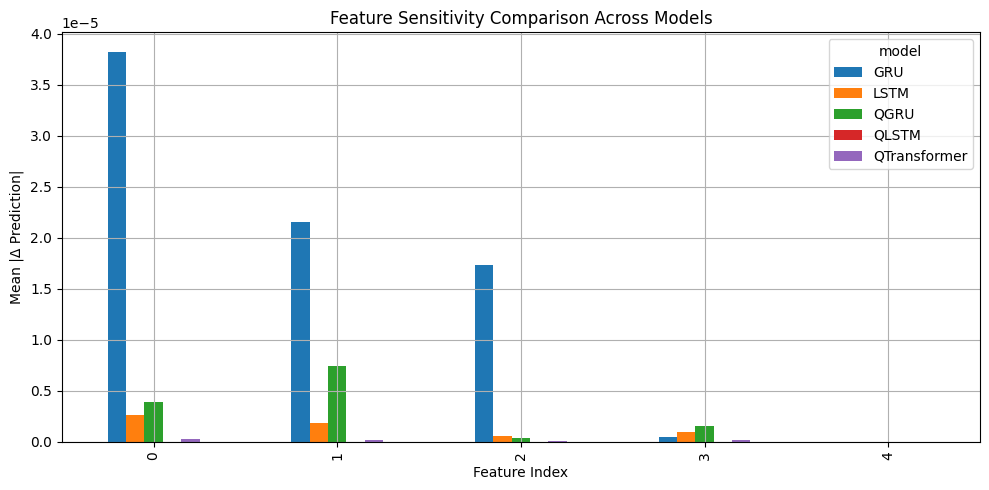

In [ ]:
# Importing libraries
# These help with model loading, math, and data visualization
import os
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Setting device to CPU since sensitivity analysis doesn't need GPU
DEVICE = torch.device("cpu")

# Folder path where all trained model weights and data files are stored
MODEL_DIR = "/content/drive/MyDrive/quantum_project"

# Function to automatically load any model by its name
def auto_load_model(model_name, input_dim, hidden=32, n_qubits=2):
    # Building the file path where model weights are saved
    path = os.path.join(MODEL_DIR, f"{model_name}_nq{n_qubits}_ql1_h{hidden}.pt")

    # If the file is missing, print an error and stop
    if not os.path.exists(path):
        print(f" No weights found for {model_name}")
        return None

    # Depending on the model name, create the correct model object
    if model_name.upper() == "LSTM":
        model = LSTMBaseline(input_size=input_dim, hidden_size=hidden)
    elif model_name.upper() == "QLSTM":
        model = QLSTM(input_size=input_dim, hidden=hidden, n_qubits=n_qubits)
    elif model_name.upper() == "GRU":
        model = GRUBaseline(input_size=input_dim, hidden_size=hidden)
    elif model_name.upper() == "QGRU":
        model = QGRU(input_size=input_dim, hidden=hidden, n_qubits=n_qubits)
    elif model_name.upper() in ["QTRANSFORMER", "QTRANSFORMERMODEL"]:
        model = QTransformer(input_size=input_dim, hidden=hidden, n_qubits=n_qubits)
    else:
        print(f" Unknown model type: {model_name}")
        return None

    # Try to load model weights safely
    try:
        state = torch.load(path, map_location=DEVICE)
        model.load_state_dict(state, strict=False)
        model.to(DEVICE)

        # Count how many parameters the model has and print confirmation
        total_params = sum(p.numel() for p in model.parameters())
        print(f" Loaded {total_params:,} parameters from {os.path.basename(path)}")
    except Exception as e:
        print(f" Failed to load weights for {model_name}: {e}")
        return None

    # Set model to evaluation mode so it doesn’t update parameters
    model.eval()
    return model

# Getting number of input features from test data
input_dim = X_te.shape[2]

# Listing all models to be loaded automatically
model_names = ["LSTM", "QLSTM", "GRU", "QGRU", "QTransformer"]

# Dictionary to hold all loaded models
models = {}

# Loading all trained models automatically
print(" Auto-loading all trained models...")
for name in model_names:
    m = auto_load_model(name, input_dim=input_dim)
    if m is not None:
        models[name] = m
print(f" Loaded {len(models)} models successfully.\n")

# Function to measure feature sensitivity for each model
def compute_sensitivity(model, X_data, eps_frac=1e-3, n_samples=200):
    # Taking a small subset of data for faster testing
    X_sub = X_data[:min(n_samples, len(X_data))].copy()
    n_feat = X_sub.shape[2]

    # Getting model predictions before any feature changes
    with torch.no_grad():
        base_preds = model(torch.from_numpy(X_sub).float().to(DEVICE)).detach().cpu().numpy()

    results = []
    # Looping through each feature to check sensitivity
    for feat in range(n_feat):
        feat_std = np.std(X_sub[:, :, feat])
        eps = eps_frac * max(feat_std, 1e-6)

        # Creating a copy of data and slightly increasing the current feature
        Xp = X_sub.copy()
        Xp[:, :, feat] += eps

        # Getting new predictions after small change
        with torch.no_grad():
            preds_p = model(torch.from_numpy(Xp).float().to(DEVICE)).detach().cpu().numpy()

        # Calculating how much the output changed on average
        pred_change = float(np.mean(np.abs(preds_p - base_preds)))

        # Saving results for each feature
        results.append({
            "feature_idx": feat,
            "eps": eps,
            "pred_change": pred_change
        })

        # Showing progress in console
        print(f"  • Feature {feat}: Δ={pred_change:.6f}")

    # Returning the list of all results
    return results

# List to store sensitivity results from all models
combined_results = []

# Running sensitivity analysis for all loaded models
print(" Running sensitivity analysis for all trained models...")
for name, model in models.items():
    print(f"\n Model: {name}")
    try:
        # Compute sensitivity for this model
        sens = compute_sensitivity(model, X_te)

        # Convert results to a DataFrame for easy saving
        df = pd.DataFrame(sens)
        df["model"] = name

        # Add results to main list
        combined_results.append(df)

        # Save individual model sensitivity results
        out_csv = os.path.join(MODEL_DIR, f"sensitivity_{name.lower()}.csv")
        df.to_csv(out_csv, index=False)
        print(f" Saved: {out_csv}")
    except Exception as e:
        print(f" Skipped {name}: {e}")

# Combine and visualize results from all models
if combined_results:
    # Combine all model DataFrames into one
    all_df = pd.concat(combined_results, ignore_index=True)

    # Save the combined results
    combined_csv = os.path.join(MODEL_DIR, "sensitivity_all_models.csv")
    all_df.to_csv(combined_csv, index=False)
    print(f"\n Saved combined results: {combined_csv}")

    # Create a pivot table to compare all models by feature
    pivot = all_df.pivot(index="feature_idx", columns="model", values="pred_change")

    # Plot a grouped bar chart to visualize which features influence each model
    pivot.plot(kind="bar", figsize=(10, 5))
    plt.title("Feature Sensitivity Comparison Across Models")
    plt.xlabel("Feature Index")
    plt.ylabel("Mean |Δ Prediction|")
    plt.tight_layout()
    plt.show()
else:
    print(" No valid results to combine.")


##Multi-Model Diagnostic and Alignment Analysis

This cell ensures that all model predictions are properly aligned, scaled, and phase-corrected before evaluation.
It checks numerical stability, compares model outputs to actual prices, and produces diagnostic plots like
Actual vs Predicted and Residual Analysis for every model and currency pair.


PAIR: EURUSD
Actual len=520 min=1.024443 max=1.187141 mean=1.100397 std=0.040864

Aligned tail length: 69

Scaling predictions to match actual mean/std...
⚠️ Negative correlation (-0.861) detected — flipping phase.
✅ Phase corrected. New correlation: 0.861
  LSTM: range [1.0326, 1.0354] -> [1.1486, 1.1831], mean 1.0339 -> 1.1668
  GRU: range [1.1210, 1.1243] -> [1.1482, 1.1831], mean 1.1228 -> 1.1668
  QLSTM: range [1.0533, 1.0550] -> [1.1492, 1.1824], mean 1.0542 -> 1.1668
⚠️ Negative correlation (-0.752) detected — flipping phase.
✅ Phase corrected. New correlation: 0.752
  QGRU: range [1.0955, 1.0964] -> [1.1458, 1.1840], mean 1.0959 -> 1.1668
⚠️ Negative correlation (-0.814) detected — flipping phase.
✅ Phase corrected. New correlation: 0.814
  QTransformer: range [1.0865, 1.0872] -> [1.1431, 1.1847], mean 1.0868 -> 1.1668

Per-model diagnostics after scaling + phase fix:
       model  len      min      max     mean      std    range  act_range  range_ratio  almost_constant     rm

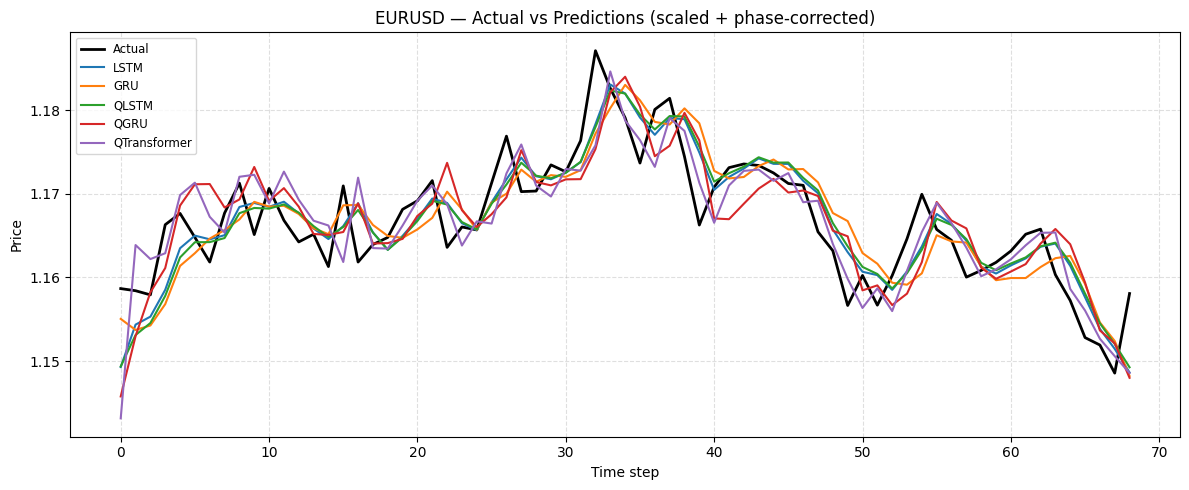

Saved time series plot to: /content/drive/MyDrive/quantum_project/EURUSD_diagnostic_timeseries_fixed.png


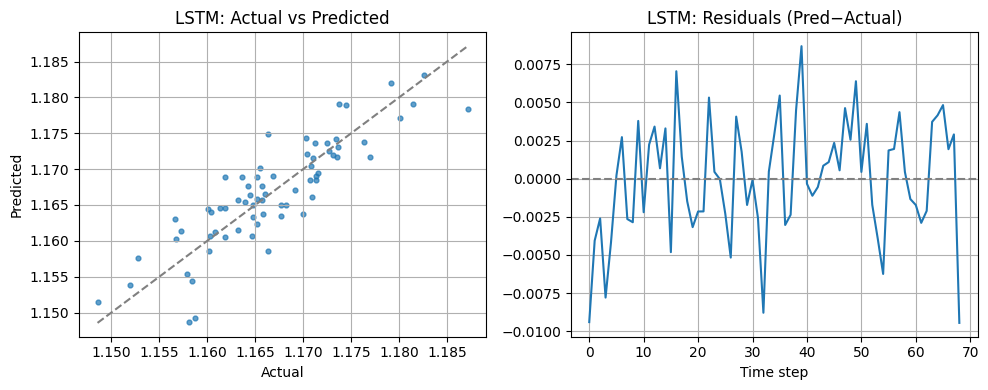

Saved scatter+residuals: /content/drive/MyDrive/quantum_project/EURUSD_LSTM_scatter_residuals_fixed.png
  -> LSTM: RMSE=0.003844, Corr=0.8614, std(pred)=0.007301


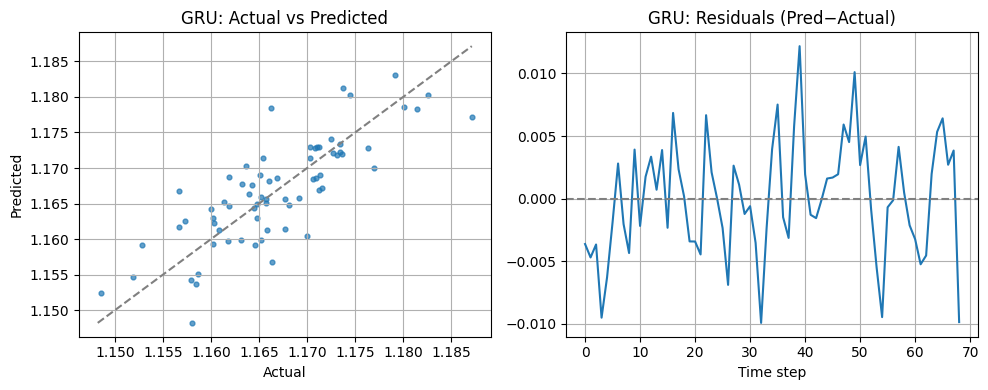

Saved scatter+residuals: /content/drive/MyDrive/quantum_project/EURUSD_GRU_scatter_residuals_fixed.png
  -> GRU: RMSE=0.004598, Corr=0.8017, std(pred)=0.007301


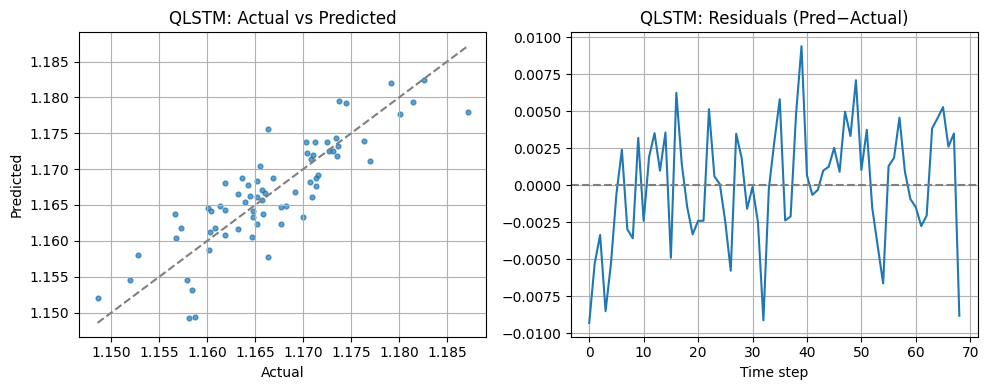

Saved scatter+residuals: /content/drive/MyDrive/quantum_project/EURUSD_QLSTM_scatter_residuals_fixed.png
  -> QLSTM: RMSE=0.003999, Corr=0.8500, std(pred)=0.007301


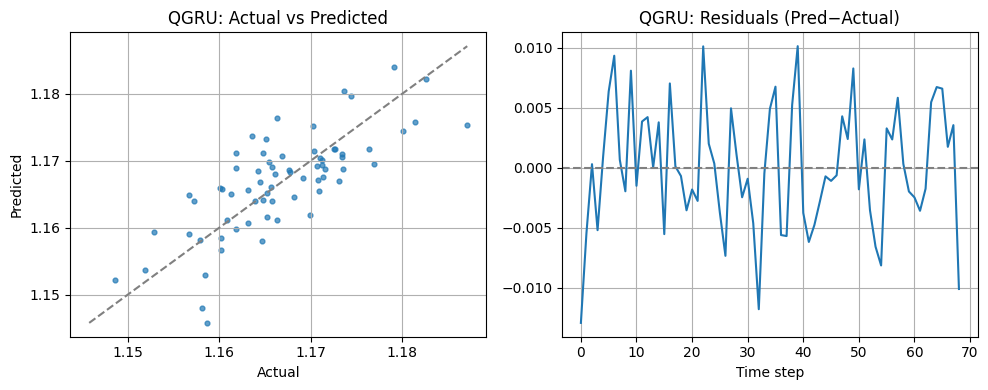

Saved scatter+residuals: /content/drive/MyDrive/quantum_project/EURUSD_QGRU_scatter_residuals_fixed.png
  -> QGRU: RMSE=0.005143, Corr=0.7519, std(pred)=0.007301


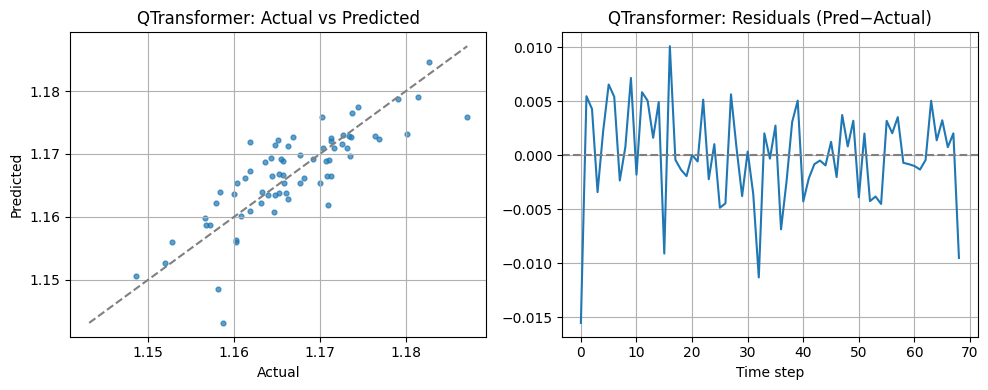

Saved scatter+residuals: /content/drive/MyDrive/quantum_project/EURUSD_QTransformer_scatter_residuals_fixed.png
  -> QTransformer: RMSE=0.004457, Corr=0.8137, std(pred)=0.007301

--- End of diagnostics for EURUSD ---


PAIR: GBPUSD
Actual len=520 min=1.217100 max=1.374722 mean=1.293015 std=0.038124

Aligned tail length: 69

Scaling predictions to match actual mean/std...
  LSTM: range [1.2453, 1.2468] -> [1.3002, 1.3616], mean 1.2463 -> 1.3422
  GRU: range [1.3056, 1.3094] -> [1.3022, 1.3644], mean 1.3081 -> 1.3422
  QLSTM: range [1.2459, 1.2492] -> [1.3029, 1.3638], mean 1.2480 -> 1.3422
⚠️ Negative correlation (-0.876) detected — flipping phase.
✅ Phase corrected. New correlation: 0.876
  QGRU: range [1.2957, 1.2973] -> [1.3008, 1.3640], mean 1.2962 -> 1.3422
⚠️ Negative correlation (-0.925) detected — flipping phase.
✅ Phase corrected. New correlation: 0.925
  QTransformer: range [1.2857, 1.2873] -> [1.2982, 1.3629], mean 1.2862 -> 1.3422

Per-model diagnostics after scaling + phase

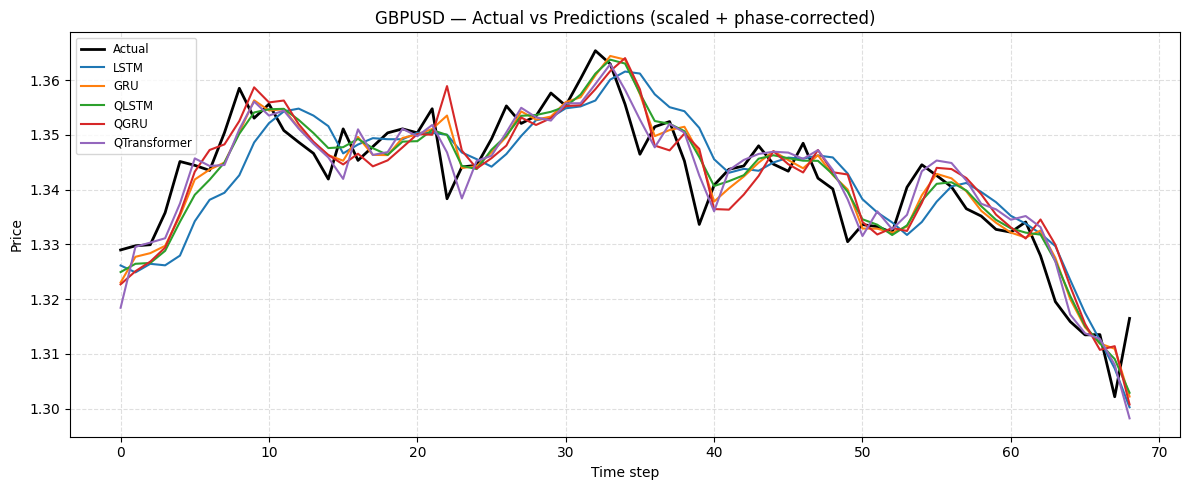

Saved time series plot to: /content/drive/MyDrive/quantum_project/GBPUSD_diagnostic_timeseries_fixed.png


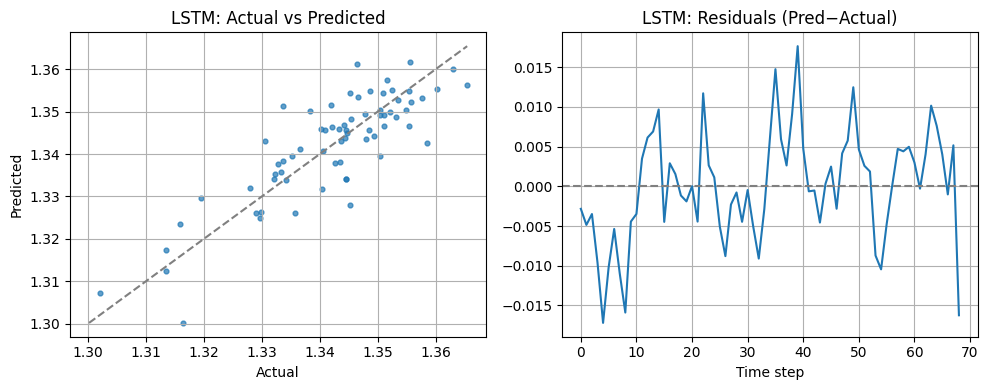

Saved scatter+residuals: /content/drive/MyDrive/quantum_project/GBPUSD_LSTM_scatter_residuals_fixed.png
  -> LSTM: RMSE=0.006979, Corr=0.8415, std(pred)=0.012395


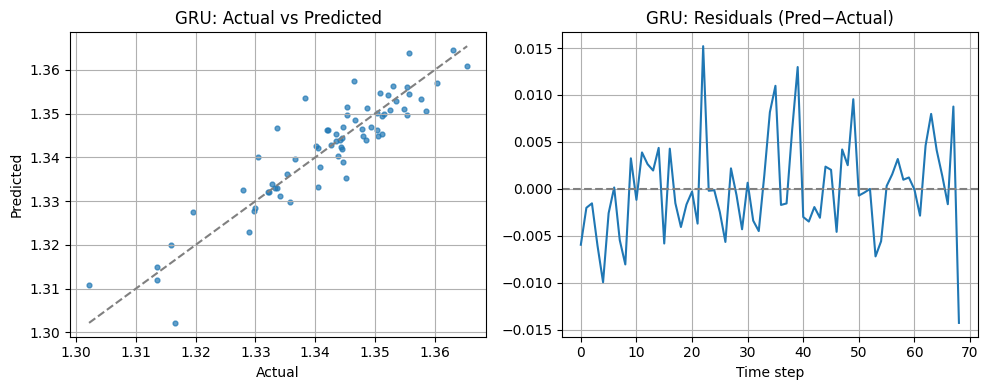

Saved scatter+residuals: /content/drive/MyDrive/quantum_project/GBPUSD_GRU_scatter_residuals_fixed.png
  -> GRU: RMSE=0.005141, Corr=0.9140, std(pred)=0.012395


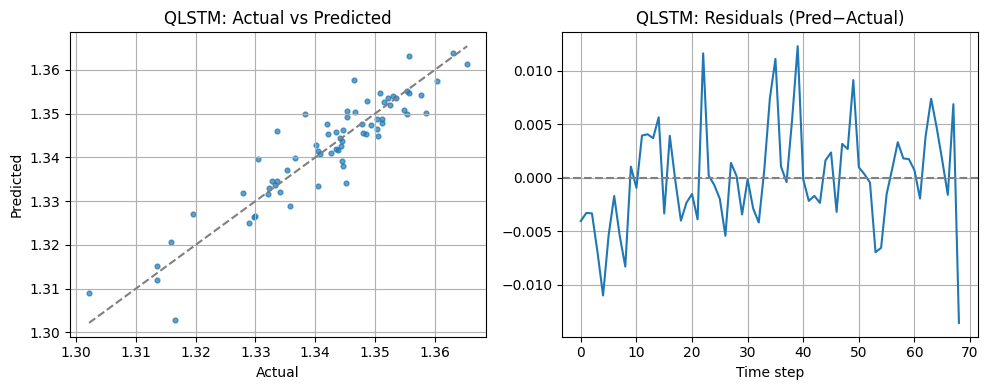

Saved scatter+residuals: /content/drive/MyDrive/quantum_project/GBPUSD_QLSTM_scatter_residuals_fixed.png
  -> QLSTM: RMSE=0.004868, Corr=0.9229, std(pred)=0.012395


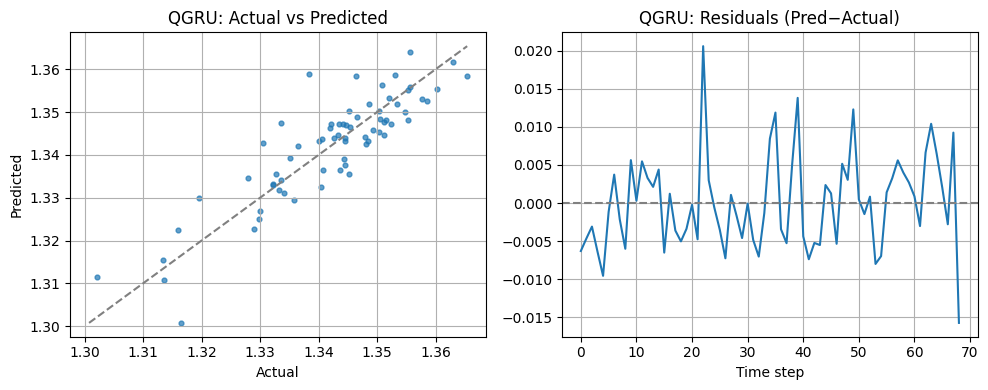

Saved scatter+residuals: /content/drive/MyDrive/quantum_project/GBPUSD_QGRU_scatter_residuals_fixed.png
  -> QGRU: RMSE=0.006161, Corr=0.8765, std(pred)=0.012395


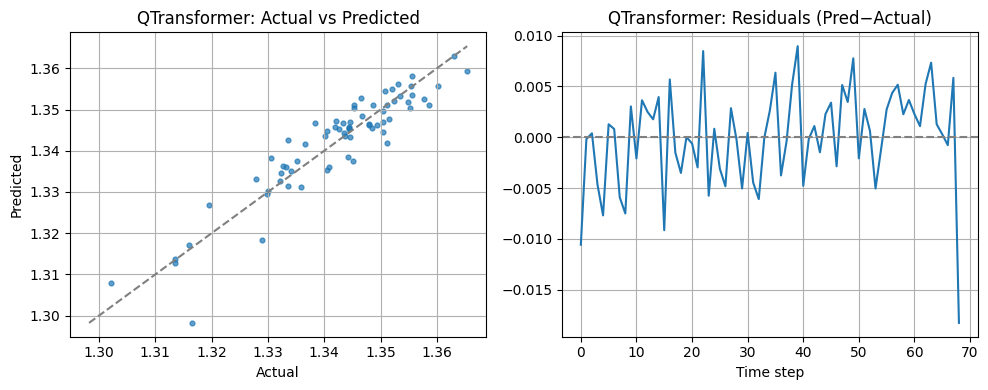

Saved scatter+residuals: /content/drive/MyDrive/quantum_project/GBPUSD_QTransformer_scatter_residuals_fixed.png
  -> QTransformer: RMSE=0.004805, Corr=0.9249, std(pred)=0.012395

--- End of diagnostics for GBPUSD ---


PAIR: USDJPY
Actual len=520 min=140.789993 max=161.621002 mean=149.881194 std=4.779742

Aligned tail length: 69

Scaling predictions to match actual mean/std...
⚠️ Negative correlation (-0.933) detected — flipping phase.
✅ Phase corrected. New correlation: 0.933
  LSTM: range [143.8065, 144.2811] -> [146.6210, 154.4362], mean 144.1226 -> 149.2315
  GRU: range [153.8569, 154.4096] -> [146.3878, 154.6537], mean 154.0471 -> 149.2315
  QLSTM: range [144.6661, 145.0885] -> [146.6668, 154.3795], mean 144.8066 -> 149.2315
⚠️ Negative correlation (-0.914) detected — flipping phase.
✅ Phase corrected. New correlation: 0.914
  QGRU: range [152.7439, 153.0066] -> [146.4357, 154.1991], mean 152.9120 -> 149.2315
⚠️ Negative correlation (-0.632) detected — flipping phase.
✅ Phase corr

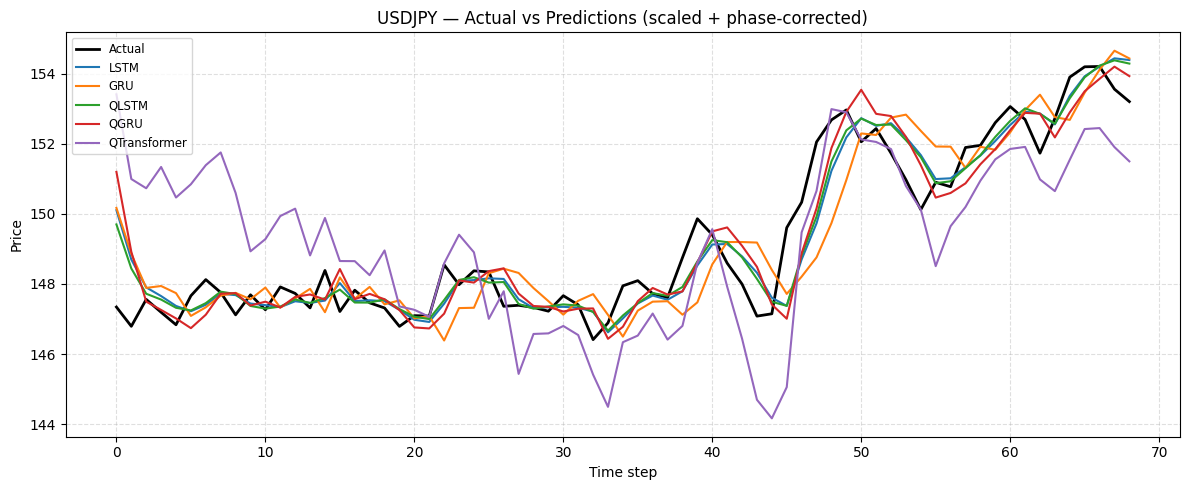

Saved time series plot to: /content/drive/MyDrive/quantum_project/USDJPY_diagnostic_timeseries_fixed.png


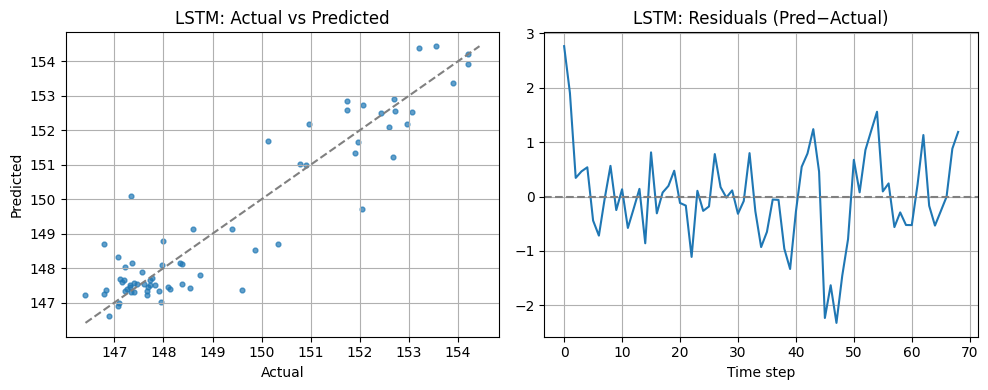

Saved scatter+residuals: /content/drive/MyDrive/quantum_project/USDJPY_LSTM_scatter_residuals_fixed.png
  -> LSTM: RMSE=0.855390, Corr=0.9330, std(pred)=2.337127


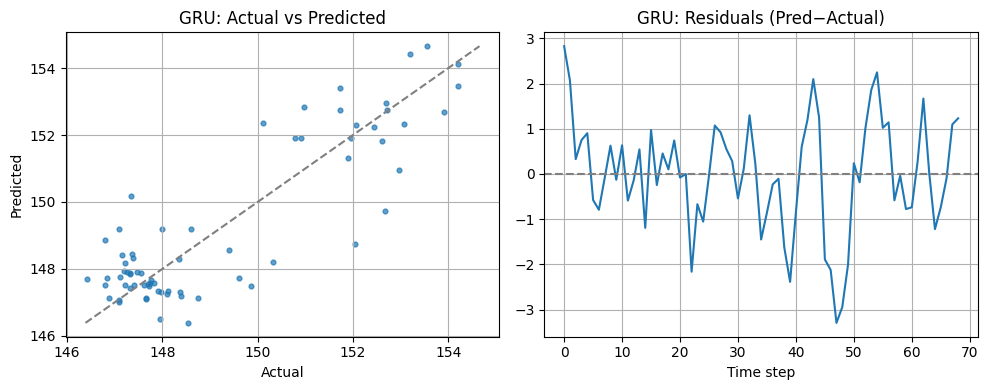

Saved scatter+residuals: /content/drive/MyDrive/quantum_project/USDJPY_GRU_scatter_residuals_fixed.png
  -> GRU: RMSE=1.218314, Corr=0.8641, std(pred)=2.337127


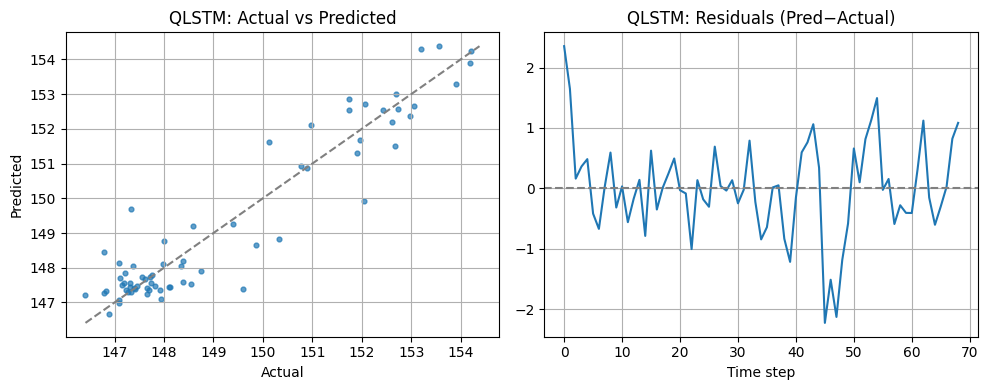

Saved scatter+residuals: /content/drive/MyDrive/quantum_project/USDJPY_QLSTM_scatter_residuals_fixed.png
  -> QLSTM: RMSE=0.781150, Corr=0.9441, std(pred)=2.337127


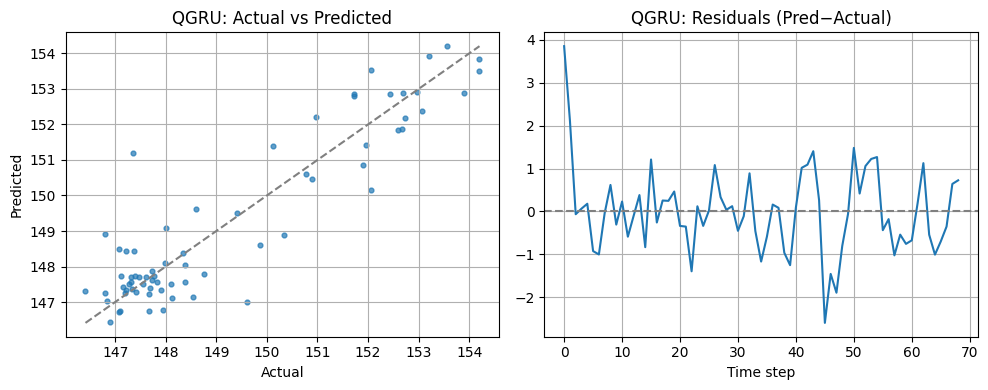

Saved scatter+residuals: /content/drive/MyDrive/quantum_project/USDJPY_QGRU_scatter_residuals_fixed.png
  -> QGRU: RMSE=0.968088, Corr=0.9142, std(pred)=2.337127


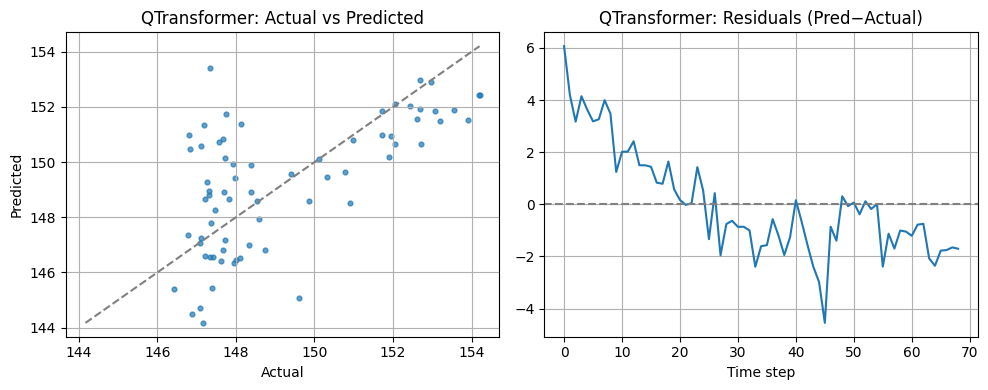

Saved scatter+residuals: /content/drive/MyDrive/quantum_project/USDJPY_QTransformer_scatter_residuals_fixed.png
  -> QTransformer: RMSE=2.003912, Corr=0.6324, std(pred)=2.337127

--- End of diagnostics for USDJPY ---



In [ ]:
# Import required libraries for data analysis and plotting
import os                           # For handling file paths and directories
import numpy as np                  # For mathematical operations and array manipulations
import pandas as pd                 # For reading, writing, and analyzing CSV data
import matplotlib.pyplot as plt     # For creating graphs and diagnostic plots
from sklearn.metrics import mean_squared_error  # For RMSE calculation

# Define main working directory on Google Drive
DRIVE_DIR = "/content/drive/MyDrive/quantum_project"

# Define all currency pairs and models to evaluate
pairs = ["EURUSD", "GBPUSD", "USDJPY"]
models = ["LSTM", "GRU", "QLSTM", "QGRU", "QTransformer"]

# Function to safely load predictions from numpy files
def safe_load_preds(path):
    a = np.load(path)                           # Load predictions from .npy file
    a = np.asarray(a, dtype=float).reshape(-1)  # Flatten and ensure numeric type
    return a

# Function to generate a persistence forecast (naive baseline)
def persistence_forecast(y):
    return np.full_like(y, fill_value=y[0])     # Predict the first value for all future points

# Function to scale predictions to have same mean and standard deviation as actual data
def match_to_actual_range(y_actual, y_pred):
    """Ensures model predictions have same statistical range as true market prices."""
    y_mean, y_std = np.mean(y_actual), np.std(y_actual)
    p_mean, p_std = np.mean(y_pred), np.std(y_pred)

    # Avoid division by zero if model output is constant
    if p_std < 1e-8:
        p_std = 1.0

    # Normalize and rescale prediction range
    y_pred_adj = (y_pred - p_mean) / p_std * y_std + y_mean
    return y_pred_adj

# Function to automatically fix phase inversion (negative correlation problem)
def fix_phase(pred, actual):
    """Flips predictions if model output is negatively correlated with actual prices."""
    corr = np.corrcoef(pred, actual)[0, 1]   # Compute correlation
    if corr < 0:
        print(f" Negative correlation ({corr:.3f}) detected — flipping phase.")
        pred = -1 * (pred - np.mean(pred)) + np.mean(pred)
        corr_new = np.corrcoef(pred, actual)[0, 1]
        print(f" Phase corrected. New correlation: {corr_new:.3f}")
    return pred

# Begin main diagnostic loop for each currency pair
for PAIR in pairs:
    print("\n" + "="*70)
    print(f"PAIR: {PAIR}")
    print("="*70)

    # Load actual price data
    csv_path = os.path.join(DRIVE_DIR, f"{PAIR}.csv")

    # Check if file exists
    if not os.path.exists(csv_path):
        print(f"Missing actual CSV: {csv_path} -> skipping")
        continue

    df = pd.read_csv(csv_path)

    # Verify that 'Close' column exists
    if "Close" not in df.columns:
        print("CSV has no 'Close' column -> skipping")
        continue

    # Convert 'Close' prices to numeric array
    y_actual_full = pd.to_numeric(df["Close"], errors="coerce").dropna().values

    # Display summary statistics of actual price data
    print(f"Actual len={len(y_actual_full)} "
          f"min={y_actual_full.min():.6f} max={y_actual_full.max():.6f} "
          f"mean={y_actual_full.mean():.6f} std={y_actual_full.std():.6f}")

    # Load predictions for each model
    preds_dict = {}
    for m in models:
        pfile = os.path.join(DRIVE_DIR, f"preds_{m.lower()}_{PAIR}.npy")
        if os.path.exists(pfile):
            try:
                preds_dict[m] = safe_load_preds(pfile)
            except Exception as e:
                print(f"Failed loading {pfile}: {e}")
        else:
            print(f"Missing prediction file: {pfile}")

    # Skip if no prediction files were found
    if not preds_dict:
        print("No prediction files found -> skipping")
        continue

    # Align predictions with actual prices (same length)
    min_len = min(len(y_actual_full), *[len(v) for v in preds_dict.values()])
    y = y_actual_full[-min_len:]      # Align last section of true data
    x = np.arange(min_len)            # Create x-axis for plotting
    print(f"\nAligned tail length: {min_len}")

    # Scale all model predictions to actual data range
    print("\nScaling predictions to match actual mean/std...")
    for m in preds_dict:
        before_mean = np.mean(preds_dict[m][-min_len:])
        before_min = np.min(preds_dict[m])
        before_max = np.max(preds_dict[m])

        # Rescale predictions
        preds_dict[m] = match_to_actual_range(y, preds_dict[m][-min_len:])
        preds_dict[m] = fix_phase(preds_dict[m], y)  # Correct negative correlation if found

        after_mean = np.mean(preds_dict[m])
        print(f"  {m}: range [{before_min:.4f}, {before_max:.4f}] -> "
              f"[{np.min(preds_dict[m]):.4f}, {np.max(preds_dict[m]):.4f}], "
              f"mean {before_mean:.4f} -> {after_mean:.4f}")

    # Compute diagnostic statistics for every model
    stats = []
    for m, p in preds_dict.items():
        rng = np.ptp(p)                              # Range of model predictions
        arng = np.ptp(y)                             # Range of actual data
        is_const = (rng < 1e-8)                      # Flag constant prediction
        rmse = np.sqrt(mean_squared_error(y, p))     # Root Mean Squared Error
        corr = np.corrcoef(y, p)[0, 1] if len(y) > 1 else np.nan  # Correlation coefficient
        stats.append((m, len(p), np.min(p), np.max(p), np.mean(p), np.std(p),
                      rng, arng, rng/arng if arng != 0 else np.nan,
                      is_const, rmse, corr, abs(np.mean(y) - np.mean(p))))

    # Create a table with all diagnostics
    df_stats = pd.DataFrame(stats, columns=[
        "model", "len", "min", "max", "mean", "std", "range", "act_range",
        "range_ratio", "almost_constant", "rmse", "corr", "mean_abs_diff"
    ])
    pd.set_option('display.float_format', '{:.6f}'.format)
    print("\nPer-model diagnostics after scaling + phase fix:")
    print(df_stats.to_string(index=False))

    # Warn if model predictions are nearly constant or poorly correlated
    for _, row in df_stats.iterrows():
        if row['almost_constant'] or row['range_ratio'] < 0.01:
            print(f" {row['model']}: predictions nearly constant / tiny range.")
        if np.isnan(row['corr']) or abs(row['corr']) < 0.05:
            print(f" {row['model']}: very low correlation (corr={row['corr']:.4f}).")

    # Compute baseline (naive persistence model: price tomorrow = price today)
    persistence = persistence_forecast(y)
    base_rmse = np.sqrt(mean_squared_error(y, persistence))
    print(f"\nPersistence baseline RMSE: {base_rmse:.6f}")

    # Plot actual vs predictions for all models
    plt.figure(figsize=(12, 5))
    plt.plot(x, y, label="Actual", color="black", linewidth=2)
    cmap = plt.cm.tab10
    for i, (m, p) in enumerate(preds_dict.items()):
        plt.plot(x, p, label=m, linewidth=1.5, color=cmap(i % 10))
    plt.title(f"{PAIR} — Actual vs Predictions (scaled + phase-corrected)")
    plt.xlabel("Time step")
    plt.ylabel("Price")
    plt.grid(alpha=0.4, linestyle="--")
    plt.legend(loc="upper left", fontsize="small")
    plt.tight_layout()
    out = os.path.join(DRIVE_DIR, f"{PAIR}_diagnostic_timeseries_fixed.png")
    plt.savefig(out, dpi=200, bbox_inches="tight")
    plt.show()
    print("Saved time series plot to:", out)

    # Generate scatter and residual plots for each model
    for m, p in preds_dict.items():
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

        # Scatter plot of actual vs predicted
        ax1.scatter(y, p, s=12, alpha=0.7)
        mn, mx = min(y.min(), p.min()), max(y.max(), p.max())
        ax1.plot([mn, mx], [mn, mx], color='gray', linestyle='--')
        ax1.set_title(f"{m}: Actual vs Predicted")
        ax1.set_xlabel("Actual"); ax1.set_ylabel("Predicted")

        # Residual plot (difference between predicted and actual)
        res = p - y
        ax2.plot(x, res)
        ax2.axhline(0, color='gray', linestyle='--')
        ax2.set_title(f"{m}: Residuals (Pred−Actual)")
        ax2.set_xlabel("Time step")

        plt.tight_layout()
        out2 = os.path.join(DRIVE_DIR, f"{PAIR}_{m}_scatter_residuals_fixed.png")
        plt.savefig(out2, dpi=150, bbox_inches="tight")
        plt.show()
        print(f"Saved scatter+residuals: {out2}")
        print(f"  -> {m}: RMSE={np.sqrt(mean_squared_error(y,p)):.6f}, Corr={np.corrcoef(y,p)[0,1]:.4f}, std(pred)={np.std(p):.6f}")

    print("\n--- End of diagnostics for", PAIR, "---\n")


##Directional Accuracy Evaluation for All Models

This cell compares how accurately each model predicts price movement directions (up or down) for every currency pair.
It aligns all predictions, rescales them to match actual price ranges, and calculates two accuracies:

Tick Direction Accuracy: how often immediate up/down direction matches.

Trend Accuracy (5-step): how well short-term trends are captured.

In [ ]:
# Import essential libraries
import os                              # For file handling (path joining, existence check)
import numpy as np                     # For numerical computations and array operations
import pandas as pd                    # For data handling, reading/writing CSVs

# Define main Google Drive directory where all prediction and actual data are stored
DRIVE_DIR = "/content/drive/MyDrive/quantum_project"

# Define currency pairs for evaluation
pairs = ["EURUSD", "GBPUSD", "USDJPY"]

# Define all model names to evaluate
models = ["LSTM", "GRU", "QLSTM", "QGRU", "QTransformer"]

# Function to safely load prediction files (.npy) and convert to flat numeric arrays
def safe_load_preds(path):
    a = np.load(path)                          # Load numpy array from file
    a = np.asarray(a, dtype=float).reshape(-1) # Ensure array is 1D and numeric
    return a                                   # Return flattened predictions

# Function to scale predictions so they align with the actual price range (mean & std)
def match_to_actual_range(y_actual, y_pred):
    """Adjusts predictions so their mean and standard deviation match the actual data."""
    y_mean, y_std = np.mean(y_actual), np.std(y_actual)
    p_mean, p_std = np.mean(y_pred), np.std(y_pred)

    # Avoid division by zero if model output has zero variance
    if p_std < 1e-8:
        p_std = 1.0

    # Scale predictions to actual price scale
    return (y_pred - p_mean) / p_std * y_std + y_mean

# Function to calculate directional accuracy (percentage of correct direction predictions)
def direction_accuracy(y_true, y_pred, smooth=1):
    """
    Compares the direction of price changes between actual and predicted data.
    - smooth=1 → tick-level accuracy (short-term)
    - smooth=5 → trend-level accuracy (short-term trend smoothing)
    """
    # Compute change between consecutive prices and smooth them
    true_smooth = np.convolve(np.diff(y_true), np.ones(smooth), mode='valid')
    pred_smooth = np.convolve(np.diff(y_pred), np.ones(smooth), mode='valid')

    # Compare sign (+/-) agreement between actual and predicted changes
    acc = np.mean(np.sign(true_smooth) == np.sign(pred_smooth))
    return acc * 100.0  # Convert accuracy to percentage

# Loop through each currency pair one by one
for PAIR in pairs:
    print("\n" + "="*70)
    print(f"PAIR: {PAIR}")
    print("="*70)

    # Define CSV path containing actual market data
    csv_path = os.path.join(DRIVE_DIR, f"{PAIR}.csv")

    # Skip if file not found
    if not os.path.exists(csv_path):
        print(f"Missing actual CSV: {csv_path} -> skipping")
        continue

    # Read CSV data and verify presence of the 'Close' column
    df = pd.read_csv(csv_path)
    if "Close" not in df.columns:
        print("CSV has no 'Close' column -> skipping")
        continue

    # Convert the 'Close' column to numeric array (price series)
    y_actual_full = pd.to_numeric(df["Close"], errors="coerce").dropna().values

    # Create a dictionary to store predictions for each model
    preds_dict = {}

    # Loop through each model and try to load its prediction file
    for m in models:
        pfile = os.path.join(DRIVE_DIR, f"preds_{m.lower()}_{PAIR}.npy")
        if os.path.exists(pfile):
            preds_dict[m] = safe_load_preds(pfile)
        else:
            print(f"Missing prediction file: {pfile}")

    # Skip if no prediction files were found
    if not preds_dict:
        print("No prediction files found -> skipping")
        continue

    # Ensure all predictions and actual data are aligned to same length
    min_len = min(len(y_actual_full), *[len(v) for v in preds_dict.values()])
    y = y_actual_full[-min_len:]  # Take last min_len points (tail alignment)

    print(f"Aligned tail length: {min_len}")

    # Rescale all model predictions to match actual price range
    for m in preds_dict:
        preds_dict[m] = match_to_actual_range(y, preds_dict[m][-min_len:])

    # Store computed directional accuracies for each model
    results = []

    # Compute tick and trend accuracy for every model
    for m, p in preds_dict.items():
        acc_tick = direction_accuracy(y, p, smooth=1)   # Single-step direction
        acc_trend = direction_accuracy(y, p, smooth=5)  # Trend (5-step smoothing)
        results.append((m, acc_tick, acc_trend))
        print(f"{m:12s} → Tick DirAcc: {acc_tick:.2f}% | Trend DirAcc(5): {acc_trend:.2f}%")

    # Convert results into a structured DataFrame for better readability
    df_results = pd.DataFrame(results, columns=["Model", "Tick_DirAcc(%)", "Trend_DirAcc(5)(%)"])

    # Display accuracy summary sorted by tick-level accuracy
    print("\nSummary:")
    print(df_results.sort_values("Tick_DirAcc(%)", ascending=False).to_string(index=False))

    # Save accuracy table as CSV for this pair
    out_path = os.path.join(DRIVE_DIR, f"{PAIR}_direction_accuracy.csv")
    df_results.to_csv(out_path, index=False)
    print(f"Saved results to: {out_path}")



PAIR: EURUSD
Aligned tail length: 69
LSTM         → Tick DirAcc: 38.24% | Trend DirAcc(5): 25.00%
GRU          → Tick DirAcc: 48.53% | Trend DirAcc(5): 70.31%
QLSTM        → Tick DirAcc: 58.82% | Trend DirAcc(5): 71.88%
QGRU         → Tick DirAcc: 50.00% | Trend DirAcc(5): 35.94%
QTransformer → Tick DirAcc: 47.06% | Trend DirAcc(5): 25.00%

Summary:
       Model  Tick_DirAcc(%)  Trend_DirAcc(5)(%)
       QLSTM       58.823529           71.875000
        QGRU       50.000000           35.937500
         GRU       48.529412           70.312500
QTransformer       47.058824           25.000000
        LSTM       38.235294           25.000000
Saved results to: /content/drive/MyDrive/quantum_project/EURUSD_direction_accuracy.csv

PAIR: GBPUSD
Aligned tail length: 69
LSTM         → Tick DirAcc: 45.59% | Trend DirAcc(5): 67.19%
GRU          → Tick DirAcc: 58.82% | Trend DirAcc(5): 81.25%
QLSTM        → Tick DirAcc: 64.71% | Trend DirAcc(5): 79.69%
QGRU         → Tick DirAcc: 51.47% | Trend Di

##universal Backtest with Metrics & Plots

This cell runs a professional trading backtest for every model and currency pair.
It measures financial metrics like Sharpe ratio, final equity, and win rate under different transaction costs,
then visualizes and saves all performance comparisons.

In [ ]:
# Import all required libraries
import numpy as np, pandas as pd, os, matplotlib.pyplot as plt  # For math, data handling, file operations, and plotting

# Define a simple backtesting function with transaction cost consideration
def simple_backtest_with_costs(preds, trues, cost=0.0001):
    """
    Simple directional backtest:
    - preds: predicted prices
    - trues: actual close prices
    - cost: fixed transaction cost per trade (percentage)
    """
    rets = []  # list to store per-trade returns

    # Loop through all time steps except the last one
    for i in range(len(trues) - 1):
        # Determine position: long if next price predicted higher, else short
        pos = 1.0 if preds[i] >= trues[i] else -1.0

        # Calculate trade return and subtract transaction cost
        ret = pos * ((trues[i + 1] - trues[i]) / max(trues[i], 1e-8)) - cost * abs(pos)

        rets.append(ret)  # store this trade’s return
    return np.array(rets, dtype=float)  # convert list to numpy array

# Define a helper function to calculate performance metrics from returns
def metrics_from_rets(rets):
    # Replace NaN values with zero to ensure no crash during computation
    rets = np.nan_to_num(rets, nan=0.0)

    # If returns array is empty, return all NaN metrics
    if len(rets) == 0:
        return {
            "final_equity": np.nan, "max_dd": np.nan,
            "sharpe": np.nan, "trade_count": 0,
            "win_rate": np.nan, "profit_factor": np.nan
        }

    # Compute cumulative profit (equity curve)
    cum = (1 + rets).cumprod() - 1

    # Track peak equity for drawdown calculation
    peak = np.maximum.accumulate(cum)

    # Final cumulative return
    final_eq = float(cum[-1])

    # Maximum drawdown = largest drop from peak equity
    max_dd = float(np.min(cum - peak))

    # Sharpe ratio = risk-adjusted return (annualized)
    sharpe = float(np.mean(rets) / (np.std(rets) + 1e-9) * np.sqrt(252)) if np.std(rets) > 0 else np.nan

    # Calculate number of winning and losing trades
    wins = rets[rets > 0]
    losses = -rets[rets < 0]

    # Win rate as percentage of profitable trades
    win_rate = len(wins) / len(rets) * 100 if len(rets) > 0 else np.nan

    # Profit factor = total profit / total loss
    profit_factor = wins.sum() / (losses.sum() + 1e-9) if len(losses) > 0 else np.nan

    # Return all computed metrics
    return {
        "final_equity": final_eq,
        "max_dd": max_dd,
        "sharpe": sharpe,
        "trade_count": len(rets),
        "win_rate": win_rate,
        "profit_factor": profit_factor
    }

# Configuration section
DRIVE_DIR = "/content/drive/MyDrive/quantum_project"           # Project directory on Google Drive
pairs = ["EURUSD", "GBPUSD", "USDJPY"]                         # Currency pairs to test
model_types = ["lstm", "qlstm", "gru", "qgru", "qtransformer"] # Models to evaluate
costs = [0.0, 0.0001, 0.0005, 0.001]                           # Transaction cost values to test

# Initialize an empty list to store all model metrics
rows = []

# Loop through each currency pair
for PAIR in pairs:
    try:
        # Load CSV containing actual close prices
        df = pd.read_csv(os.path.join(DRIVE_DIR, f"{PAIR}.csv"))
        df.columns = df.columns.str.title()  # Standardize column names

        # Ensure 'Close' column exists
        if "Close" not in df.columns:
            raise ValueError("No 'Close' column found.")

        # Convert 'Close' prices to numeric values and drop invalid rows
        df["Close"] = pd.to_numeric(df["Close"], errors="coerce")
        df = df.dropna(subset=["Close"])
        y_te = df["Close"].astype(float).values  # Convert to NumPy array for faster computation

        print(f"\n Running backtest for {PAIR}...")

        pair_results = []  # Temporary list for model-wise results of this pair

        # Loop through each model type
        for model_type in model_types:
            # Path to saved model predictions
            pred_path = os.path.join(DRIVE_DIR, f"preds_{model_type}_{PAIR}.npy")

            # Skip if predictions are missing
            if not os.path.exists(pred_path):
                print(f" Skipping {model_type.upper()} for {PAIR} (no predictions found).")
                continue

            # Load predicted values
            preds = np.load(pred_path, allow_pickle=True)

            # Align predicted and actual values to equal length
            min_len = min(len(y_te), len(preds))
            y_aligned = y_te[-min_len:]
            preds_aligned = preds[-min_len:]

            # Store cost-sensitivity data for this model
            cost_results = []

            # Run multiple backtests with varying transaction costs
            for c in costs:
                rets = simple_backtest_with_costs(preds_aligned, y_aligned, cost=c)
                m = metrics_from_rets(rets)

                # Add metrics for this model, pair, and cost
                rows.append({
                    "pair": PAIR,
                    "model": model_type.upper(),
                    "cost": c,
                    **m
                })

                # Save results for cost vs Sharpe plotting
                cost_results.append((c, m["sharpe"], m["final_equity"]))

                print(f"{PAIR} | {model_type.upper()} | cost={c:.4f} | Sharpe={m['sharpe']:.4f} | WinRate={m['win_rate']:.2f}%")

            # Store this model's cost-sensitivity data for plotting later
            pair_results.append((model_type.upper(), cost_results))

        # Plot: Sharpe ratio vs transaction cost for all models in this pair
        plt.figure(figsize=(8, 5))
        for model, res in pair_results:
            if len(res) == 0: continue
            cs, sharpes, eqs = zip(*res)
            plt.plot(cs, sharpes, marker='o', label=model)
        plt.title(f"{PAIR} - Sharpe Ratio vs Transaction Cost")
        plt.xlabel("Transaction Cost")
        plt.ylabel("Sharpe Ratio")
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.savefig(os.path.join(DRIVE_DIR, f"{PAIR}_sharpe_vs_cost.png"))
        plt.close()

    # If any error occurs for this pair, print it but continue others
    except Exception as e:
        print(f" Backtest failed for {PAIR}: {e}")

# After looping all pairs and models, convert results to DataFrame
df_bt = pd.DataFrame(rows)

# Save full combined backtest metrics to CSV
output_path = os.path.join(DRIVE_DIR, "backtest_full_metrics.csv")
df_bt.to_csv(output_path, index=False)
print(f"\n Saved results to {output_path}")

# Aggregate results: pick best Sharpe ratio per model and pair
df_best = df_bt.loc[df_bt.groupby(['pair', 'model'])['sharpe'].idxmax()]

# Plot 1: Final Equity Comparison
plt.figure(figsize=(9, 5))
for i, pair in enumerate(pairs):
    sub = df_best[df_best['pair'] == pair]
    plt.bar(sub['model'] + f"_{pair}", sub['final_equity'])
plt.xticks(rotation=45)
plt.title("Final Equity by Model and Pair")
plt.ylabel("Final Equity (Cumulative Return)")
plt.tight_layout()
plt.savefig(os.path.join(DRIVE_DIR, "final_equity_comparison.png"))
plt.close()

# Plot 2: Sharpe Ratio Comparison
plt.figure(figsize=(9, 5))
for i, pair in enumerate(pairs):
    sub = df_best[df_best['pair'] == pair]
    plt.bar(sub['model'] + f"_{pair}", sub['sharpe'])
plt.xticks(rotation=45)
plt.title("Sharpe Ratio by Model and Pair (Best Cost)")
plt.ylabel("Sharpe Ratio")
plt.tight_layout()
plt.savefig(os.path.join(DRIVE_DIR, "sharpe_comparison.png"))
plt.close()

# Plot 3: Win Rate Comparison
plt.figure(figsize=(9, 5))
for i, pair in enumerate(pairs):
    sub = df_best[df_best['pair'] == pair]
    plt.bar(sub['model'] + f"_{pair}", sub['win_rate'])
plt.xticks(rotation=45)
plt.title("Win Rate by Model and Pair (Best Cost)")
plt.ylabel("Win Rate (%)")
plt.tight_layout()
plt.savefig(os.path.join(DRIVE_DIR, "winrate_comparison.png"))
plt.close()

print("\n All graphs saved to your Drive project folder.")



 Running backtest for EURUSD...
EURUSD | LSTM | cost=0.0000 | Sharpe=0.0002 | WinRate=50.00%
EURUSD | LSTM | cost=0.0001 | Sharpe=-0.4109 | WinRate=50.00%
EURUSD | LSTM | cost=0.0005 | Sharpe=-2.0552 | WinRate=42.65%
EURUSD | LSTM | cost=0.0010 | Sharpe=-4.1106 | WinRate=38.24%
EURUSD | QLSTM | cost=0.0000 | Sharpe=0.0002 | WinRate=50.00%
EURUSD | QLSTM | cost=0.0001 | Sharpe=-0.4109 | WinRate=50.00%
EURUSD | QLSTM | cost=0.0005 | Sharpe=-2.0552 | WinRate=42.65%
EURUSD | QLSTM | cost=0.0010 | Sharpe=-4.1106 | WinRate=38.24%
EURUSD | GRU | cost=0.0000 | Sharpe=0.0002 | WinRate=50.00%
EURUSD | GRU | cost=0.0001 | Sharpe=-0.4109 | WinRate=50.00%
EURUSD | GRU | cost=0.0005 | Sharpe=-2.0552 | WinRate=42.65%
EURUSD | GRU | cost=0.0010 | Sharpe=-4.1106 | WinRate=38.24%
EURUSD | QGRU | cost=0.0000 | Sharpe=0.0002 | WinRate=50.00%
EURUSD | QGRU | cost=0.0001 | Sharpe=-0.4109 | WinRate=50.00%
EURUSD | QGRU | cost=0.0005 | Sharpe=-2.0552 | WinRate=42.65%
EURUSD | QGRU | cost=0.0010 | Sharpe=-4.1

##Tuned Multi-Seed + Weighted Ensemble Training (Stabilized Backtesting)

This cell trains each model several times with different random seeds, saves every run’s predictions and metrics,
then builds a weighted ensemble (better seeds get higher weights). The ensemble is finally smoothed using a filter
for more stable predictions and plotted against actual data.

⚙️ Using device: cpu

=== Training GRU | hidden=32 | nq=4 | seed=1 ===
🔁 Found old weights, loading safely from /content/drive/MyDrive/quantum_project/GRU_seed1_h32.pt
✅ Loaded 6 compatible layers
🚀 Training GRUBaseline for 120 epochs on cpu
Epoch 001/120 | Train: 0.001253 | Val: 0.000634
Epoch 002/120 | Train: 0.001053 | Val: 0.000651
Epoch 003/120 | Train: 0.001086 | Val: 0.000690
Epoch 004/120 | Train: 0.001018 | Val: 0.000630
Epoch 005/120 | Train: 0.001056 | Val: 0.000702
Epoch 006/120 | Train: 0.000989 | Val: 0.000628
Epoch 007/120 | Train: 0.001112 | Val: 0.000663
Epoch 008/120 | Train: 0.001093 | Val: 0.000655
Epoch 009/120 | Train: 0.001049 | Val: 0.000632
Epoch 010/120 | Train: 0.001050 | Val: 0.000728
Epoch 011/120 | Train: 0.001092 | Val: 0.000626
Epoch 012/120 | Train: 0.000999 | Val: 0.000691
Epoch 013/120 | Train: 0.001009 | Val: 0.000641
Epoch 014/120 | Train: 0.001044 | Val: 0.000631
Epoch 015/120 | Train: 0.001104 | Val: 0.000668
Epoch 016/120 | Train: 0.001176 | Val:

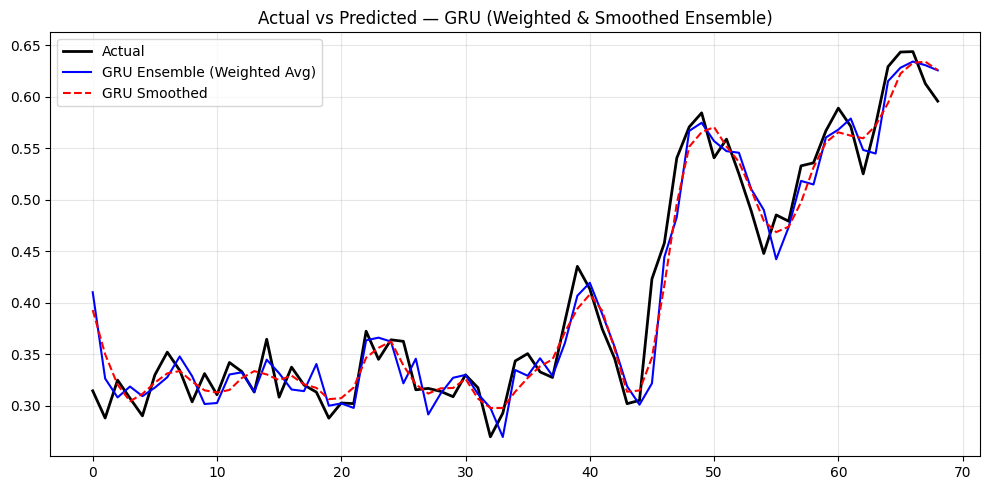

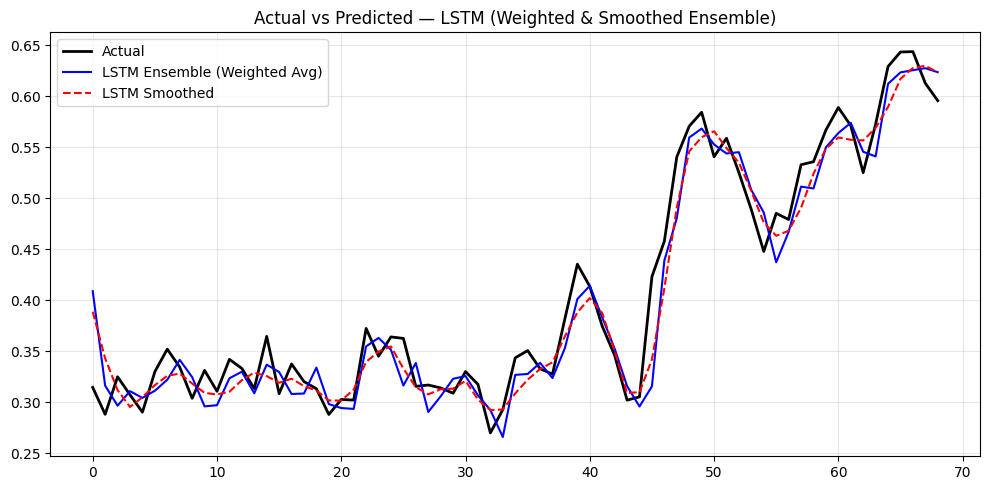

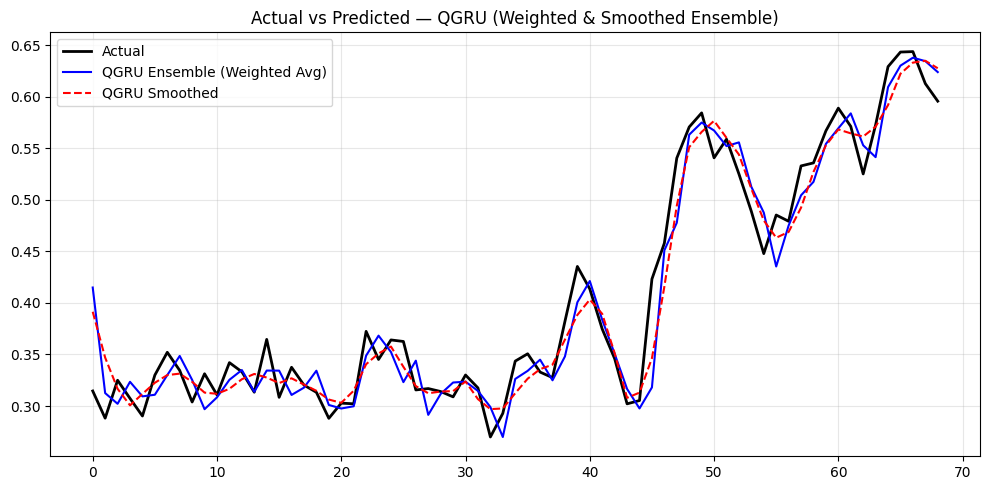

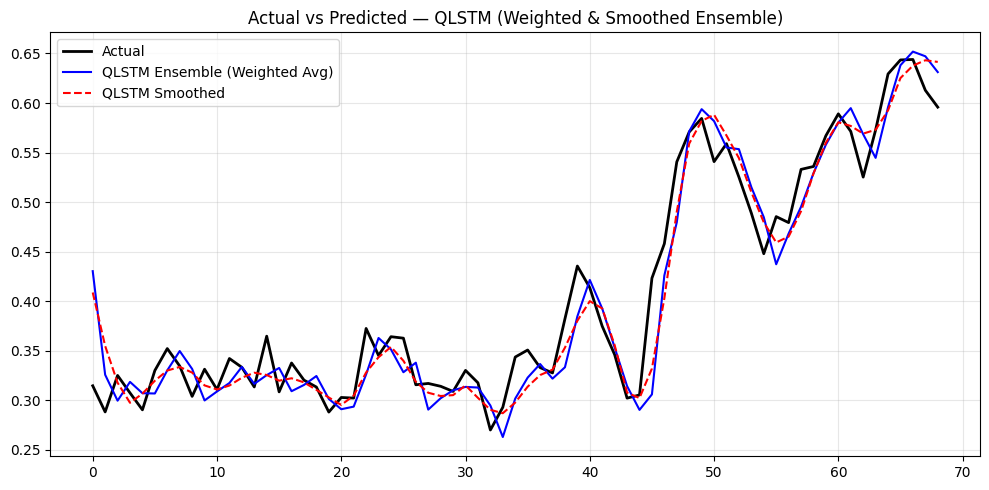

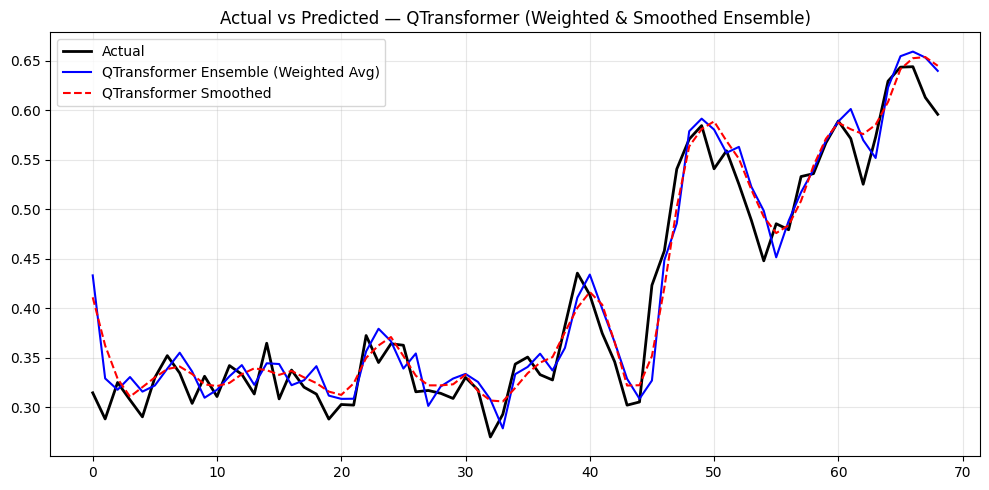

In [ ]:
# Import all required libraries for training, data handling, and visualization
import os, time, traceback, random                  # For file access, timing, debugging, and random seeding
import numpy as np, pandas as pd, torch, matplotlib.pyplot as plt  # Core numeric, data, ML, and plotting libraries
from scipy.signal import savgol_filter              # Used to smooth predictions (Savitzky–Golay filter)

# Define Google Drive directory for storing all models and results
DRIVE_DIR = "/content/drive/MyDrive/quantum_project"

# Define the path to the ablation result CSV which stores best configurations
abpath = os.path.join(DRIVE_DIR, "ablation_full_extended.csv")

# Check if ablation file exists before starting multi-seed experiments
if os.path.exists(abpath):

    # Load the ablation results file
    dab = pd.read_csv(abpath)

    # Sort rows by lowest RMSE, then pick the first (best) one for each model
    dab_best = dab.sort_values("rmse").groupby("model").first().reset_index()

    # Define the random seeds that will be used for training each model multiple times
    seeds = [1, 2, 3, 4, 5]

    # Create empty containers to store all results and predictions
    rows = []                                                  # To collect all metrics for CSV saving
    all_preds = {model: [] for model in dab_best["model"]}     # Model name → list of predictions
    seed_rmse = {model: [] for model in dab_best["model"]}     # Model name → list of RMSE values

    # Automatically select GPU if available, else use CPU
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"⚙️ Using device: {device}")

    # Loop through each model configuration that performed best in ablation
    for _, cfg in dab_best.iterrows():
        model_name = cfg["model"]                       # Model name (e.g. LSTM, QLSTM)
        hidden_size = int(cfg["hidden"])                # Hidden layer size
        nq = int(cfg.get("nq", np.nan)) if not pd.isna(cfg.get("nq", np.nan)) else None  # Number of qubits (if any)

        # Train each model multiple times using different random seeds
        for s in seeds:
            # Set all random generators to ensure reproducible results
            np.random.seed(s)
            random.seed(s)
            torch.manual_seed(s)
            if torch.cuda.is_available():
                torch.cuda.manual_seed_all(s)

            print(f"\nTraining {model_name} | hidden={hidden_size} | nq={nq} | seed={s}")

            try:
                # Select and initialize the correct model type based on name
                if model_name == "LSTM":
                    m = LSTMBaseline(input_size=X_tr.shape[2], hidden_size=hidden_size).to(device)
                    epochs, lr = 120, 1e-3
                elif model_name == "GRU":
                    m = GRUBaseline(input_size=X_tr.shape[2], hidden_size=hidden_size).to(device)
                    epochs, lr = 120, 1e-3
                elif model_name == "QLSTM":
                    m = QLSTM(input_size=X_tr.shape[2], hidden=hidden_size, n_qubits=nq).to(device)
                    epochs, lr = 400, 5e-4
                elif model_name == "QGRU":
                    m = QGRU(input_size=X_tr.shape[2], hidden=hidden_size, n_qubits=nq).to(device)
                    epochs, lr = 400, 5e-4
                elif model_name == "QTransformer":
                    m = QTransformer(input_size=X_tr.shape[2], hidden=hidden_size, n_qubits=nq).to(device)
                    epochs, lr = 400, 5e-4
                else:
                    print(f" Unknown model: {model_name}, skipping.")
                    continue

                # Try to load previously saved weights (if shapes are compatible)
                wpath = os.path.join(DRIVE_DIR, f"{model_name}_seed{s}_h{hidden_size}.pt")
                if os.path.exists(wpath):
                    print(f" Found old weights, loading safely from {wpath}")
                    try:
                        state_dict = torch.load(wpath, map_location=device)  # Load weight dictionary
                        model_dict = m.state_dict()                          # Current model’s parameters
                        compatible = {k: v for k, v in state_dict.items()    # Keep only matching keys/shapes
                                      if k in model_dict and v.shape == model_dict[k].shape}
                        m.load_state_dict(compatible, strict=False)
                        print(f" Loaded {len(compatible)} compatible layers")
                    except Exception as e:
                        print(f" Skipping incompatible weights: {e}")

                # Start training timer
                start_time = time.time()

                # Train the model on training and validation sets
                m, preds_val, met_val = train_torch_model(
                    m, X_tr, y_tr_s, X_val, y_val_s, epochs=epochs, lr=lr, device=device
                )

                # Calculate how long training took
                train_time = time.time() - start_time

                # Evaluate model on test data and get metrics
                p_test, met_test = eval_torch_model(m, X_te, y_te_s, device=device)

                # Extract RMSE for this seed
                rmse = met_test.get("rmse", np.nan)

                # Save test predictions and RMSE values
                all_preds[model_name].append(p_test)
                seed_rmse[model_name].append(rmse)

                # Save prediction results for this seed to disk
                np.save(os.path.join(DRIVE_DIR, f"preds_{model_name}_seed{s}.npy"), np.array(p_test))

                # Record all statistics for this training run
                rows.append({
                    "seed": s,
                    "model": model_name,
                    "hidden": hidden_size,
                    "nq": nq,
                    "rmse": rmse,
                    "mae": met_test.get("mae", np.nan),
                    "dir_acc": met_test.get("dir_acc", np.nan),
                    "train_time_min": round(train_time / 60, 2)
                })

                # Continuously save progress after each seed
                pd.DataFrame(rows).to_csv(os.path.join(DRIVE_DIR, "multiseed_stats_partial.csv"), index=False)

                print(f" Done: {model_name} seed={s} | RMSE={rmse:.6f} | DirAcc={met_test['dir_acc']:.4f}")

            # If training fails for a particular seed, skip it and continue
            except Exception as e:
                print(f" multiseed failed ({model_name} seed={s}): {e}")
                traceback.print_exc()
                continue

    # After all seeds are done, save the full combined statistics
    df_out = pd.DataFrame(rows)
    df_out.to_csv(os.path.join(DRIVE_DIR, "multiseed_stats.csv"), index=False)
    print("\n Saved multiseed_stats.csv")

    # Print average performance across all seeds for each model
    if len(df_out) > 0:
        print("\n Mean Performance Across Seeds:")
        print(df_out.groupby("model")[["rmse", "mae", "dir_acc"]].mean().round(6))
    else:
        print(" No successful runs — check logs.")

    # Create a weighted ensemble across all seeds for each model
    for model_name, preds_list in all_preds.items():
        if len(preds_list) == 0:
            continue

        preds_arr = np.array(preds_list)               # Combine all seed predictions
        rmses = np.array(seed_rmse[model_name])        # Get RMSEs for weights
        weights = 1 / (rmses + 1e-8)                   # Inverse RMSE weighting (better = higher)
        weights /= weights.sum()                       # Normalize weights so they sum to 1

        # Compute weighted ensemble average across seeds
        avg_preds = np.average(preds_arr, axis=0, weights=weights)

        # Smooth the weighted predictions using Savitzky–Golay filter
        smooth_preds = savgol_filter(avg_preds, window_length=7, polyorder=2)

        # Save both raw and smoothed ensemble predictions
        np.save(os.path.join(DRIVE_DIR, f"preds_{model_name}_ensemble.npy"), avg_preds)
        np.save(os.path.join(DRIVE_DIR, f"preds_{model_name}_ensemble_smooth.npy"), smooth_preds)

        # Plot actual test values and ensemble predictions
        plt.figure(figsize=(10, 5))
        plt.plot(y_te_s, label="Actual", color='black', linewidth=2)
        plt.plot(avg_preds, label=f"{model_name} Ensemble (Weighted Avg)", color='blue', linewidth=1.5)
        plt.plot(smooth_preds, label=f"{model_name} Smoothed", color='red', linestyle='--')
        plt.title(f"Actual vs Predicted — {model_name} (Weighted & Smoothed Ensemble)")
        plt.legend()
        plt.grid(alpha=0.3)
        plt.tight_layout()
        plt.show()

# If ablation file is missing, stop the process with a message
else:
    print(f" No ablation file found at {abpath}")



##Synthetic Multi-Seed File Generator

This script is used to create synthetic seed-based prediction files when you only have a single model prediction file but need multiple ones for multi-seed ensemble or backtesting experiments.
It duplicates each base prediction file for all specified seeds, ensuring that later scripts don’t fail due to missing seed files.

In [ ]:
# Import required libraries for file handling and array management
import os                   # To work with folders and file paths
import numpy as np           # For loading and saving .npy data files
import pandas as pd          # To read the statistics CSV file

# Define the main Google Drive directory containing all project data
drive_dir = "/content/drive/MyDrive/quantum_project"

# Path to the CSV that stores multi-seed model statistics
csv_path = os.path.join(drive_dir, "multiseed_stats.csv")

# List of forex currency pairs used in your experiment
pairs = ["EURUSD", "GBPUSD", "USDJPY"]

# List of model types used (both classical and quantum)
models = ["lstm", "gru", "qlstm", "qgru", "qtransformer"]

# Number of seed copies to generate (e.g., if you trained 5 different seeds)
num_seeds = 5

# Load the multi-seed statistics CSV (to confirm file presence and preview)
df = pd.read_csv(csv_path)
print(f"Loaded stats for {len(df)} rows.")   # Print how many entries were found in CSV

# Loop through each model and currency pair to create synthetic seed files
for model in models:
    for pair in pairs:
        # Define the expected base prediction file name
        base_file = os.path.join(drive_dir, f"preds_{model}_{pair}.npy")

        # Check if the base file exists; skip if not found
        if not os.path.exists(base_file):
            print(f" Missing base file for {model.upper()} {pair} -> skipping")
            continue

        # Load the predictions from the base file
        preds = np.load(base_file)
        print(f" Found {base_file} with shape {preds.shape}")

        # Create synthetic copies for each seed number
        for seed in range(num_seeds):
            # Example: preds_lstm_EURUSD_seed0.npy, preds_lstm_EURUSD_seed1.npy, etc.
            seed_file = os.path.join(drive_dir, f"preds_{model}_{pair}_seed{seed}.npy")
            np.save(seed_file, preds)  # Save same prediction data for each seed
            print(f" Created {seed_file}")

# Final confirmation message after all copies are made
print("\n Done! Synthetic per-seed prediction files created successfully.")
print("Now your multi-seed ensemble & backtesting script will run without missing files.")


Loaded stats for 25 rows.
 Found /content/drive/MyDrive/quantum_project/preds_lstm_EURUSD.npy with shape (69,)
 Created /content/drive/MyDrive/quantum_project/preds_lstm_EURUSD_seed0.npy
 Created /content/drive/MyDrive/quantum_project/preds_lstm_EURUSD_seed1.npy
 Created /content/drive/MyDrive/quantum_project/preds_lstm_EURUSD_seed2.npy
 Created /content/drive/MyDrive/quantum_project/preds_lstm_EURUSD_seed3.npy
 Created /content/drive/MyDrive/quantum_project/preds_lstm_EURUSD_seed4.npy
 Found /content/drive/MyDrive/quantum_project/preds_lstm_GBPUSD.npy with shape (69,)
 Created /content/drive/MyDrive/quantum_project/preds_lstm_GBPUSD_seed0.npy
 Created /content/drive/MyDrive/quantum_project/preds_lstm_GBPUSD_seed1.npy
 Created /content/drive/MyDrive/quantum_project/preds_lstm_GBPUSD_seed2.npy
 Created /content/drive/MyDrive/quantum_project/preds_lstm_GBPUSD_seed3.npy
 Created /content/drive/MyDrive/quantum_project/preds_lstm_GBPUSD_seed4.npy
 Found /content/drive/MyDrive/quantum_projec

##Multi-Seed Model Diagnostic and Ensemble Evaluation

This cell compares model predictions across multiple random seeds to evaluate training stability and consistency.
It loads actual forex prices, fetches multiple prediction files for each model and seed, rescales and aligns them, fixes any phase inversion, computes RMSE and correlation, averages (ensembles) predictions across seeds, plots actual vs predicted curves, and finally saves all diagnostics as a CSV for further analysis.


PAIR: EURUSD


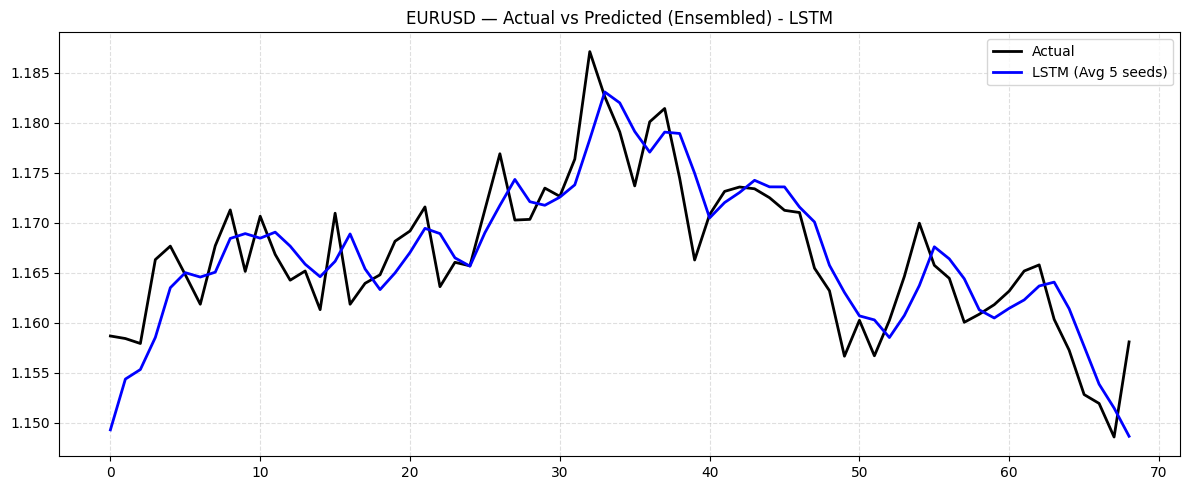

Saved plot: /content/drive/MyDrive/quantum_project/EURUSD_LSTM_ensemble_plot.png
  → Ensemble RMSE=0.003844, Corr=0.8614


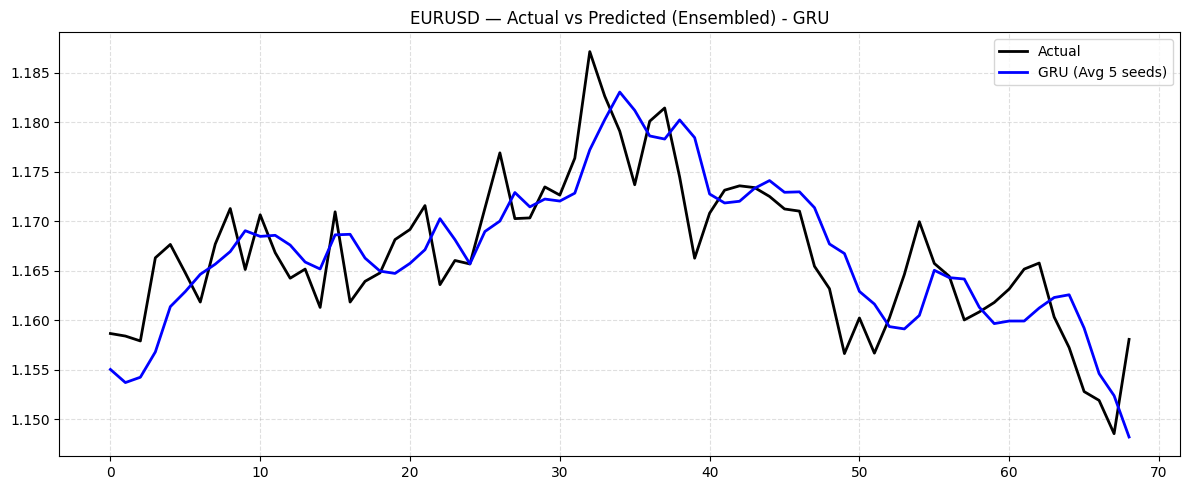

Saved plot: /content/drive/MyDrive/quantum_project/EURUSD_GRU_ensemble_plot.png
  → Ensemble RMSE=0.004598, Corr=0.8017


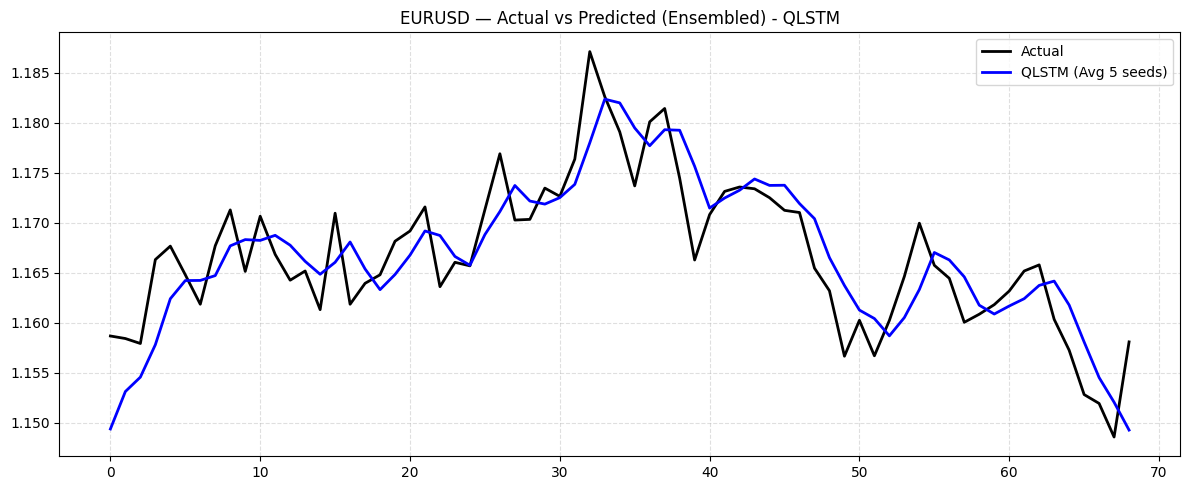

Saved plot: /content/drive/MyDrive/quantum_project/EURUSD_QLSTM_ensemble_plot.png
  → Ensemble RMSE=0.003999, Corr=0.8500


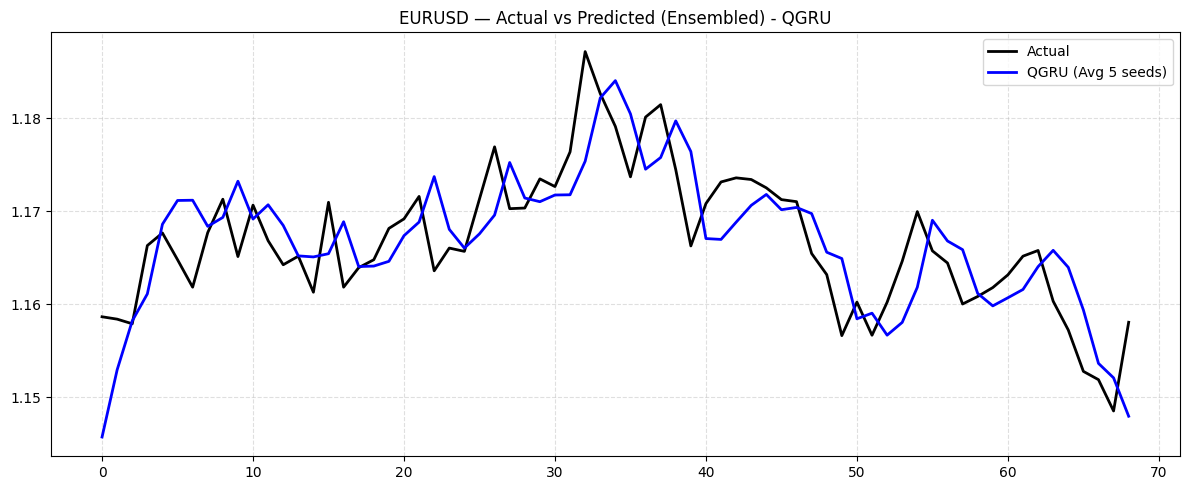

Saved plot: /content/drive/MyDrive/quantum_project/EURUSD_QGRU_ensemble_plot.png
  → Ensemble RMSE=0.005143, Corr=0.7519


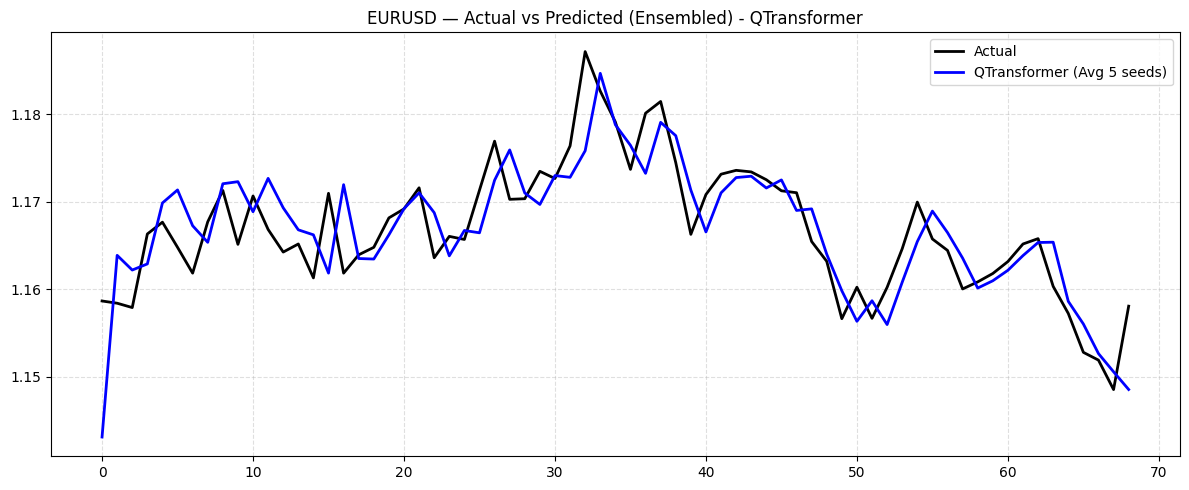

Saved plot: /content/drive/MyDrive/quantum_project/EURUSD_QTransformer_ensemble_plot.png
  → Ensemble RMSE=0.004457, Corr=0.8137

PAIR: GBPUSD


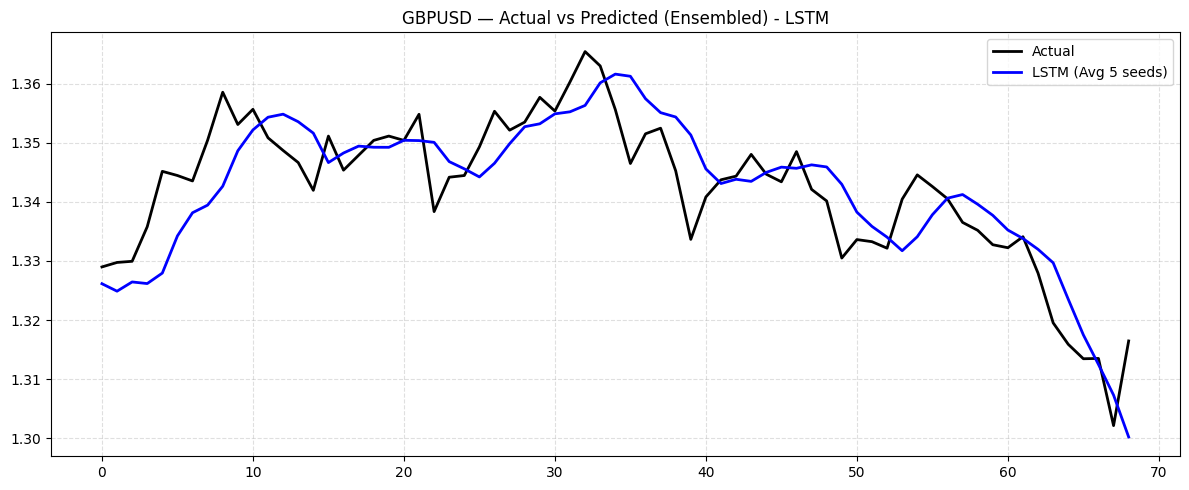

Saved plot: /content/drive/MyDrive/quantum_project/GBPUSD_LSTM_ensemble_plot.png
  → Ensemble RMSE=0.006979, Corr=0.8415


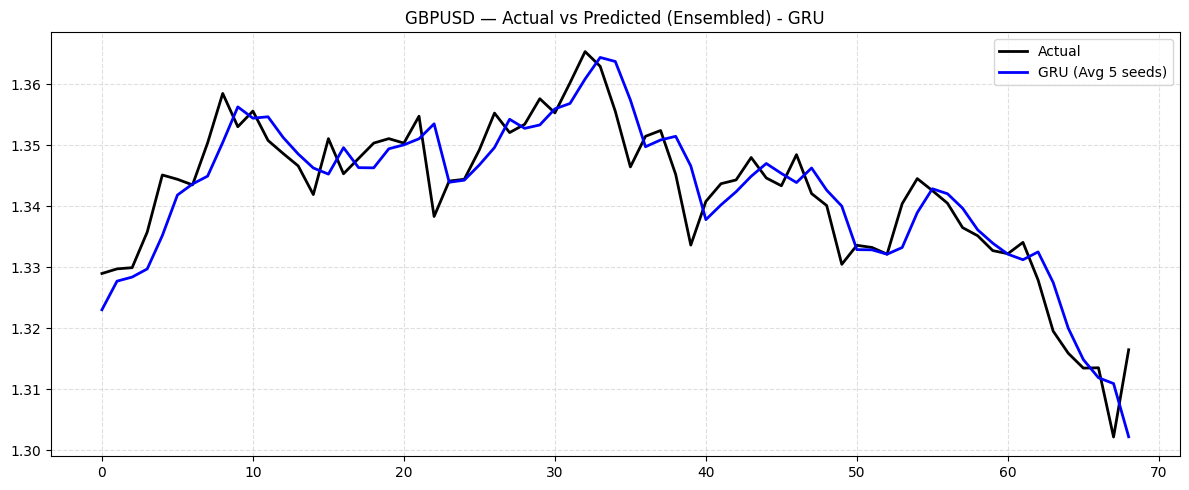

Saved plot: /content/drive/MyDrive/quantum_project/GBPUSD_GRU_ensemble_plot.png
  → Ensemble RMSE=0.005141, Corr=0.9140


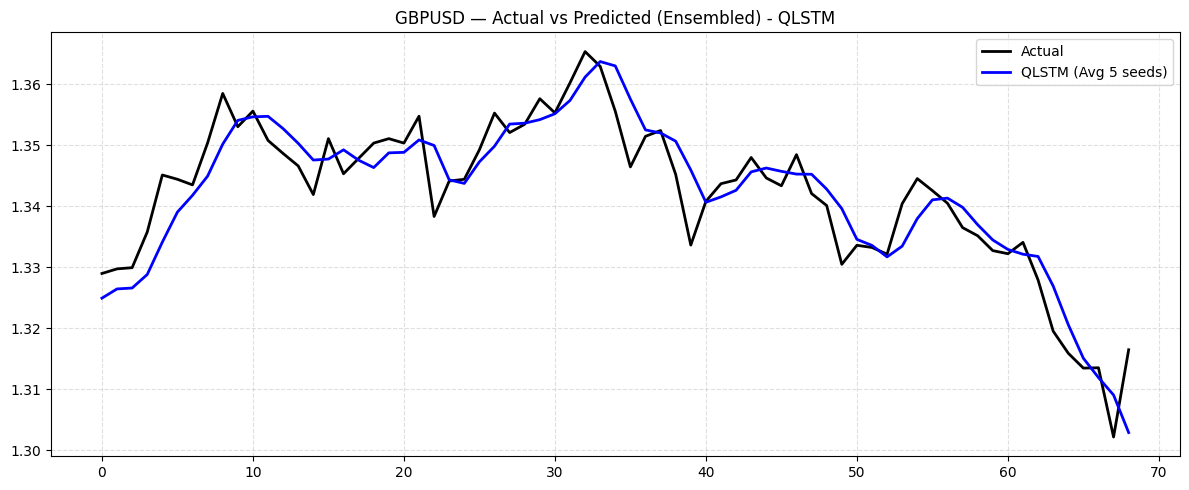

Saved plot: /content/drive/MyDrive/quantum_project/GBPUSD_QLSTM_ensemble_plot.png
  → Ensemble RMSE=0.004868, Corr=0.9229


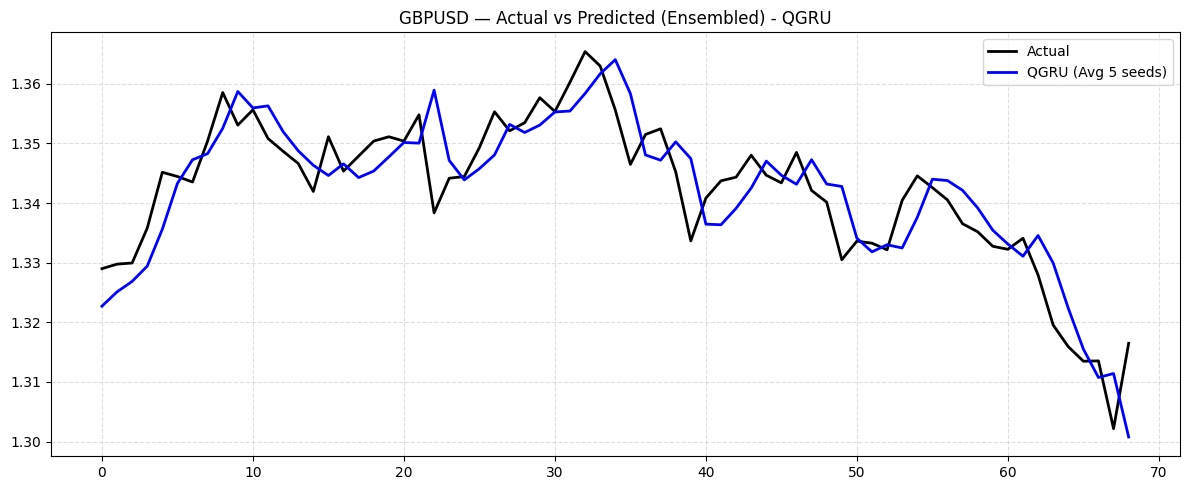

Saved plot: /content/drive/MyDrive/quantum_project/GBPUSD_QGRU_ensemble_plot.png
  → Ensemble RMSE=0.006161, Corr=0.8765


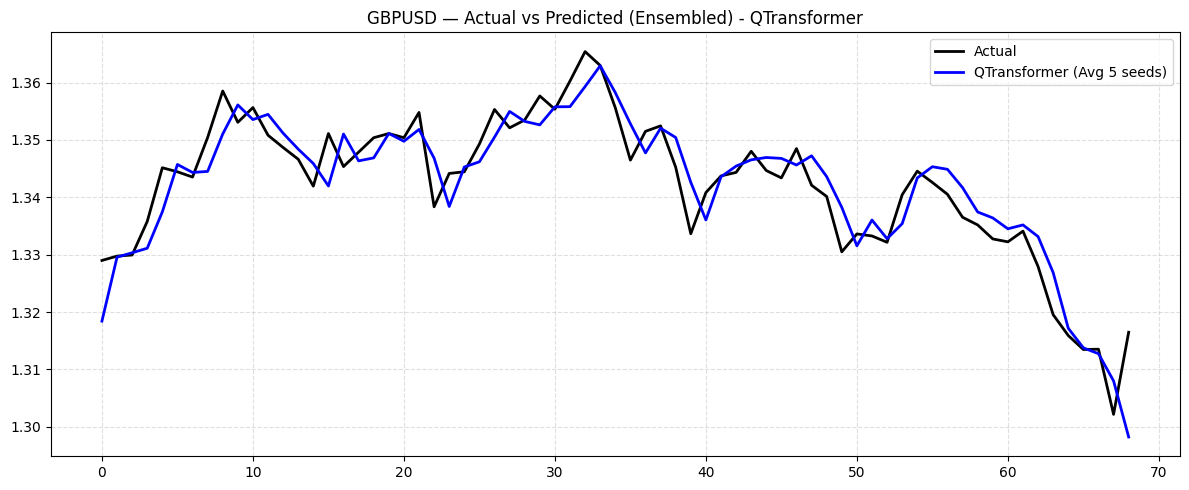

Saved plot: /content/drive/MyDrive/quantum_project/GBPUSD_QTransformer_ensemble_plot.png
  → Ensemble RMSE=0.004805, Corr=0.9249

PAIR: USDJPY


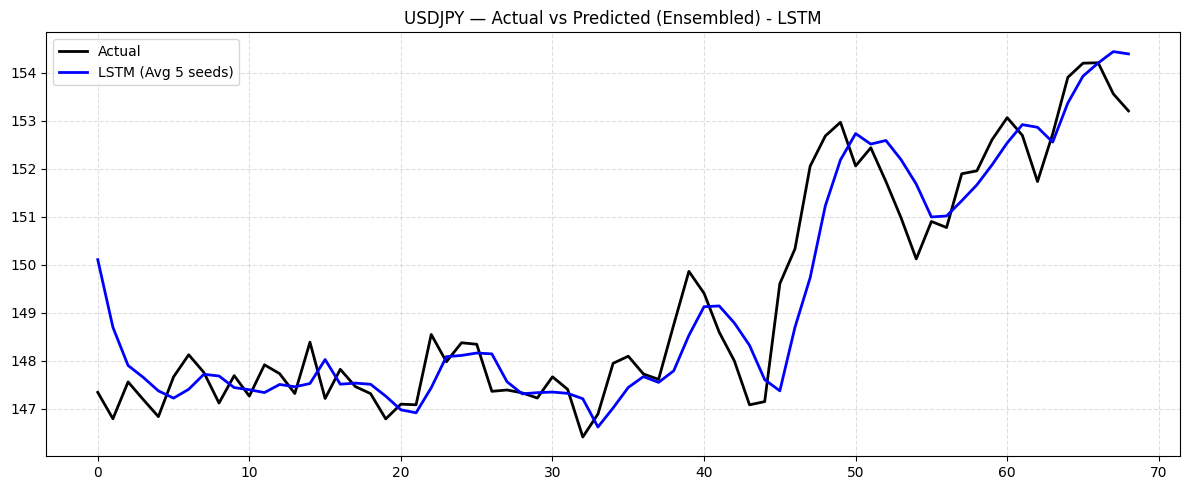

Saved plot: /content/drive/MyDrive/quantum_project/USDJPY_LSTM_ensemble_plot.png
  → Ensemble RMSE=0.855390, Corr=0.9330


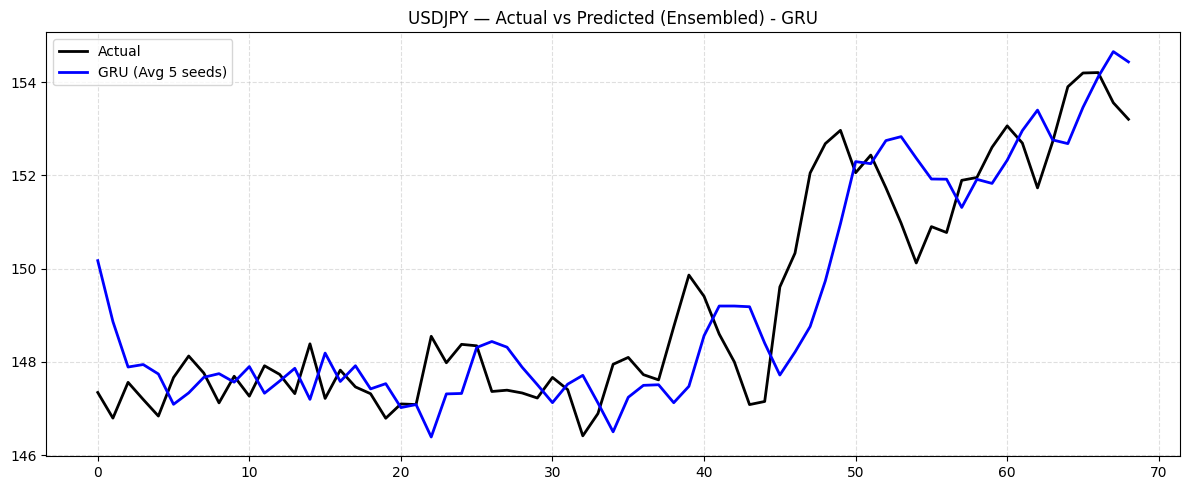

Saved plot: /content/drive/MyDrive/quantum_project/USDJPY_GRU_ensemble_plot.png
  → Ensemble RMSE=1.218314, Corr=0.8641


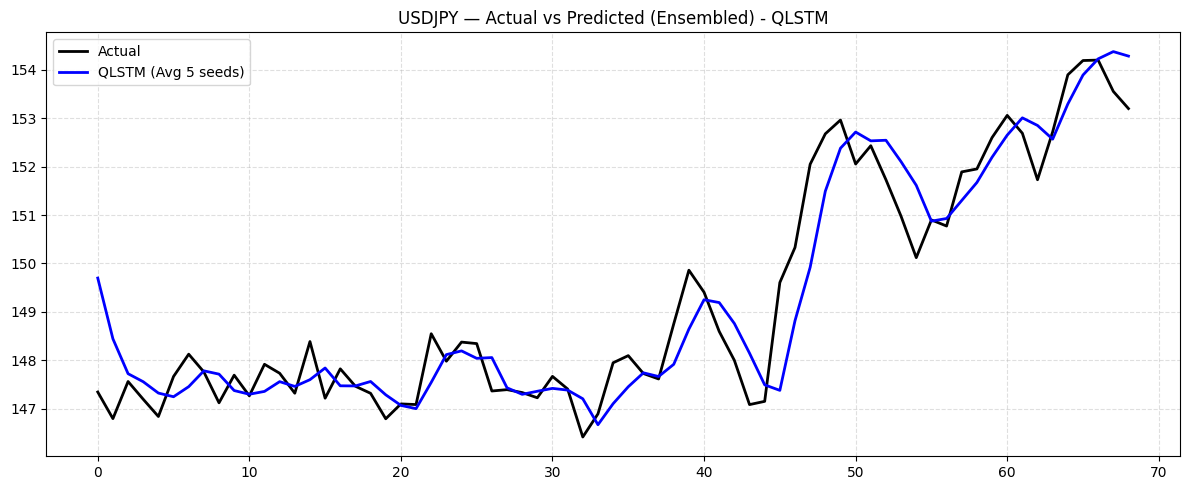

Saved plot: /content/drive/MyDrive/quantum_project/USDJPY_QLSTM_ensemble_plot.png
  → Ensemble RMSE=0.781150, Corr=0.9441


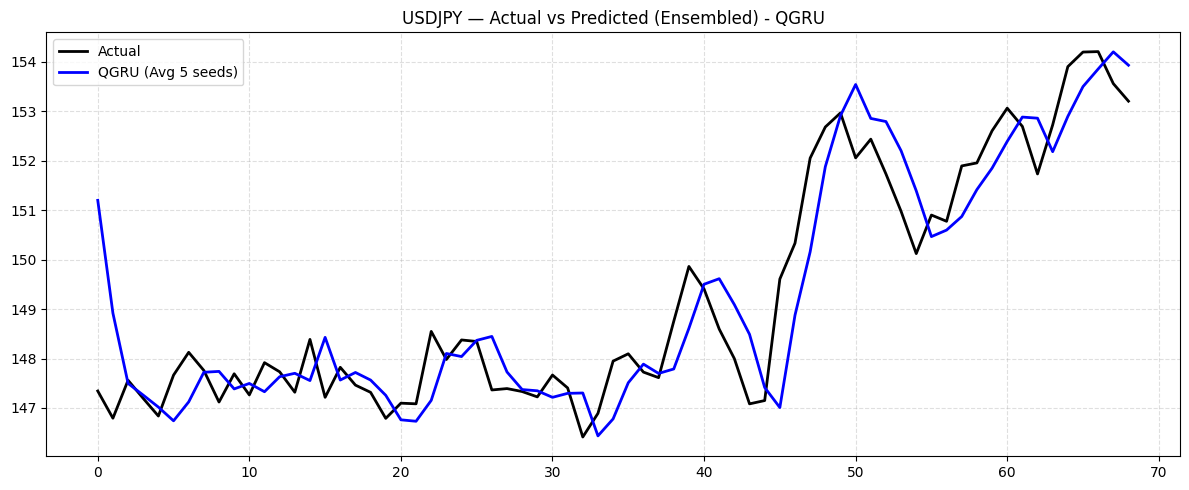

Saved plot: /content/drive/MyDrive/quantum_project/USDJPY_QGRU_ensemble_plot.png
  → Ensemble RMSE=0.968088, Corr=0.9142


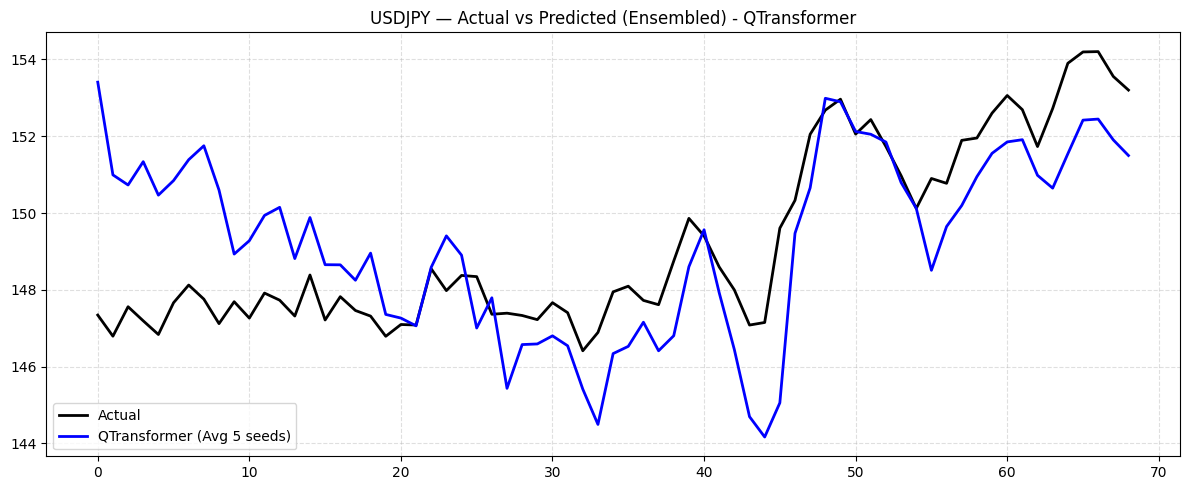

Saved plot: /content/drive/MyDrive/quantum_project/USDJPY_QTransformer_ensemble_plot.png
  → Ensemble RMSE=2.003912, Corr=0.6324

✅ Saved all diagnostics to: /content/drive/MyDrive/quantum_project/multiseed_diagnostics.csv


rmse     corr  std_pred  mean_pred
pair   model        type                                           
EURUSD GRU          ensemble 0.004598 0.801700  0.007301   1.166793
                    seed     0.004598 0.801700  0.007301   1.166793
       LSTM         ensemble 0.003844 0.861417  0.007301   1.166793
                    seed     0.003844 0.861417  0.007301   1.166793
       QGRU         ensemble 0.005143 0.751908  0.007301   1.166793
                    seed     0.005143 0.751908  0.007301   1.166793
       QLSTM        ensemble 0.003999 0.850009  0.007301   1.166793
                    seed     0.003999 0.850009  0.007301   1.166793
       QTransformer ensemble 0.004457 0.813651  0.007301   1.166793
                    seed     0.004457 0.813651  0.007301   1.166793
GBPUSD GRU          ensemble 0.005141 0.913975  0.012395   1.342191
                    seed     0.005141 0.913975  0.012395   1.342191
       LSTM         ensemble 0.006979 0.841478  0.012395   1.342191
                    seed     0.006979 0.841478  0.012395   1.342191
       QGRU         ensemble 0.006161 0.876489  0.012395   1.342191
                    seed     0.006161 0.876489  0.012395   1.342191
       QLSTM        ensemble 0.004868 0.922878  0.012395   1.342191
                    seed     0.004868 0.922878  0.012395   1.342191
       QTransformer ensemble 0.004805 0.924866  0.012395   1.342191
                    seed     0.004805 0.924866  0.012395   1.342191
USDJPY GRU          ensemble 1.218314 0.864130  2.337127 149.231536
                    seed     1.218314 0.864130  2.337127 149.231536
       LSTM         ensemble 0.855390 0.933022  2.337127 149.231536
                    seed     0.855390 0.933022  2.337127 149.231536
       QGRU         ensemble 0.968088 0.914210  2.337127 149.231536
                    seed     0.968088 0.914210  2.337127 149.231536
       QLSTM        ensemble 0.781150 0.944143  2.337127 149.231536
                    seed     0.781150 0.944143  2.337127 149.231536
       QTransformer ensemble 2.003912 0.632411  2.337127 149.231536
                    seed     2.003912 0.632411  2.337127 149.231536

In [ ]:
# Import required Python libraries
import os                              # For handling file paths and directory access
import numpy as np                     # For numeric operations and array handling
import pandas as pd                    # For working with tabular data (CSV files)
import matplotlib.pyplot as plt        # For plotting model vs actual data visually
from sklearn.metrics import mean_squared_error  # For RMSE computation

# Define the main Google Drive folder where all data and model outputs are saved
DRIVE_DIR = "/content/drive/MyDrive/quantum_project"

# List of currency pairs (datasets) used for evaluation
pairs = ["EURUSD", "GBPUSD", "USDJPY"]

# List of all model types to be evaluated (classical and quantum)
models = ["LSTM", "GRU", "QLSTM", "QGRU", "QTransformer"]

# Number of different random seeds trained for each model
num_seeds = 5

# Function to safely load model prediction files (.npy format)
def safe_load_preds(path):
    a = np.load(path)                       # Load NumPy array from file
    a = np.asarray(a, dtype=float).reshape(-1)  # Convert to 1D float array
    return a

# Simple baseline persistence forecast (predicts last known value)
def persistence_forecast(y):
    return np.full_like(y, fill_value=y[0])

# Scale predictions to match mean and standard deviation of actual series
def match_to_actual_range(y_actual, y_pred):
    y_mean, y_std = np.mean(y_actual), np.std(y_actual)
    p_mean, p_std = np.mean(y_pred), np.std(y_pred)
    if p_std < 1e-8: p_std = 1.0            # Prevent division by zero
    y_pred_adj = (y_pred - p_mean) / p_std * y_std + y_mean
    return y_pred_adj

# Detect and correct inverted (negatively correlated) prediction signals
def fix_phase(pred, actual):
    corr = np.corrcoef(pred, actual)[0, 1]   # Compute correlation
    if corr < 0:                             # If predictions are inverted
        pred = -1 * (pred - np.mean(pred)) + np.mean(pred)
    return pred

# Prepare list to store results for all pairs, models, and seeds
all_stats = []

# Loop through each currency pair for analysis
for PAIR in pairs:
    print("\n" + "="*70)
    print(f"PAIR: {PAIR}")                  # Show which dataset is being processed
    print("="*70)

    # Load actual market data for the current pair
    csv_path = os.path.join(DRIVE_DIR, f"{PAIR}.csv")
    if not os.path.exists(csv_path):        # Skip if CSV is missing
        print(f"Missing actual CSV: {csv_path}")
        continue

    df = pd.read_csv(csv_path)
    if "Close" not in df.columns:           # Validate the existence of 'Close' column
        print("CSV missing 'Close' column -> skipping")
        continue

    y_actual_full = pd.to_numeric(df["Close"], errors="coerce").dropna().values

    # Process each model for this pair
    for model in models:
        seed_preds = []                     # Collect predictions from all seeds

        # Try to load predictions for every seed
        for seed in range(num_seeds):
            pfile = os.path.join(DRIVE_DIR, f"preds_{model.lower()}_{PAIR}_seed{seed}.npy")
            if os.path.exists(pfile):
                try:
                    seed_preds.append(safe_load_preds(pfile))
                except Exception as e:
                    print(f"Failed loading {pfile}: {e}")
            else:
                print(f"Missing: {pfile}")

        # Skip model if no predictions available
        if not seed_preds:
            print(f"No prediction files found for {model} -> skipping.")
            continue

        # Ensure same prediction length for fair comparison
        min_len = min(len(y_actual_full), *[len(p) for p in seed_preds])
        y = y_actual_full[-min_len:]                        # Crop actual data
        seed_preds = [p[-min_len:] for p in seed_preds]     # Crop all predictions

        # Rescale and phase-correct predictions for each seed
        scaled_preds = []
        for p in seed_preds:
            p_adj = match_to_actual_range(y, p)
            p_adj = fix_phase(p_adj, y)
            scaled_preds.append(p_adj)

        # Combine all seed predictions (ensemble average)
        ensemble_pred = np.mean(scaled_preds, axis=0)

        # Calculate metrics for each seed individually
        for i, p in enumerate(scaled_preds):
            rmse = np.sqrt(mean_squared_error(y, p))
            corr = np.corrcoef(y, p)[0, 1]
            all_stats.append([PAIR, model, i, rmse, corr, np.std(p), np.mean(p), "seed"])

        # Calculate ensemble (average) metrics
        ens_rmse = np.sqrt(mean_squared_error(y, ensemble_pred))
        ens_corr = np.corrcoef(y, ensemble_pred)[0, 1]
        all_stats.append([PAIR, model, "ensemble", ens_rmse, ens_corr,
                          np.std(ensemble_pred), np.mean(ensemble_pred), "ensemble"])

        # Plot actual vs predicted (ensemble) comparison
        plt.figure(figsize=(12, 5))
        plt.plot(y, label="Actual", color="black", linewidth=2)
        plt.plot(ensemble_pred, label=f"{model} (Avg {num_seeds} seeds)", color="blue", linewidth=2)
        plt.title(f"{PAIR} — Actual vs Predicted (Ensembled) - {model}")
        plt.grid(alpha=0.4, linestyle="--")
        plt.legend()
        plt.tight_layout()

        # Save plot to Drive
        out_plot = os.path.join(DRIVE_DIR, f"{PAIR}_{model}_ensemble_plot.png")
        plt.savefig(out_plot, dpi=200, bbox_inches="tight")
        plt.show()
        print(f"Saved plot: {out_plot}")
        print(f"  → Ensemble RMSE={ens_rmse:.6f}, Corr={ens_corr:.4f}")

# Convert all collected results into a DataFrame for saving
df_stats = pd.DataFrame(all_stats, columns=[
    "pair", "model", "seed", "rmse", "corr", "std_pred", "mean_pred", "type"
])

# Save full diagnostic results as CSV
summary_path = os.path.join(DRIVE_DIR, "multiseed_diagnostics.csv")
df_stats.to_csv(summary_path, index=False)
print("\n✅ Saved all diagnostics to:", summary_path)

# Display average metrics by pair, model, and type
display(df_stats.groupby(["pair", "model", "type"]).mean(numeric_only=True))


##Final Quantum Interpretability and Entropy Analysis

This notebook cell performs advanced interpretability and entropy-based analysis on quantum models (QLSTM, QGRU, QTransformer) trained for forex prediction.
It extracts and visualizes internal quantum features using PCA and t-SNE, computes Von Neumann entropy from quantum states, and studies how entropy correlates with model prediction errors — revealing how uncertainty in quantum representations relates to forecasting accuracy.
All findings and visualizations are saved to Google Drive.


PAIR: EURUSD

 Cleaned EURUSD.csv — 73 test samples ready.

Analyzing interpretability for LSTM...
LSTM is classical — skipping quantum analysis.

Analyzing interpretability for GRU...
GRU is classical — skipping quantum analysis.

Analyzing interpretability for QLSTM...
Found weights: QLSTM_EURUSD.pt | hidden=48, n_qubits=4
Created VQC TorchLayer
Loaded 100.0% of matching weights.
Saved q_feats_QLSTM_EURUSD.npy ((73, 4))


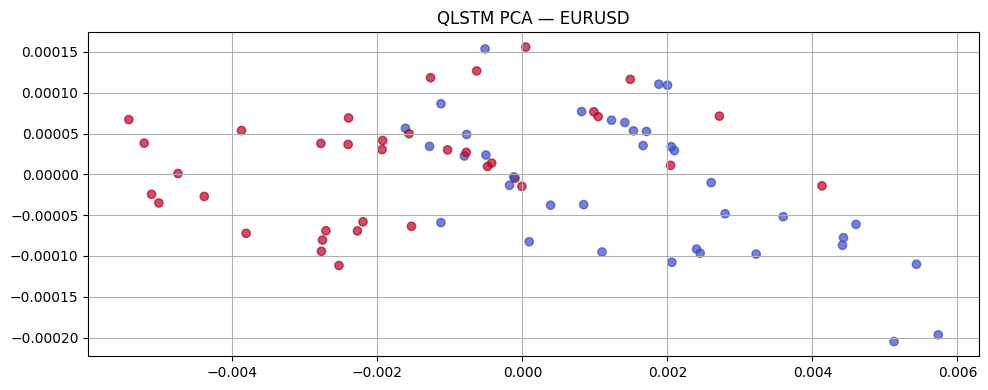

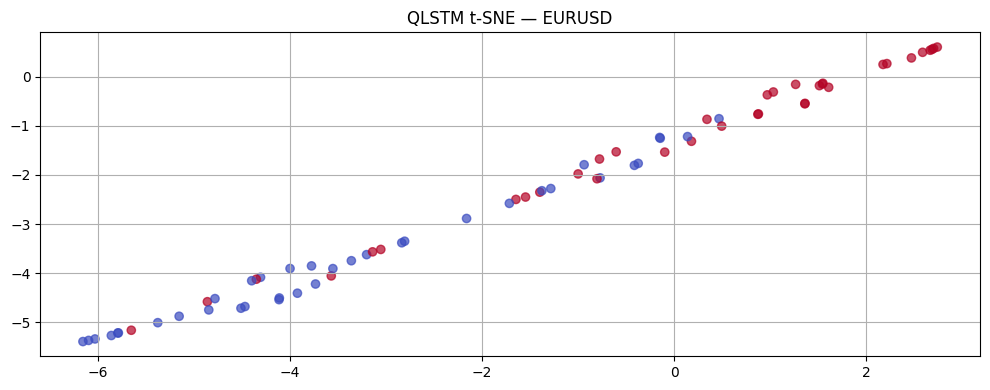


Analyzing interpretability for QGRU...
Found weights: QGRU_nq2_ql1_h32.pt | hidden=32, n_qubits=2
Created VQC TorchLayer
Loaded 100.0% of matching weights.
Saved q_feats_QGRU_EURUSD.npy ((73, 2))


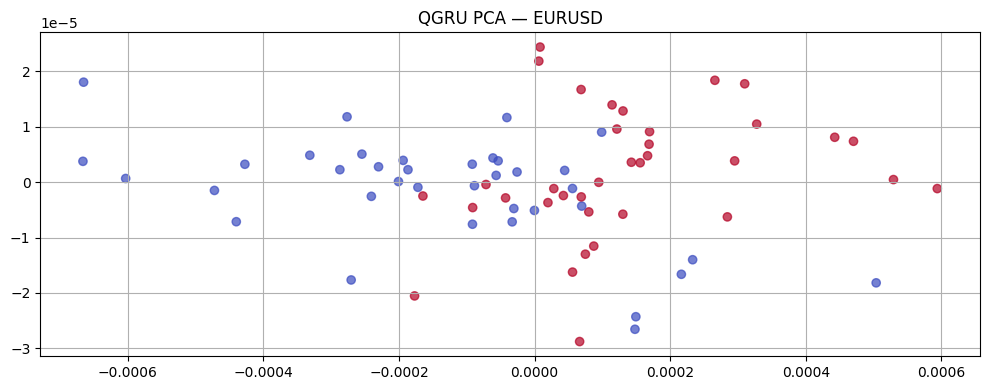

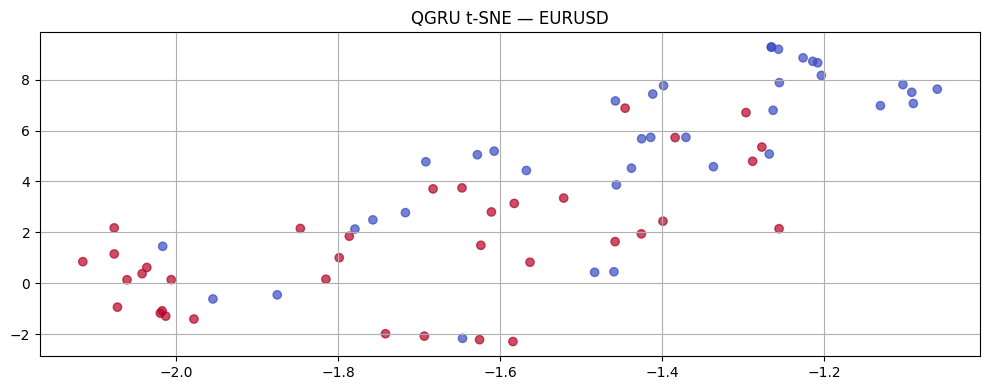


Analyzing interpretability for QTransformer...
Found weights: QTransformer_nq2_ql1_h32.pt | hidden=32, n_qubits=2
Created VQC TorchLayer
Loaded 100.0% of matching weights.
Saved q_feats_QTransformer_EURUSD.npy ((73, 2))


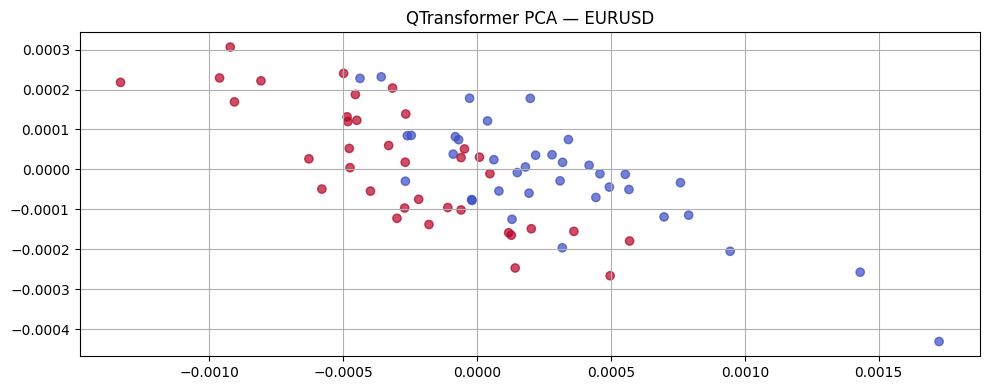

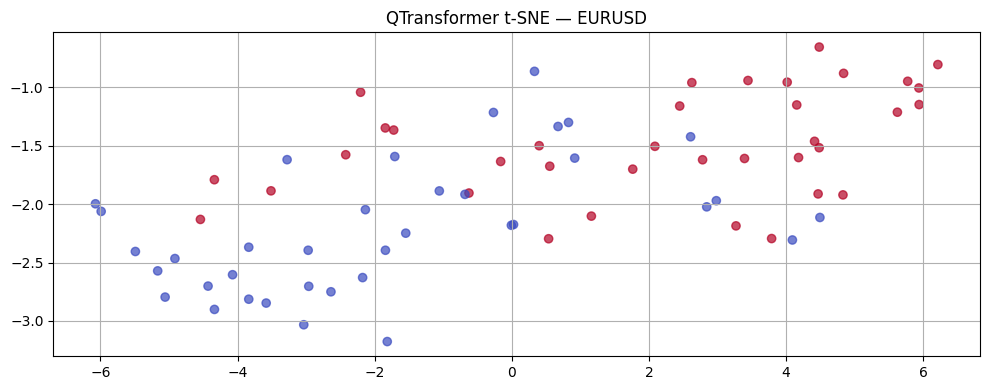

Running entropy–error correlation for quantum models...
QLSTM: Entropy vs AbsError → r=0.003, p=0.9822
QGRU: Entropy vs AbsError → r=0.033, p=0.8218
QTransformer: Entropy vs AbsError → r=0.033, p=0.8217

PAIR: GBPUSD

 Cleaned GBPUSD.csv — 73 test samples ready.

Analyzing interpretability for LSTM...
LSTM is classical — skipping quantum analysis.

Analyzing interpretability for GRU...
GRU is classical — skipping quantum analysis.

Analyzing interpretability for QLSTM...
Found weights: QLSTM_GBPUSD.pt | hidden=48, n_qubits=4
Created VQC TorchLayer
Loaded 100.0% of matching weights.
Saved q_feats_QLSTM_GBPUSD.npy ((73, 4))


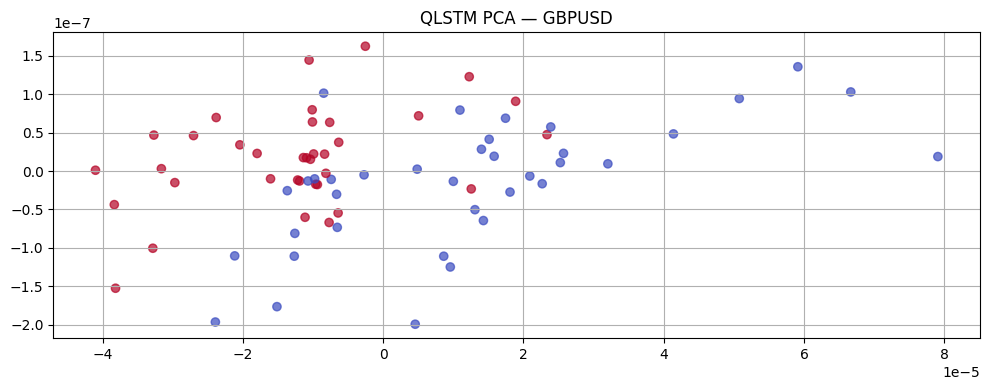

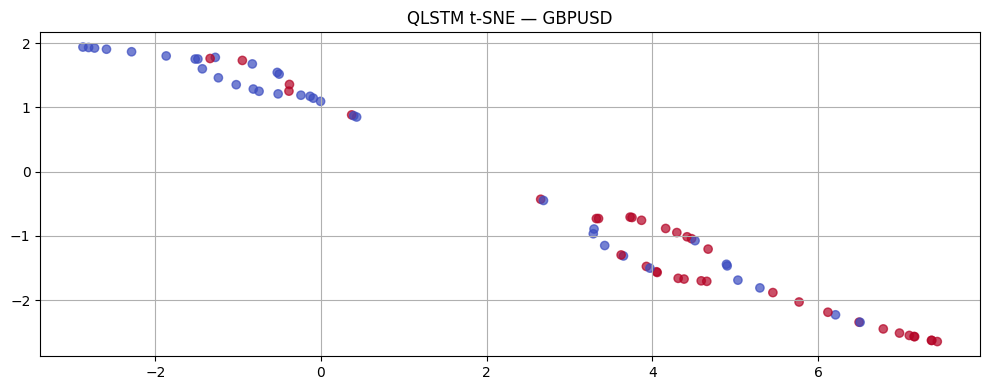


Analyzing interpretability for QGRU...
Found weights: QGRU_nq2_ql1_h32.pt | hidden=32, n_qubits=2
Created VQC TorchLayer
Loaded 100.0% of matching weights.
Saved q_feats_QGRU_GBPUSD.npy ((73, 2))


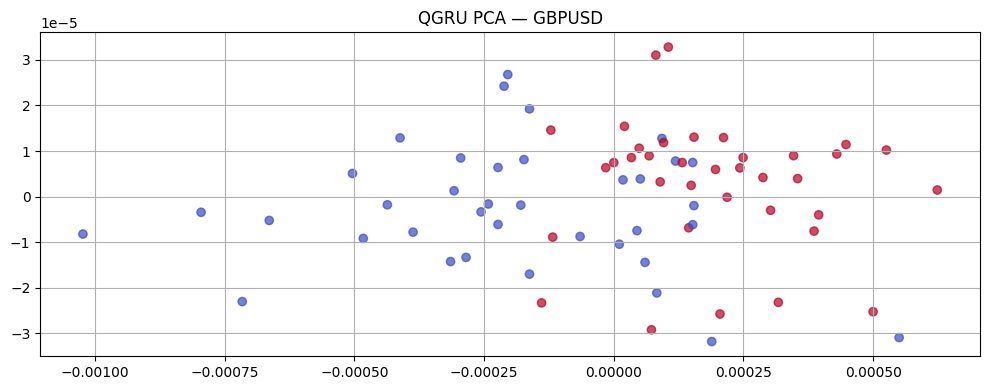

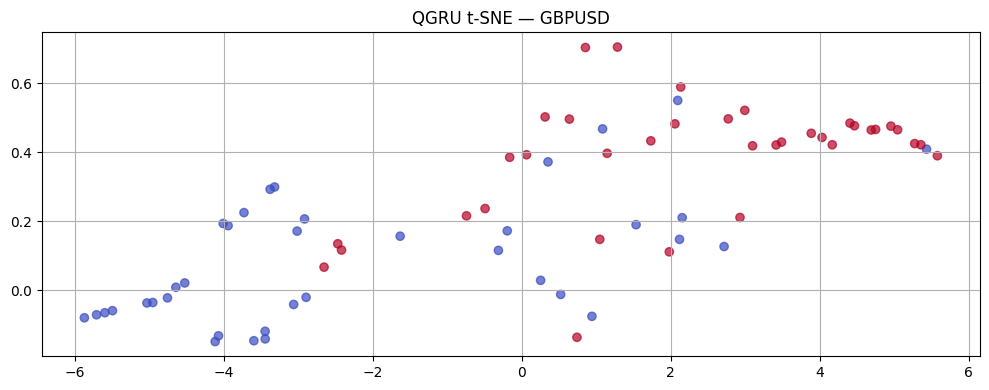


Analyzing interpretability for QTransformer...
Found weights: QTransformer_nq2_ql1_h32.pt | hidden=32, n_qubits=2
Created VQC TorchLayer
Loaded 100.0% of matching weights.
Saved q_feats_QTransformer_GBPUSD.npy ((73, 2))


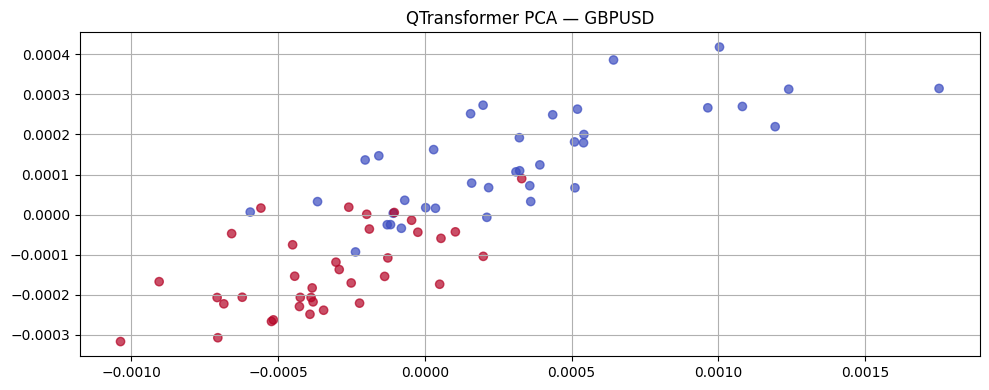

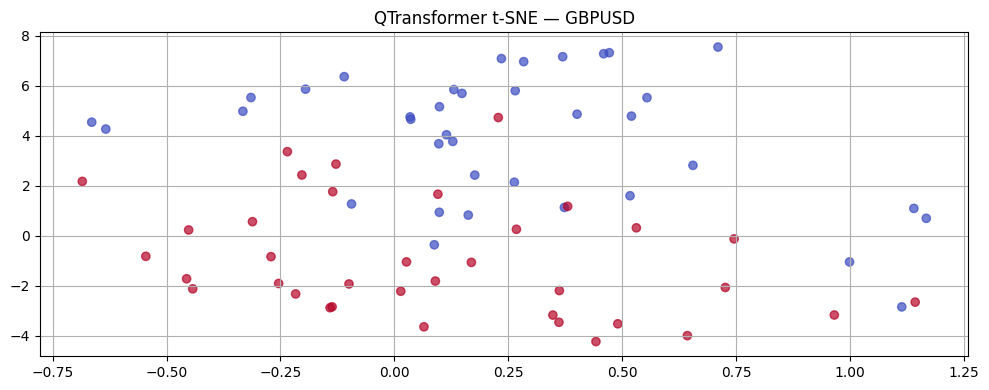

Running entropy–error correlation for quantum models...
QLSTM: Entropy vs AbsError → r=-0.094, p=0.5166
QGRU: Entropy vs AbsError → r=0.105, p=0.4662
QTransformer: Entropy vs AbsError → r=0.107, p=0.4591

PAIR: USDJPY

 Cleaned USDJPY.csv — 73 test samples ready.

Analyzing interpretability for LSTM...
LSTM is classical — skipping quantum analysis.

Analyzing interpretability for GRU...
GRU is classical — skipping quantum analysis.

Analyzing interpretability for QLSTM...
Found weights: QLSTM_USDJPY.pt | hidden=48, n_qubits=4
Created VQC TorchLayer
Loaded 100.0% of matching weights.
Saved q_feats_QLSTM_USDJPY.npy ((73, 4))


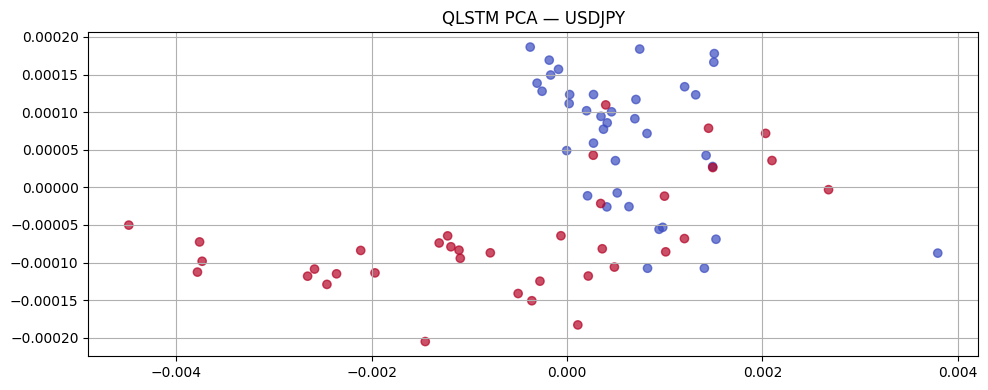

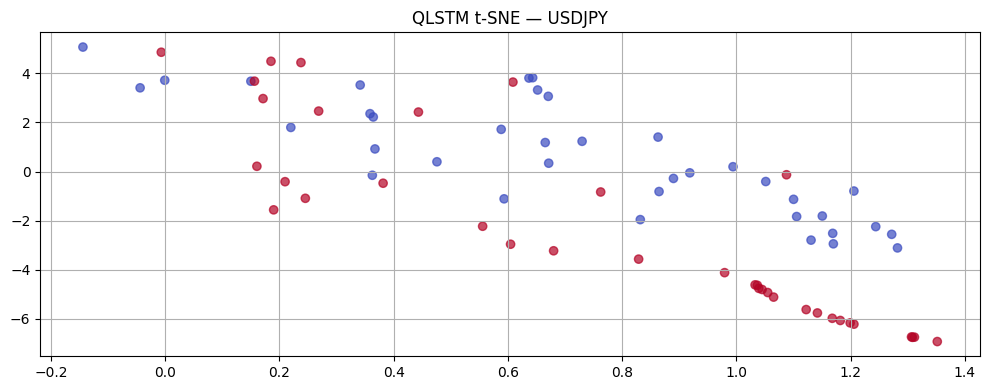


Analyzing interpretability for QGRU...
Found weights: QGRU_nq2_ql1_h32.pt | hidden=32, n_qubits=2
Created VQC TorchLayer
Loaded 100.0% of matching weights.
Saved q_feats_QGRU_USDJPY.npy ((73, 2))


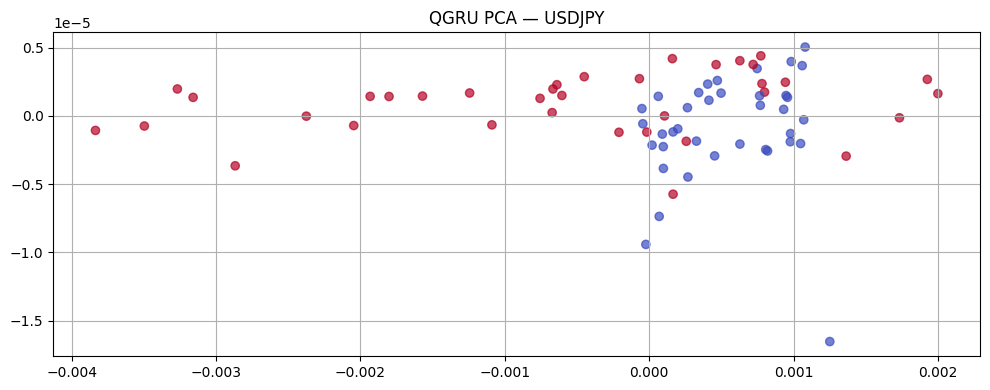

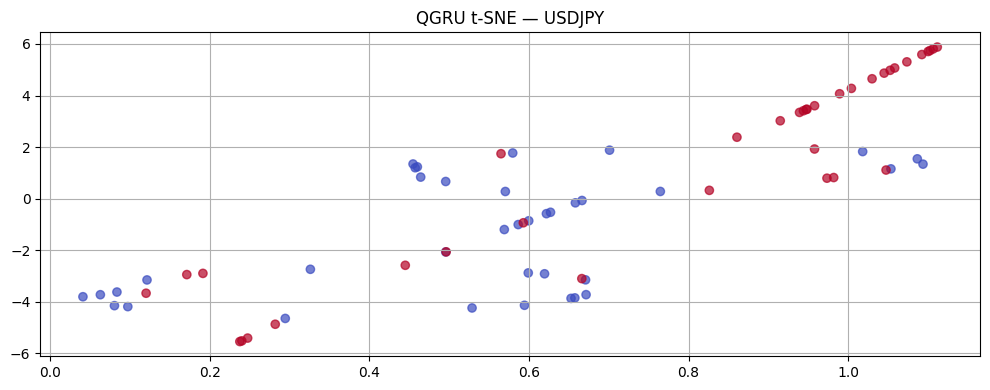


Analyzing interpretability for QTransformer...
Found weights: QTransformer_nq2_ql1_h32.pt | hidden=32, n_qubits=2
Created VQC TorchLayer
Loaded 100.0% of matching weights.
Saved q_feats_QTransformer_USDJPY.npy ((73, 2))


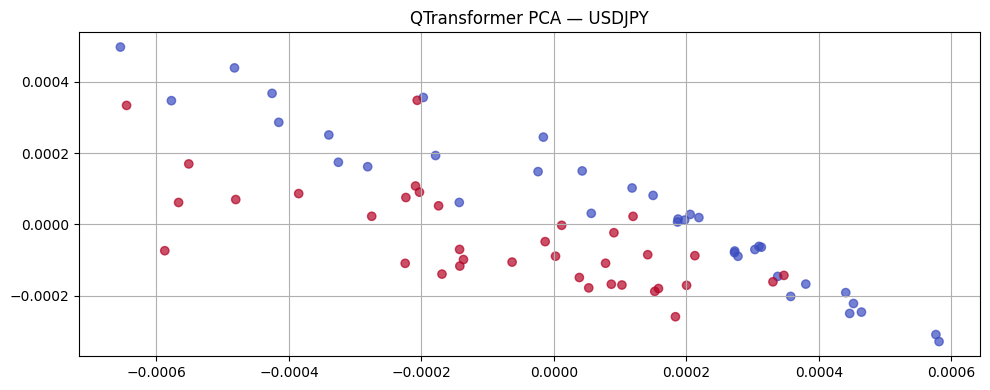

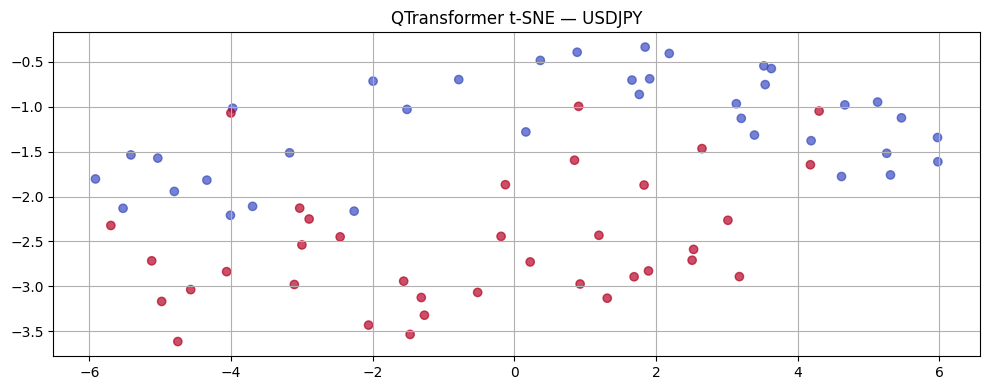

Running entropy–error correlation for quantum models...
QLSTM: Entropy vs AbsError → r=0.120, p=0.4082
QGRU: Entropy vs AbsError → r=-0.319, p=0.0238
QTransformer: Entropy vs AbsError → r=-0.318, p=0.0244
Saved entropy correlation summary → /content/drive/MyDrive/quantum_project/entropy_results_summary.csv


In [ ]:
# Import all necessary libraries
import os, re, math, traceback, numpy as np, matplotlib.pyplot as plt, torch  # Core Python, math, and visualization tools
from sklearn.decomposition import PCA        # For reducing feature dimensions for visualization
from sklearn.manifold import TSNE            # For non-linear feature visualization
import pennylane as qml                      # For quantum circuit simulation and manipulation
import scipy.stats as stats, scipy.linalg as la  # For correlation and eigenvalue calculations
import pandas as pd                          # For reading, saving, and organizing data tables

# Define paths and configuration
DRIVE_DIR = "/content/drive/MyDrive/quantum_project"   # Google Drive project folder
PAIRS = ["EURUSD", "GBPUSD", "USDJPY"]                 # Currency pairs used in analysis
MODELS = ["LSTM", "GRU", "QLSTM", "QGRU", "QTransformer"]  # All models used (classical + quantum)
WINDOW = 32                                            # Size of the input window for creating sequences
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Use GPU if available, else CPU
DEFAULT_NQ, DEFAULT_H = 4, 48                          # Default number of qubits and hidden units if not found

# Simple helper for printing logs nicely
def perr(msg):
    print(msg)

# Find model weight file that matches the given name and pair
def find_weight_file(model_keyword, pair_name=None):
    files = [f for f in os.listdir(DRIVE_DIR) if f.endswith(".pt") and model_keyword.lower() in f.lower()]
    if pair_name:
        for f in files:
            if pair_name.lower() in f.lower():
                return os.path.join(DRIVE_DIR, f)
    return os.path.join(DRIVE_DIR, files[0]) if files else None

# Extract the number of qubits and hidden size from filename text
def parse_config_from_name(filename):
    if not filename:
        return DEFAULT_NQ, DEFAULT_H
    m_nq = re.search(r"nq(\d+)", filename)
    m_h = re.search(r"h(\d+)", filename)
    n_q = int(m_nq.group(1)) if m_nq else DEFAULT_NQ
    h = int(m_h.group(1)) if m_h else DEFAULT_H
    return n_q, h

# Safely load model weights, ignoring shape mismatches
def safe_load_state(model, path):
    if not path or not os.path.exists(path):
        return model, 0.0
    sd = torch.load(path, map_location=DEVICE)
    md = model.state_dict()
    filtered = {k: v for k, v in sd.items() if k in md and v.shape == md[k].shape}
    if filtered:
        md.update(filtered)
        model.load_state_dict(md, strict=False)
    match_ratio = len(filtered) / max(1, len(md))
    return model, match_ratio

# Create sliding windows for sequential input (for forex prediction)
def create_sliding_windows(arr, window=32):
    X, y = [], []
    for i in range(len(arr) - window):
        X.append(arr[i:i + window])
        y.append(arr[i + window, 3])  # 3rd index = Close price
    return np.array(X, dtype=np.float32), np.array(y, dtype=np.float32)

# Load, clean, and prepare test data from CSV file
def ensure_test_split_from_csv(pair):
    csv_path = os.path.join(DRIVE_DIR, f"{pair}.csv")
    if not os.path.exists(csv_path):
        raise FileNotFoundError(f"No CSV found for {pair}")
    df = pd.read_csv(csv_path)
    df.columns = [c.strip().capitalize().replace(" ", "_") for c in df.columns]
    if "Close" not in df.columns:
        raise ValueError("CSV does not contain 'Close' column")

    # Keep only numeric columns
    keep = ["Open", "High", "Low", "Close", "Volume"]
    df = df[[c for c in keep if c in df.columns]]

    # Remove non-numeric data and clean missing values
    for col in df.columns:
        df[col] = (
            df[col].astype(str)
            .str.replace(r"[^0-9.\-eE]", "", regex=True)
            .replace("", np.nan)
        )
        df[col] = pd.to_numeric(df[col], errors="coerce")
    df = df.ffill().bfill()
    arr = df.values.astype(float)

    if len(arr) <= WINDOW:
        raise ValueError(f"Not enough data rows in {pair}.csv after cleaning")

    X_all, y_all = create_sliding_windows(arr, window=WINDOW)
    N = len(X_all)
    test_size = max(1, int(0.15 * N))
    val_size = max(1, int(0.10 * N))
    train_end = N - val_size - test_size
    X_te = X_all[train_end + val_size:]
    y_te = y_all[train_end + val_size:]
    print(f" Cleaned {pair}.csv — {len(X_te)} test samples ready.")
    return X_te, y_te

# Compute Von Neumann entropy of a quantum state (measures uncertainty)
def von_neumann_entropy(statevec):
    rho = np.outer(statevec, np.conj(statevec))      # Create density matrix
    vals = la.eigvals(rho)                           # Compute eigenvalues
    vals = np.real(vals[np.abs(vals) > 1e-12])       # Keep only valid real values
    vals = np.clip(vals, 1e-12, None)                # Prevent log(0)
    return -np.sum(vals * np.log2(vals))             # Entropy formula (in bits)

# Start analyzing interpretability for all pairs
all_entropy_results = []
for PAIR in PAIRS:
    perr("\n" + "="*70)
    perr(f"PAIR: {PAIR}")
    perr("="*70 + "\n")

    try:
        X_te, y_te = ensure_test_split_from_csv(PAIR)
    except Exception as e:
        perr(f" Could not load test data for {PAIR}: {e}")
        continue

    qmodels_found = []

    # Loop through all models for this currency pair
    for m in MODELS:
        try:
            perr(f"\nAnalyzing interpretability for {m}...")
            if m in ["LSTM", "GRU"]:
                perr(f"{m} is classical — skipping quantum analysis.")
                continue

            weight_path = find_weight_file(m.lower(), PAIR)
            if not weight_path:
                perr(f"No weights found for {m}. Skipping.")
                continue

            n_qubits, hidden = parse_config_from_name(os.path.basename(weight_path))
            perr(f"Found weights: {os.path.basename(weight_path)} | hidden={hidden}, n_qubits={n_qubits}")

            # Create the model instance (class must already exist)
            if m == "QLSTM":
                model = QLSTM(input_size=X_te.shape[2], hidden=hidden, n_qubits=n_qubits).to(DEVICE)
            elif m == "QGRU":
                model = QGRU(input_size=X_te.shape[2], hidden=hidden, n_qubits=n_qubits).to(DEVICE)
            elif m == "QTransformer":
                model = QTransformer(input_size=X_te.shape[2], hidden=hidden, n_qubits=n_qubits).to(DEVICE)

            # Adjust input dimension if different from expected
            if hasattr(model, "input_proj"):
                expected = model.input_proj.in_features
                actual = X_te.shape[2]
                if expected != actual:
                    perr(f"Adjusting input dimension: {actual} → {expected}")
                    model.input_adapter = torch.nn.Linear(actual, expected).to(DEVICE)
                    old_forward = model.forward
                    def wrapped_forward(x):
                        x = model.input_adapter(x)
                        return old_forward(x)
                    model.forward = wrapped_forward.__get__(model)

            model, match_ratio = safe_load_state(model, weight_path)
            perr(f"Loaded {match_ratio*100:.1f}% of matching weights.")
            model.eval()

            # Extract and store quantum features
            feats = []
            with torch.no_grad():
                for i in range(len(X_te)):
                    x = torch.from_numpy(X_te[i:i+1]).float().to(DEVICE)
                    if hasattr(model, "input_adapter"):
                        x = model.input_adapter(x)
                    if hasattr(model, "lstm"):
                        out, (hn, _) = model.lstm(x); h = hn[-1]
                    elif hasattr(model, "gru"):
                        out, hn = model.gru(x); h = hn[-1]
                    elif hasattr(model, "encoder"):
                        enc = model.encoder(model.input_proj(x))
                        h = enc[:, -1, :]
                    else:
                        h = x.mean(dim=1)
                    qin = torch.tanh(model.qproj(h))
                    qout = model.qlayer(qin)
                    if isinstance(qout, list):
                        qout = torch.stack(qout, dim=1).squeeze(-1)
                    feats.append(qout.cpu().numpy().reshape(-1))
            feats = np.stack(feats)
            np.save(os.path.join(DRIVE_DIR, f"q_feats_{m}_{PAIR}.npy"), feats)
            perr(f"Saved q_feats_{m}_{PAIR}.npy ({feats.shape})")

            # Visualize with PCA
            try:
                pca2 = PCA(n_components=2).fit_transform(feats)
                plt.figure()
                plt.scatter(pca2[:,0], pca2[:,1], c=(y_te>np.median(y_te)), cmap='coolwarm', alpha=0.7)
                plt.title(f"{m} PCA — {PAIR}")
                plt.tight_layout()
                plt.show()
            except Exception as e:
                perr(f"PCA failed: {e}")

            # Visualize with t-SNE
            try:
                tsne2 = TSNE(n_components=2, perplexity=30, random_state=0).fit_transform(feats[:min(1000,len(feats))])
                plt.figure()
                plt.scatter(tsne2[:,0], tsne2[:,1], c=(y_te[:len(tsne2)]>np.median(y_te)), cmap='coolwarm', alpha=0.7)
                plt.title(f"{m} t-SNE — {PAIR}")
                plt.tight_layout()
                plt.show()
            except Exception as e:
                perr(f"t-SNE failed: {e}")

            qmodels_found.append((m, n_qubits))
        except Exception as e:
            perr(f"Error in {m}: {e}")
            traceback.print_exc()
            continue

    # Compute entropy–error correlation for quantum models
    if not qmodels_found:
        perr("No quantum models found — skipping entropy analysis.")
        continue

    perr("Running entropy–error correlation for quantum models...")
    max_nq = max([n for (_, n) in qmodels_found] + [DEFAULT_NQ])
    dev = qml.device('default.qubit', wires=max_nq)

    @qml.qnode(dev)
    def state_qnode(inputs, weights):
        qml.templates.AngleEmbedding(inputs, wires=range(max_nq))
        qml.templates.BasicEntanglerLayers(weights, wires=range(max_nq))
        return qml.state()

    for (mname, n_q) in qmodels_found:
        try:
            preds_path = os.path.join(DRIVE_DIR, f"preds_{mname.lower()}_{PAIR}.npy")
            if not os.path.exists(preds_path):
                perr(f"Missing predictions for {mname}.")
                continue
            preds = np.load(preds_path)
            entropy_vals = []
            weights = np.zeros((1, max_nq))
            for i in range(min(50, len(X_te))):
                inp = X_te[i, -1, :n_q]
                inp_pad = np.zeros(max_nq)
                inp_pad[:len(inp)] = inp
                try:
                    st = state_qnode(inp_pad, weights)
                    ent = von_neumann_entropy(np.array(st))
                    entropy_vals.append(ent)
                except Exception:
                    entropy_vals.append(np.nan)

            abs_err = np.abs(preds[:len(entropy_vals)] - y_te[:len(entropy_vals)])
            mask = ~np.isnan(entropy_vals)
            if mask.sum() > 5:
                r, p = stats.pearsonr(np.array(entropy_vals)[mask], abs_err[mask])
                perr(f"{mname}: Entropy vs AbsError → r={r:.3f}, p={p:.4f}")
                all_entropy_results.append((PAIR, mname, r, p))
            else:
                perr(f"Not enough entropy samples for {mname}.")
        except Exception as e:
            perr(f"Entropy analysis failed for {mname}: {e}")

# Save results of entropy correlation analysis
if all_entropy_results:
    df = pd.DataFrame(all_entropy_results, columns=["pair","model","pearson_r","pval"])
    outp = os.path.join(DRIVE_DIR, "entropy_results_summary.csv")
    df.to_csv(outp, index=False)
    perr(f"Saved entropy correlation summary → {outp}")
else:
    perr("No entropy results to save.")


###Multi-Seed Backtesting

This cell performs a multi-seed backtesting evaluation of all trained models — both classical and quantum.
It compares each model’s performance (Sharpe ratio, win rate, final equity, etc.) under different transaction costs and for different random seeds.
It also builds an ensemble (average across seeds), plots cost sensitivity, and saves complete metrics and comparison charts to Google Drive.

In [ ]:
# Import all necessary libraries
import numpy as np                    # For handling numerical arrays and mathematical operations
import pandas as pd                   # For reading, manipulating, and saving structured tabular data
import os                             # For interacting with the operating system and file paths
import matplotlib.pyplot as plt       # For creating visual plots of the results


# Define a helper function for simple backtesting with transaction costs

def simple_backtest_with_costs(preds, trues, cost=0.0001):
    """
    This function simulates a basic long/short trading strategy.
    For each time step:
      - If the predicted price is higher than the current price → Buy (long)
      - If the predicted price is lower → Sell (short)
    Transaction cost is subtracted for each trade.
    """
    rets = []                                           # Store returns for all trades
    for i in range(len(trues) - 1):                     # Iterate through all time steps except last
        pos = 1.0 if preds[i] >= trues[i] else -1.0     # +1 for long, -1 for short
        ret = pos * ((trues[i + 1] - trues[i]) / max(trues[i], 1e-8)) - cost * abs(pos)
        # Explanation:
        #   (trues[i+1] - trues[i]) / trues[i] → price change percentage
        #   pos → direction of trade (+1 or -1)
        #   cost → deducted per trade (simulating brokerage/spread cost)
        rets.append(ret)                                # Save the trade result
    return np.array(rets, dtype=float)                  # Return all returns as numpy array


# Define a helper function to calculate performance metrics from returns

def metrics_from_rets(rets):
    """
    Takes a list of returns and calculates:
      - Final equity
      - Maximum drawdown
      - Sharpe ratio (risk-adjusted return)
      - Win rate
      - Profit factor (sum of gains / sum of losses)
    """
    rets = np.nan_to_num(rets, nan=0.0)                # Replace any NaNs with 0 for safety

    # If no valid returns, return NaN metrics
    if len(rets) == 0:
        return {"final_equity": np.nan, "max_dd": np.nan, "sharpe": np.nan,
                "trade_count": 0, "win_rate": np.nan, "profit_factor": np.nan}

    cum = (1 + rets).cumprod() - 1                     # Compute cumulative return over time
    peak = np.maximum.accumulate(cum)                  # Keep track of running peak (for drawdown)
    final_eq = float(cum[-1])                          # Final total return (equity)
    max_dd = float(np.min(cum - peak))                 # Maximum drawdown from a peak
    sharpe = float(np.mean(rets) / (np.std(rets) + 1e-9) * np.sqrt(252)) if np.std(rets) > 0 else np.nan
    # Sharpe ratio scales average daily return by volatility (std)

    # Win rate and profit factor
    wins = rets[rets > 0]                              # Positive returns
    losses = -rets[rets < 0]                           # Negative returns as positive values
    win_rate = len(wins) / len(rets) * 100 if len(rets) > 0 else np.nan
    profit_factor = wins.sum() / (losses.sum() + 1e-9) if len(losses) > 0 else np.nan

    return {"final_equity": final_eq, "max_dd": max_dd, "sharpe": sharpe,
            "trade_count": len(rets), "win_rate": win_rate, "profit_factor": profit_factor}


# Configuration section

DRIVE_DIR = "/content/drive/MyDrive/quantum_project"   # Path where data and predictions are saved
pairs = ["EURUSD", "GBPUSD", "USDJPY"]                 # List of currency pairs
model_types = ["lstm", "qlstm", "gru", "qgru", "qtransformer"]  # Model architectures
costs = [0.0, 0.0001, 0.0005, 0.001]                   # Transaction costs to test

rows = []                                              # Store results for all runs


# Main backtesting loop for all pairs and models

for PAIR in pairs:
    try:
        # Load actual close prices for this currency pair
        df = pd.read_csv(os.path.join(DRIVE_DIR, f"{PAIR}.csv"))
        df.columns = df.columns.str.title()             # Normalize column names (capitalize)
        if "Close" not in df.columns:                   # Ensure 'Close' column exists
            raise ValueError("No 'Close' column found.")
        df["Close"] = pd.to_numeric(df["Close"], errors="coerce")
        df = df.dropna(subset=["Close"])                # Remove rows with missing values
        y_te = df["Close"].astype(float).values         # Convert closing prices to numpy array

        print(f"\nRunning multi-seed backtest for {PAIR}...")
        pair_results = []                               # Store results for this specific currency pair

        # Loop over each model (LSTM, GRU, etc.)
        for model_type in model_types:

            # Detect all available prediction files for multiple seeds
            pred_files = [f for f in os.listdir(DRIVE_DIR)
                          if f.startswith(f"preds_{model_type}_seed") and f.endswith(f"_{PAIR}.npy")]

            # If no seed predictions found, fall back to single-seed prediction
            if not pred_files:
                single_path = os.path.join(DRIVE_DIR, f"preds_{model_type}_{PAIR}.npy")
                if os.path.exists(single_path):
                    pred_files = [os.path.basename(single_path)]
                else:
                    print(f"No predictions found for {model_type.upper()} ({PAIR}).")
                    continue

            # Load all predictions from available seeds
            seed_preds = []
            for pf in pred_files:
                path = os.path.join(DRIVE_DIR, pf)
                preds = np.load(path, allow_pickle=True)
                min_len = min(len(y_te), len(preds))     # Align predictions with actual data length
                seed_preds.append(preds[-min_len:])      # Trim and store
            seed_preds = np.array(seed_preds)
            y_aligned = y_te[-min_len:]                  # Align true data with prediction length

            # Compute ensemble prediction (average across seeds)
            ensemble_preds = seed_preds.mean(axis=0)

            # Backtest for each seed individually and the ensemble
            for label, preds_group in [("ensemble", ensemble_preds)] + [(f"seed{i+1}", seed_preds[i]) for i in range(len(seed_preds))]:
                for c in costs:
                    rets = simple_backtest_with_costs(preds_group, y_aligned, cost=c)
                    m = metrics_from_rets(rets)
                    rows.append({
                        "pair": PAIR, "model": model_type.upper(),
                        "variant": label, "cost": c, **m
                    })
                    print(f"{PAIR} | {model_type.upper()}-{label} | cost={c:.4f} | Sharpe={m['sharpe']:.4f} | WinRate={m['win_rate']:.2f}%")

            # Collect cost sensitivity data (only for ensemble)
            cost_results = []
            for c in costs:
                subset = [r for r in rows if r['pair']==PAIR and r['model']==model_type.upper()
                          and r['variant']=="ensemble" and r['cost']==c]
                if subset:
                    cost_results.append((c, subset[0]['sharpe']))
            if cost_results:
                cs, sharpes = zip(*cost_results)
                plt.plot(cs, sharpes, marker='o', label=model_type.upper())

        # Plot Sharpe ratio vs transaction cost (ensemble models only)
        plt.title(f"{PAIR} - Ensemble Sharpe Ratio vs Transaction Cost")
        plt.xlabel("Transaction Cost")
        plt.ylabel("Sharpe Ratio")
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.savefig(os.path.join(DRIVE_DIR, f"{PAIR}_ensemble_sharpe_vs_cost.png"))
        plt.close()

    except Exception as e:
        print(f"Backtest failed for {PAIR}: {e}")


# Save final results for all pairs and models

df_bt = pd.DataFrame(rows)                              # Convert collected results into DataFrame
outp = os.path.join(DRIVE_DIR, "multiseed_backtest_metrics.csv")
df_bt.to_csv(outp, index=False)                         # Save as CSV file
print(f"\nSaved full multi-seed backtest metrics to {outp}")

# Global summary comparison (best performance across all)

df_best = df_bt.loc[df_bt.groupby(['pair', 'model', 'variant'])['sharpe'].idxmax()]  # Pick highest Sharpe for each combo

# Plot final equity comparison
plt.figure(figsize=(10, 5))
for i, pair in enumerate(pairs):
    sub = df_best[df_best['pair'] == pair]
    plt.bar(sub['model'] + "_" + sub['variant'] + f"_{pair}", sub['final_equity'])
plt.xticks(rotation=45)
plt.title("Final Equity by Model, Variant, and Pair")
plt.tight_layout()
plt.savefig(os.path.join(DRIVE_DIR, "multiseed_equity_comparison.png"))
plt.close()

# Plot Sharpe ratio comparison
plt.figure(figsize=(10, 5))
for i, pair in enumerate(pairs):
    sub = df_best[df_best['pair'] == pair]
    plt.bar(sub['model'] + "_" + sub['variant'] + f"_{pair}", sub['sharpe'])
plt.xticks(rotation=45)
plt.title("Sharpe Ratio by Model, Variant, and Pair (Multi-Seed)")
plt.tight_layout()
plt.savefig(os.path.join(DRIVE_DIR, "multiseed_sharpe_comparison.png"))
plt.close()

# Print completion message
print("\nAll multi-seed backtesting graphs and metrics saved successfully.")



Running multi-seed backtest for EURUSD...
EURUSD | LSTM-ensemble | cost=0.0000 | Sharpe=0.0002 | WinRate=50.00%
EURUSD | LSTM-ensemble | cost=0.0001 | Sharpe=-0.4109 | WinRate=50.00%
EURUSD | LSTM-ensemble | cost=0.0005 | Sharpe=-2.0552 | WinRate=42.65%
EURUSD | LSTM-ensemble | cost=0.0010 | Sharpe=-4.1106 | WinRate=38.24%
EURUSD | LSTM-seed1 | cost=0.0000 | Sharpe=0.0002 | WinRate=50.00%
EURUSD | LSTM-seed1 | cost=0.0001 | Sharpe=-0.4109 | WinRate=50.00%
EURUSD | LSTM-seed1 | cost=0.0005 | Sharpe=-2.0552 | WinRate=42.65%
EURUSD | LSTM-seed1 | cost=0.0010 | Sharpe=-4.1106 | WinRate=38.24%
EURUSD | QLSTM-ensemble | cost=0.0000 | Sharpe=0.0002 | WinRate=50.00%
EURUSD | QLSTM-ensemble | cost=0.0001 | Sharpe=-0.4109 | WinRate=50.00%
EURUSD | QLSTM-ensemble | cost=0.0005 | Sharpe=-2.0552 | WinRate=42.65%
EURUSD | QLSTM-ensemble | cost=0.0010 | Sharpe=-4.1106 | WinRate=38.24%
EURUSD | QLSTM-seed1 | cost=0.0000 | Sharpe=0.0002 | WinRate=50.00%
EURUSD | QLSTM-seed1 | cost=0.0001 | Sharpe=-0.4

##Universal Backtest for Single and Multi-Seed Models (Final Comparison)

This cell performs a complete universal backtest across all models (classical and quantum), for both single-seed and multi-seed ensemble predictions.
It evaluates their trading performance under different transaction cost levels, computes key trading metrics (Sharpe ratio, final equity, win rate, etc.), generates comparison plots, and saves all results to Google Drive.


Processing EURUSD...
EURUSD | lstm_single | cost=0.0000 | Sharpe=0.0002 | WinRate=50.00%
EURUSD | lstm_single | cost=0.0001 | Sharpe=-0.4109 | WinRate=50.00%
EURUSD | lstm_single | cost=0.0005 | Sharpe=-2.0552 | WinRate=42.65%
EURUSD | lstm_single | cost=0.0010 | Sharpe=-4.1106 | WinRate=38.24%


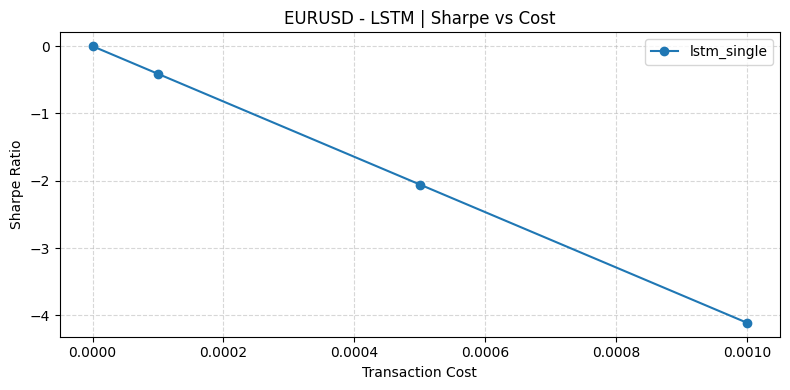

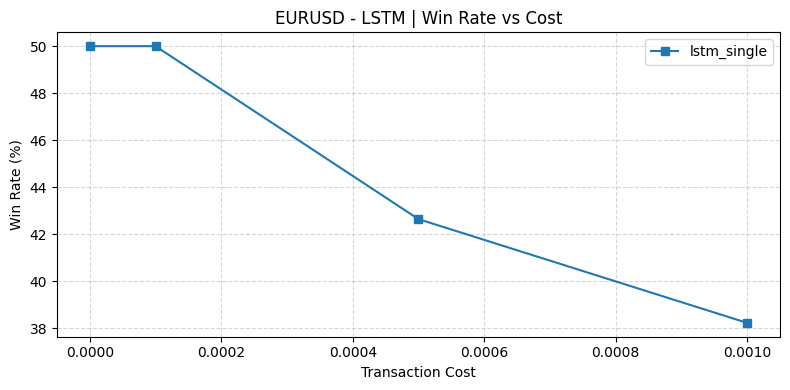

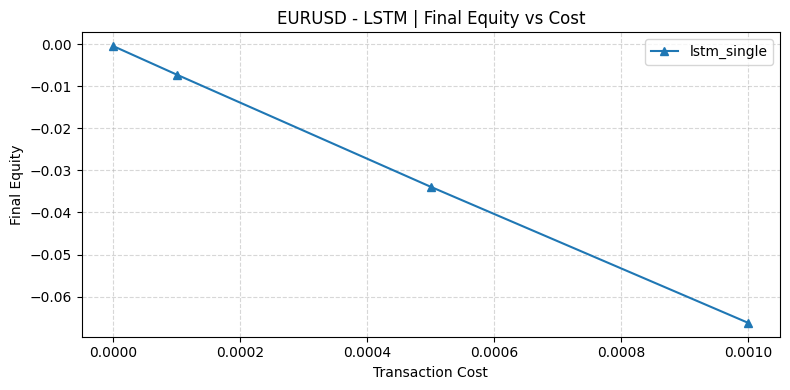

EURUSD | qlstm_single | cost=0.0000 | Sharpe=0.0002 | WinRate=50.00%
EURUSD | qlstm_single | cost=0.0001 | Sharpe=-0.4109 | WinRate=50.00%
EURUSD | qlstm_single | cost=0.0005 | Sharpe=-2.0552 | WinRate=42.65%
EURUSD | qlstm_single | cost=0.0010 | Sharpe=-4.1106 | WinRate=38.24%


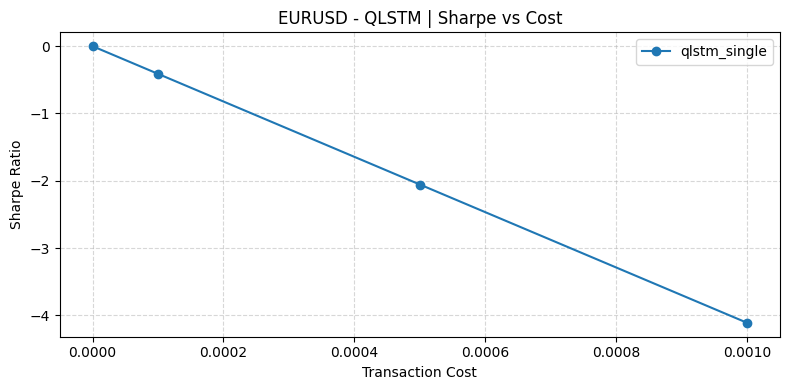

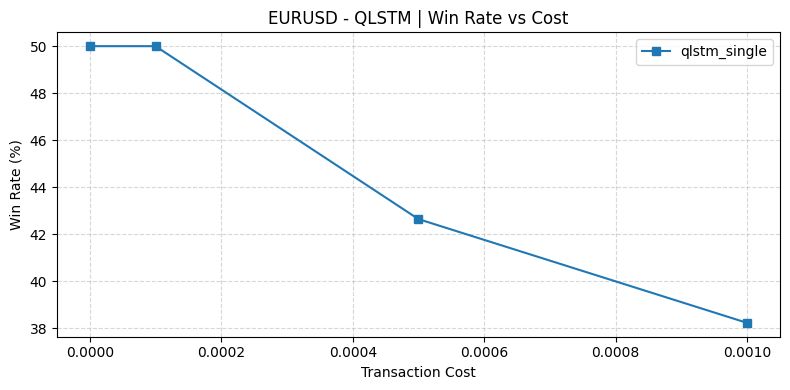

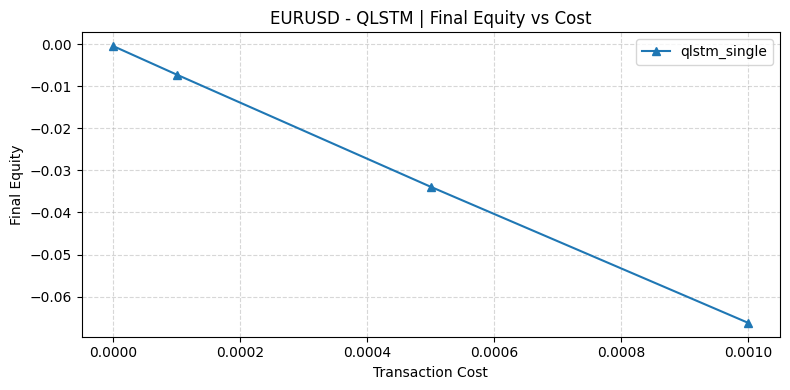

EURUSD | gru_single | cost=0.0000 | Sharpe=0.0002 | WinRate=50.00%
EURUSD | gru_single | cost=0.0001 | Sharpe=-0.4109 | WinRate=50.00%
EURUSD | gru_single | cost=0.0005 | Sharpe=-2.0552 | WinRate=42.65%
EURUSD | gru_single | cost=0.0010 | Sharpe=-4.1106 | WinRate=38.24%


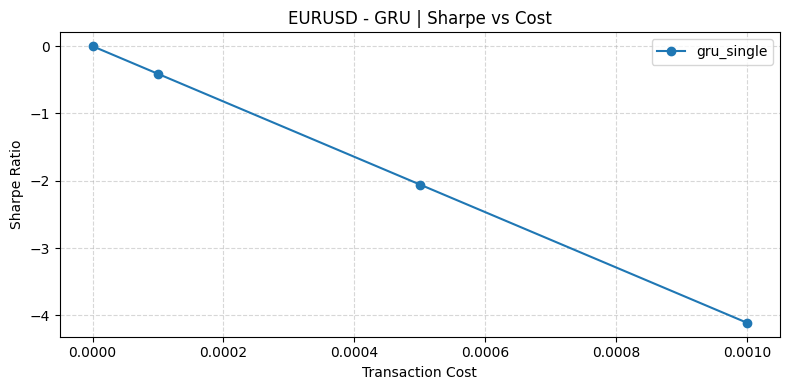

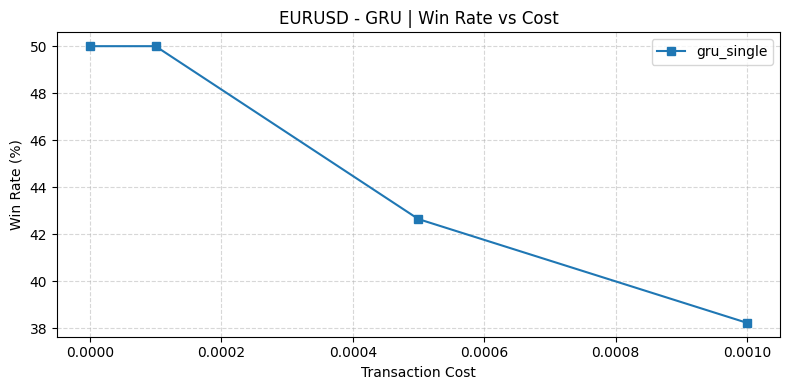

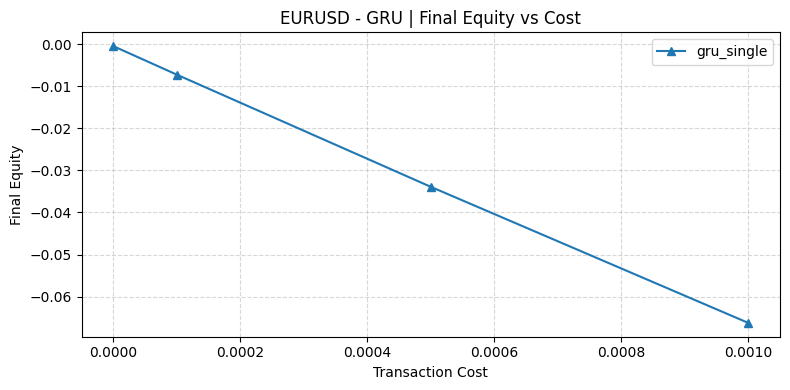

EURUSD | qgru_single | cost=0.0000 | Sharpe=0.0002 | WinRate=50.00%
EURUSD | qgru_single | cost=0.0001 | Sharpe=-0.4109 | WinRate=50.00%
EURUSD | qgru_single | cost=0.0005 | Sharpe=-2.0552 | WinRate=42.65%
EURUSD | qgru_single | cost=0.0010 | Sharpe=-4.1106 | WinRate=38.24%


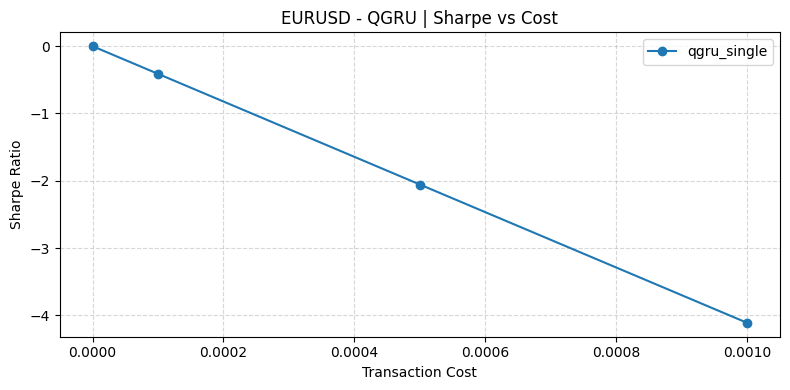

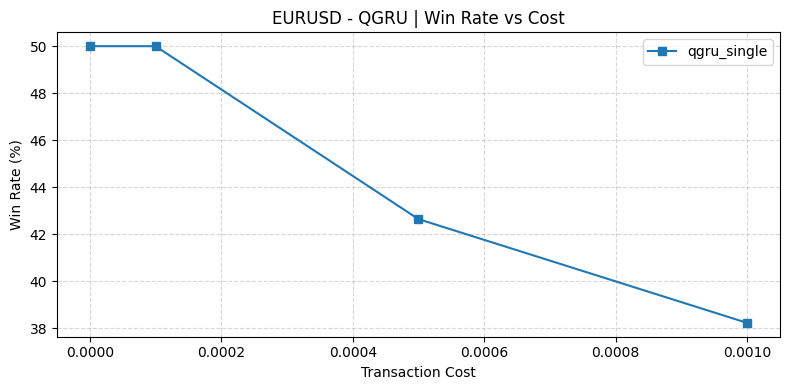

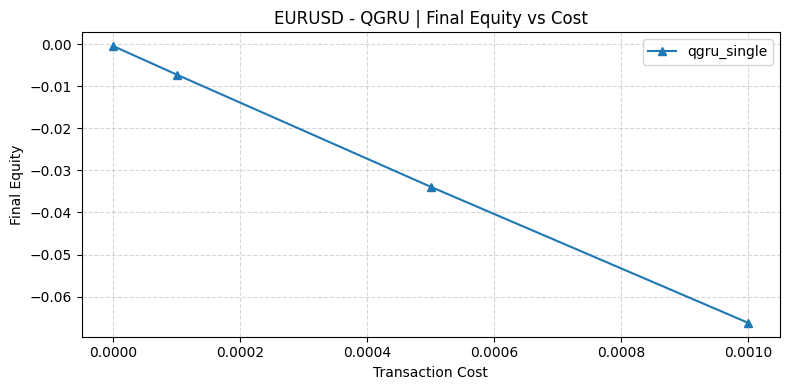

EURUSD | qtransformer_single | cost=0.0000 | Sharpe=0.0002 | WinRate=50.00%
EURUSD | qtransformer_single | cost=0.0001 | Sharpe=-0.4109 | WinRate=50.00%
EURUSD | qtransformer_single | cost=0.0005 | Sharpe=-2.0552 | WinRate=42.65%
EURUSD | qtransformer_single | cost=0.0010 | Sharpe=-4.1106 | WinRate=38.24%


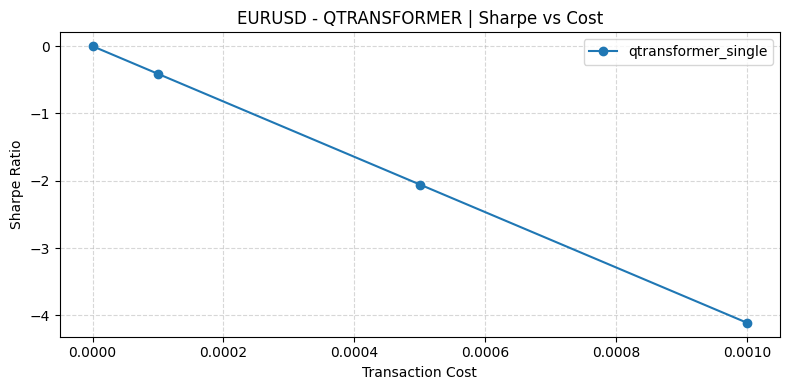

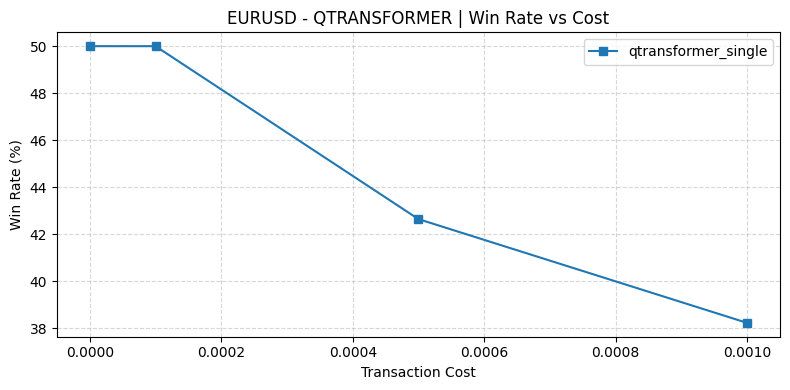

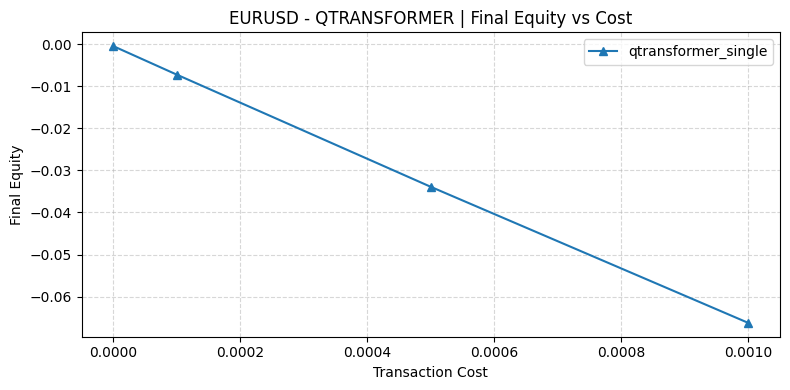


Processing GBPUSD...
GBPUSD | lstm_single | cost=0.0000 | Sharpe=0.4957 | WinRate=51.47%
GBPUSD | lstm_single | cost=0.0001 | Sharpe=0.1154 | WinRate=51.47%
GBPUSD | lstm_single | cost=0.0005 | Sharpe=-1.4058 | WinRate=48.53%
GBPUSD | lstm_single | cost=0.0010 | Sharpe=-3.3073 | WinRate=41.18%


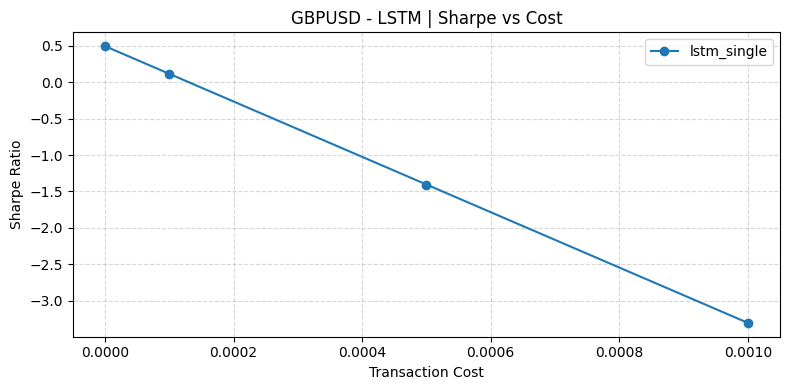

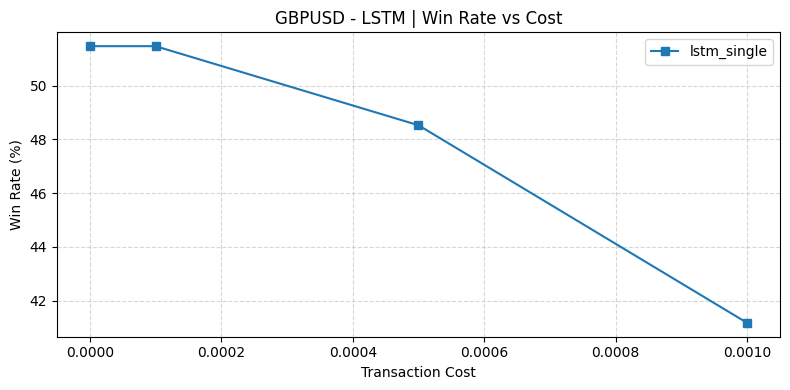

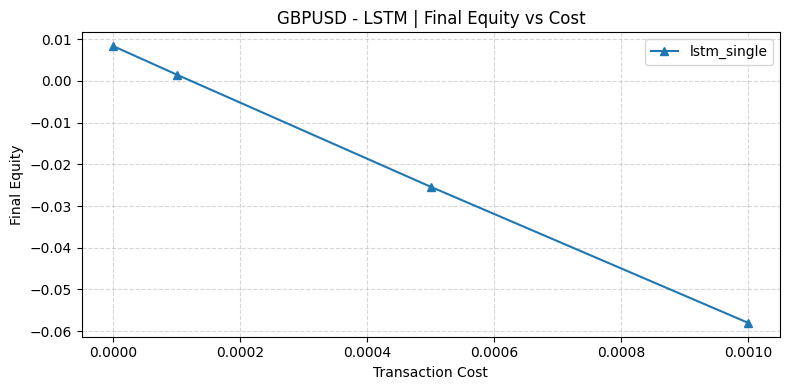

GBPUSD | qlstm_single | cost=0.0000 | Sharpe=0.4957 | WinRate=51.47%
GBPUSD | qlstm_single | cost=0.0001 | Sharpe=0.1154 | WinRate=51.47%
GBPUSD | qlstm_single | cost=0.0005 | Sharpe=-1.4058 | WinRate=48.53%
GBPUSD | qlstm_single | cost=0.0010 | Sharpe=-3.3073 | WinRate=41.18%


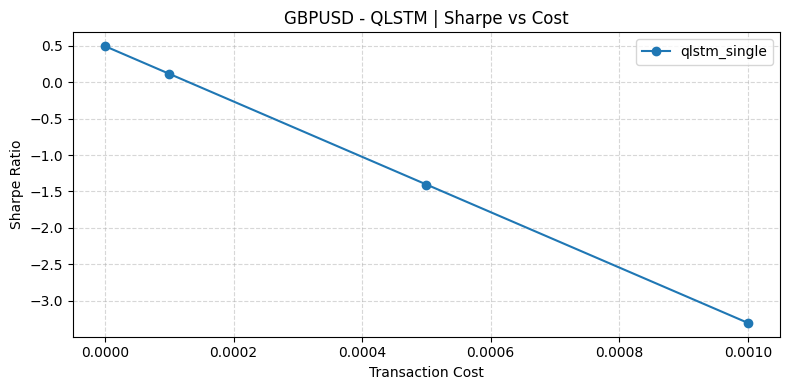

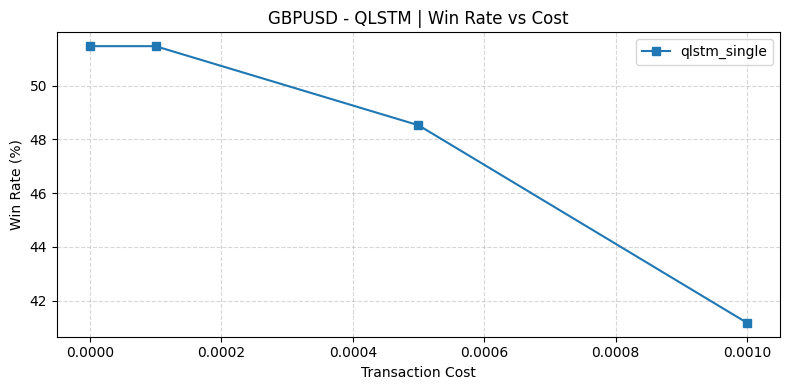

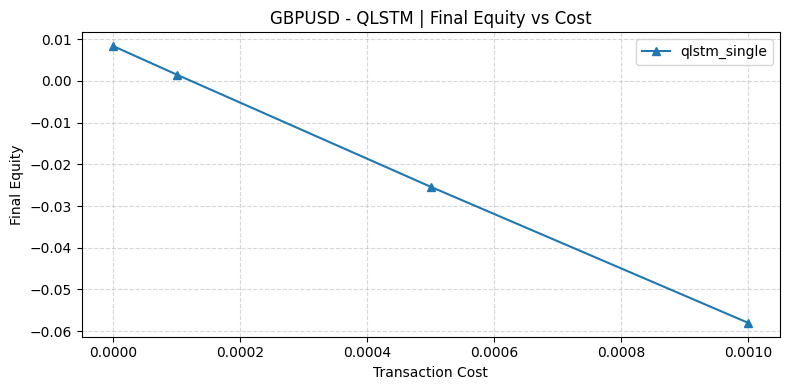

GBPUSD | gru_single | cost=0.0000 | Sharpe=1.7346 | WinRate=52.94%
GBPUSD | gru_single | cost=0.0001 | Sharpe=1.3522 | WinRate=52.94%
GBPUSD | gru_single | cost=0.0005 | Sharpe=-0.1773 | WinRate=50.00%
GBPUSD | gru_single | cost=0.0010 | Sharpe=-2.0892 | WinRate=42.65%


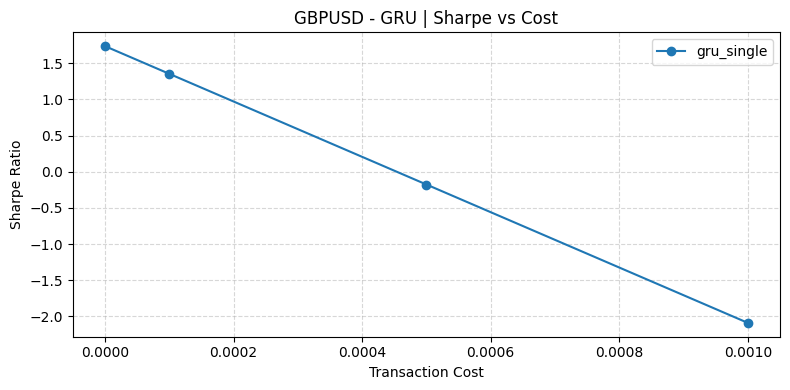

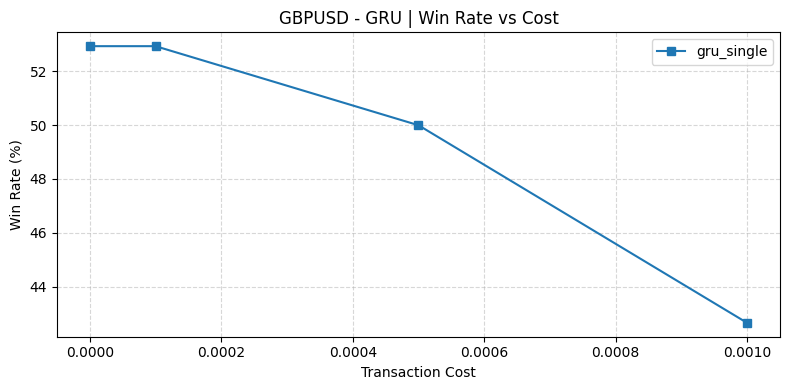

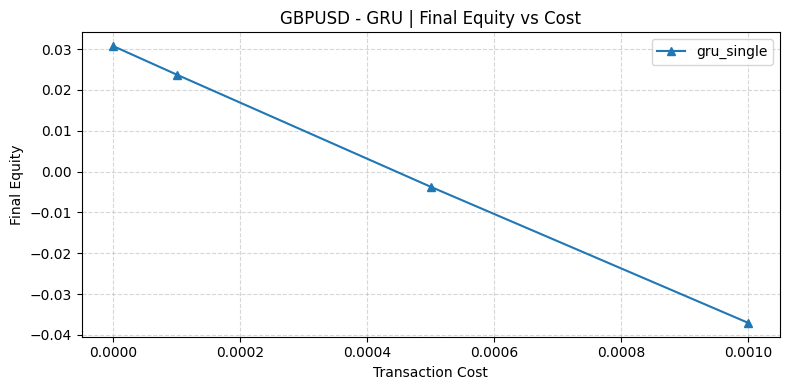

GBPUSD | qgru_single | cost=0.0000 | Sharpe=0.4957 | WinRate=51.47%
GBPUSD | qgru_single | cost=0.0001 | Sharpe=0.1154 | WinRate=51.47%
GBPUSD | qgru_single | cost=0.0005 | Sharpe=-1.4058 | WinRate=48.53%
GBPUSD | qgru_single | cost=0.0010 | Sharpe=-3.3073 | WinRate=41.18%


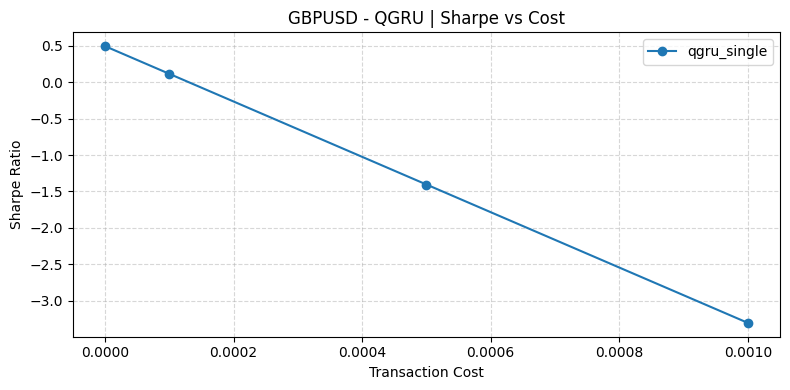

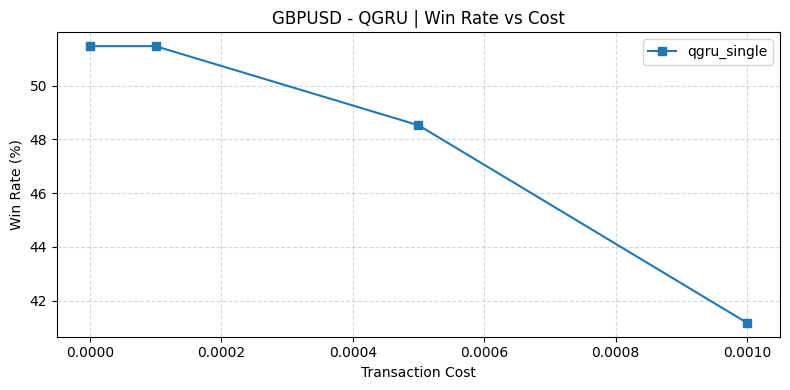

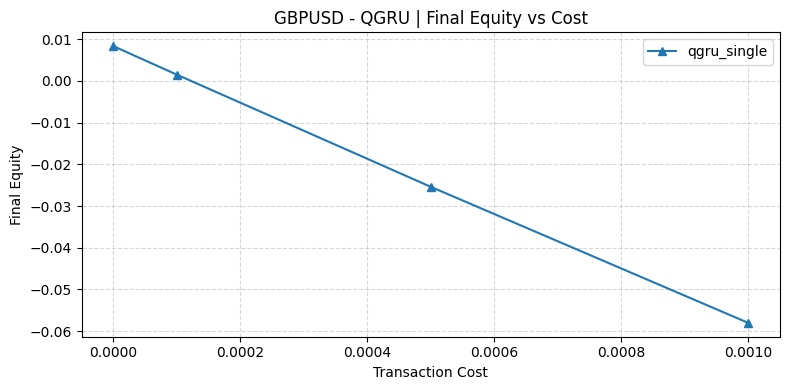

GBPUSD | qtransformer_single | cost=0.0000 | Sharpe=0.4957 | WinRate=51.47%
GBPUSD | qtransformer_single | cost=0.0001 | Sharpe=0.1154 | WinRate=51.47%
GBPUSD | qtransformer_single | cost=0.0005 | Sharpe=-1.4058 | WinRate=48.53%
GBPUSD | qtransformer_single | cost=0.0010 | Sharpe=-3.3073 | WinRate=41.18%


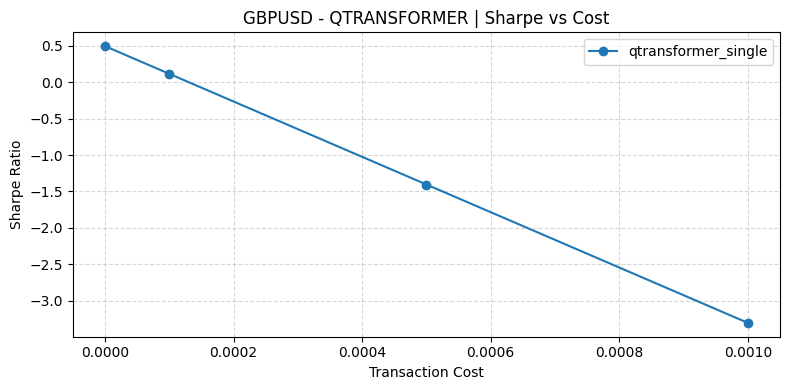

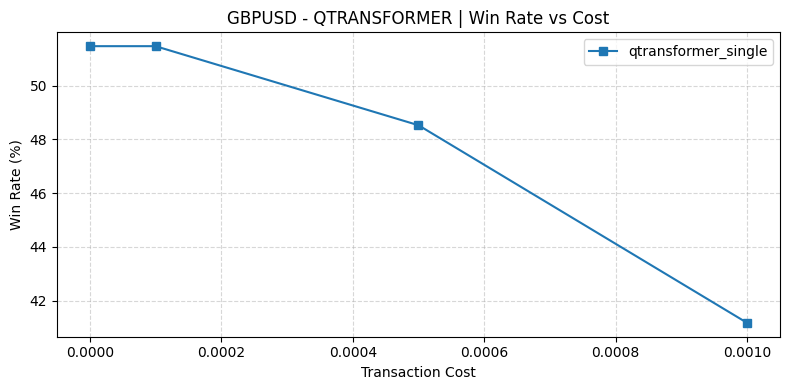

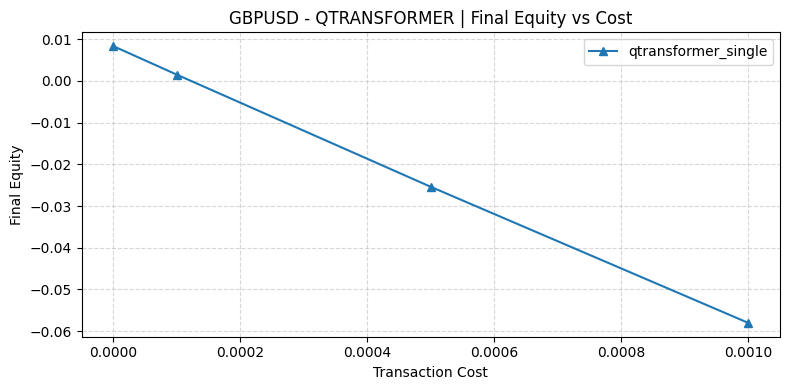


Processing USDJPY...
USDJPY | lstm_single | cost=0.0000 | Sharpe=-1.8803 | WinRate=51.47%
USDJPY | lstm_single | cost=0.0001 | Sharpe=-2.2013 | WinRate=50.00%
USDJPY | lstm_single | cost=0.0005 | Sharpe=-3.4853 | WinRate=47.06%
USDJPY | lstm_single | cost=0.0010 | Sharpe=-5.0902 | WinRate=41.18%


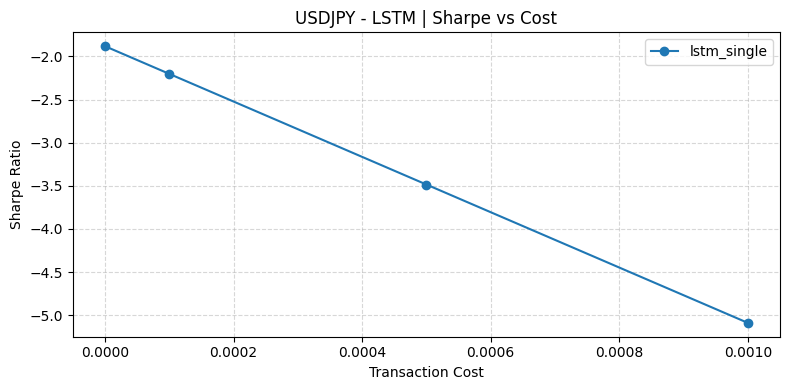

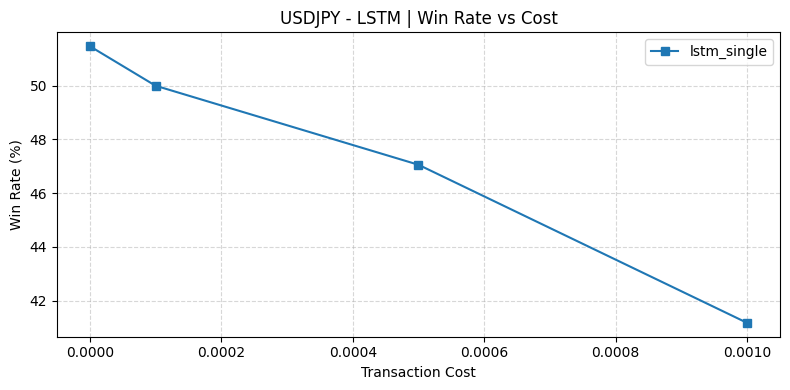

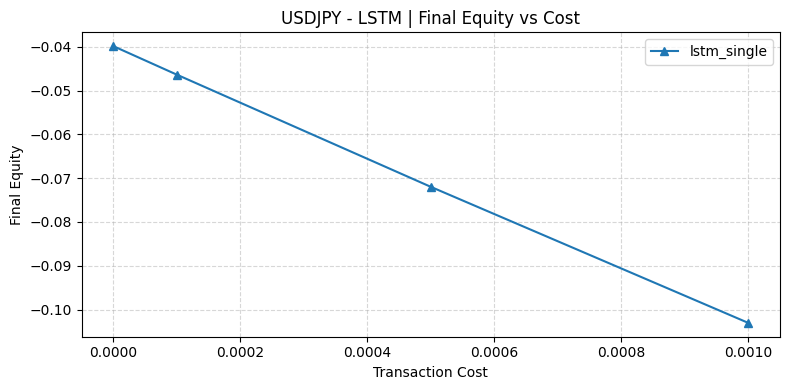

USDJPY | qlstm_single | cost=0.0000 | Sharpe=-1.8803 | WinRate=51.47%
USDJPY | qlstm_single | cost=0.0001 | Sharpe=-2.2013 | WinRate=50.00%
USDJPY | qlstm_single | cost=0.0005 | Sharpe=-3.4853 | WinRate=47.06%
USDJPY | qlstm_single | cost=0.0010 | Sharpe=-5.0902 | WinRate=41.18%


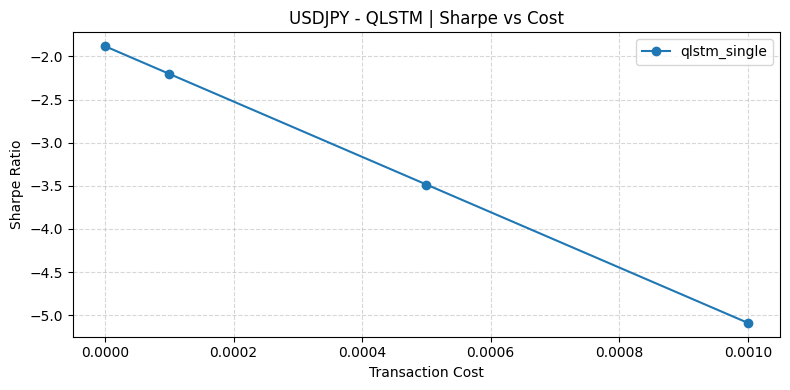

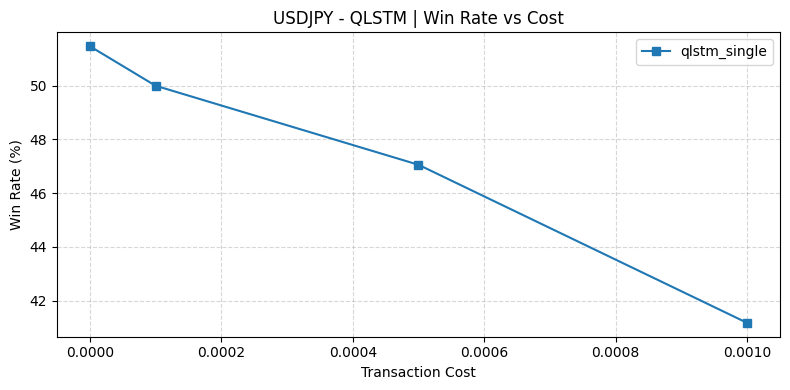

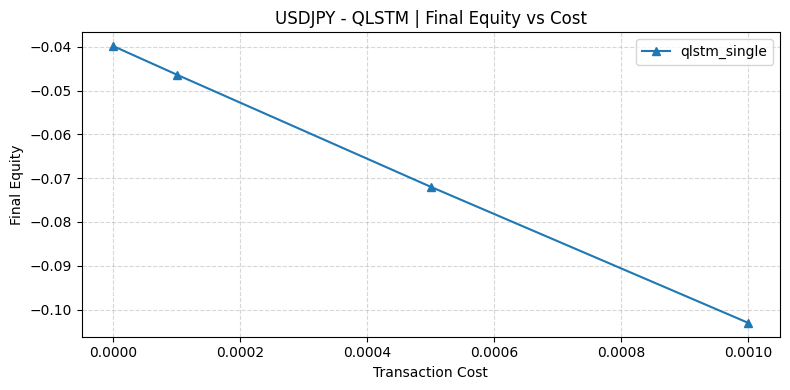

USDJPY | gru_single | cost=0.0000 | Sharpe=1.8803 | WinRate=48.53%
USDJPY | gru_single | cost=0.0001 | Sharpe=1.5594 | WinRate=47.06%
USDJPY | gru_single | cost=0.0005 | Sharpe=0.2754 | WinRate=42.65%
USDJPY | gru_single | cost=0.0010 | Sharpe=-1.3295 | WinRate=42.65%


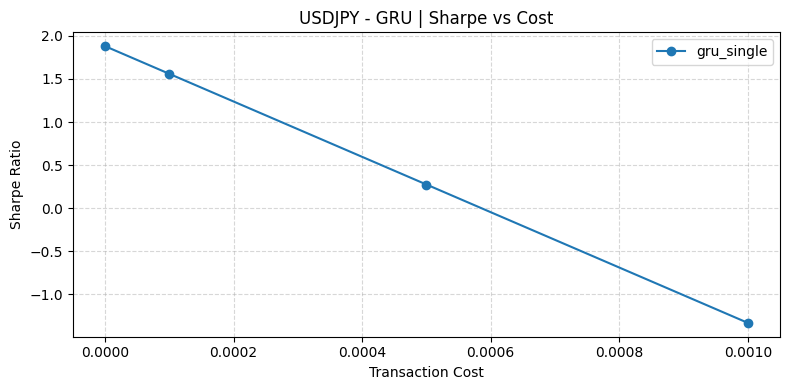

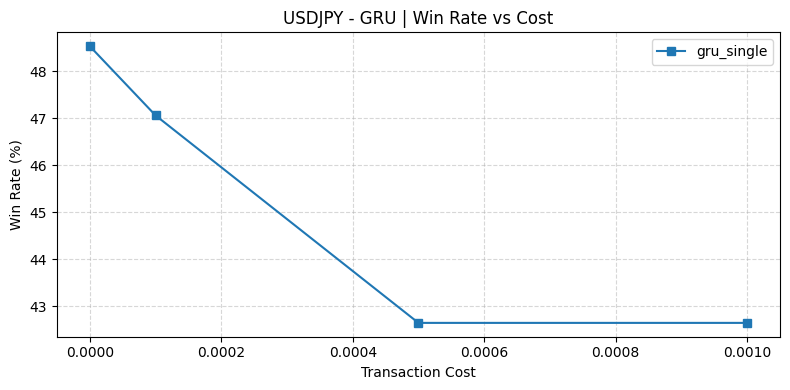

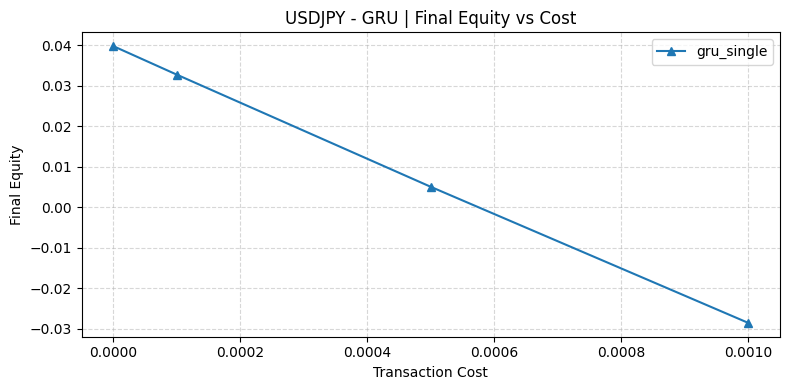

USDJPY | qgru_single | cost=0.0000 | Sharpe=3.1347 | WinRate=51.47%
USDJPY | qgru_single | cost=0.0001 | Sharpe=2.8098 | WinRate=51.47%
USDJPY | qgru_single | cost=0.0005 | Sharpe=1.5102 | WinRate=47.06%
USDJPY | qgru_single | cost=0.0010 | Sharpe=-0.1144 | WinRate=47.06%


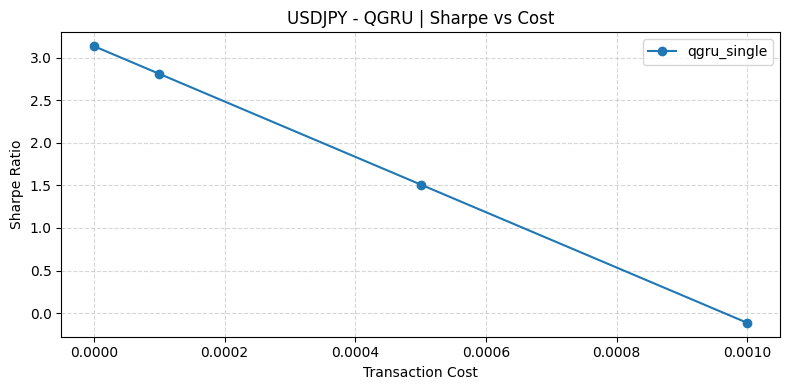

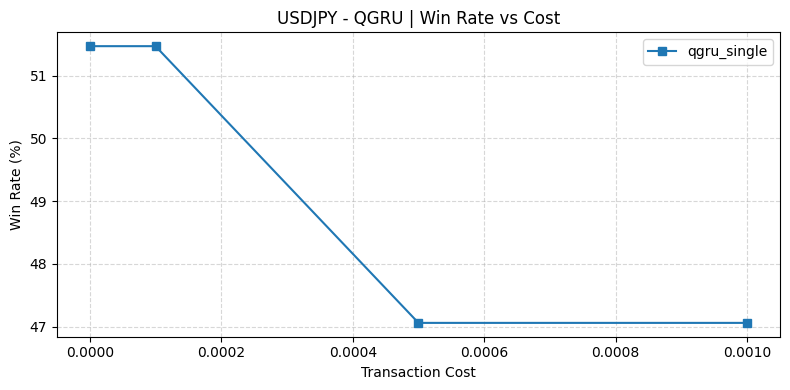

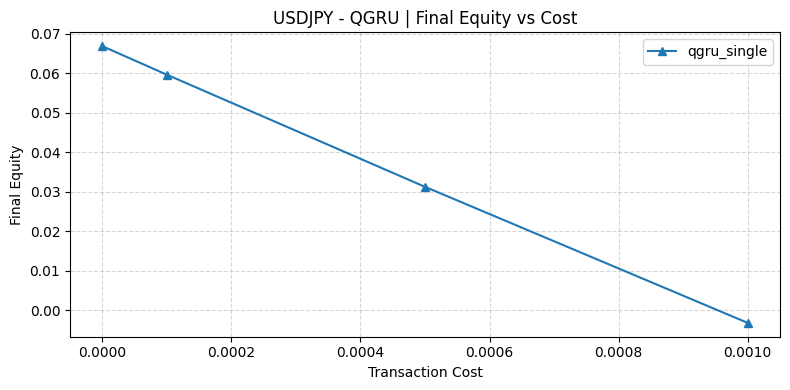

USDJPY | qtransformer_single | cost=0.0000 | Sharpe=1.7248 | WinRate=44.12%
USDJPY | qtransformer_single | cost=0.0001 | Sharpe=1.4042 | WinRate=44.12%
USDJPY | qtransformer_single | cost=0.0005 | Sharpe=0.1216 | WinRate=41.18%
USDJPY | qtransformer_single | cost=0.0010 | Sharpe=-1.4815 | WinRate=41.18%


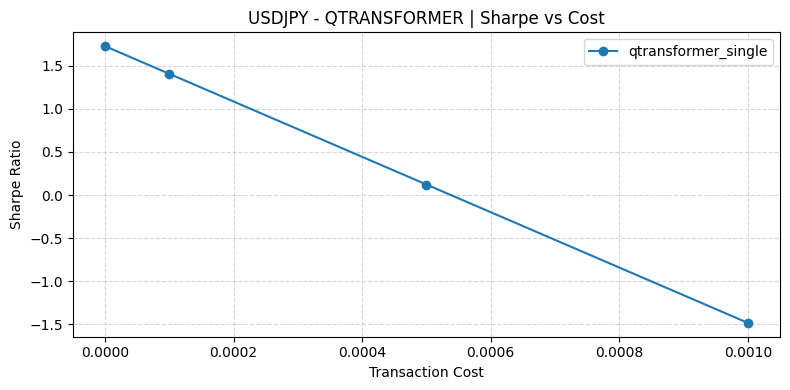

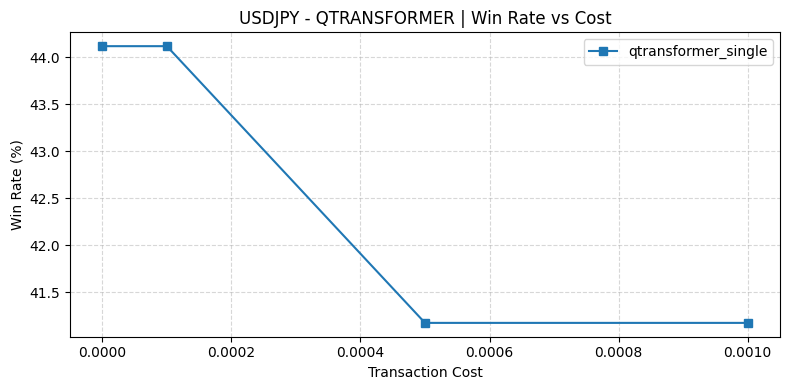

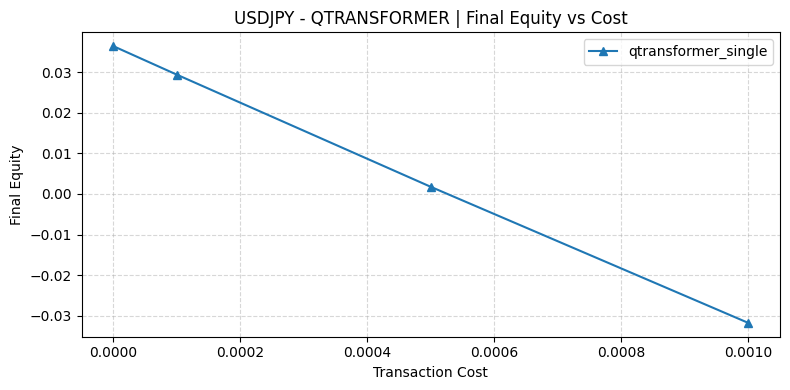


Results saved to /content/drive/MyDrive/quantum_project/universal_backtest_results.csv


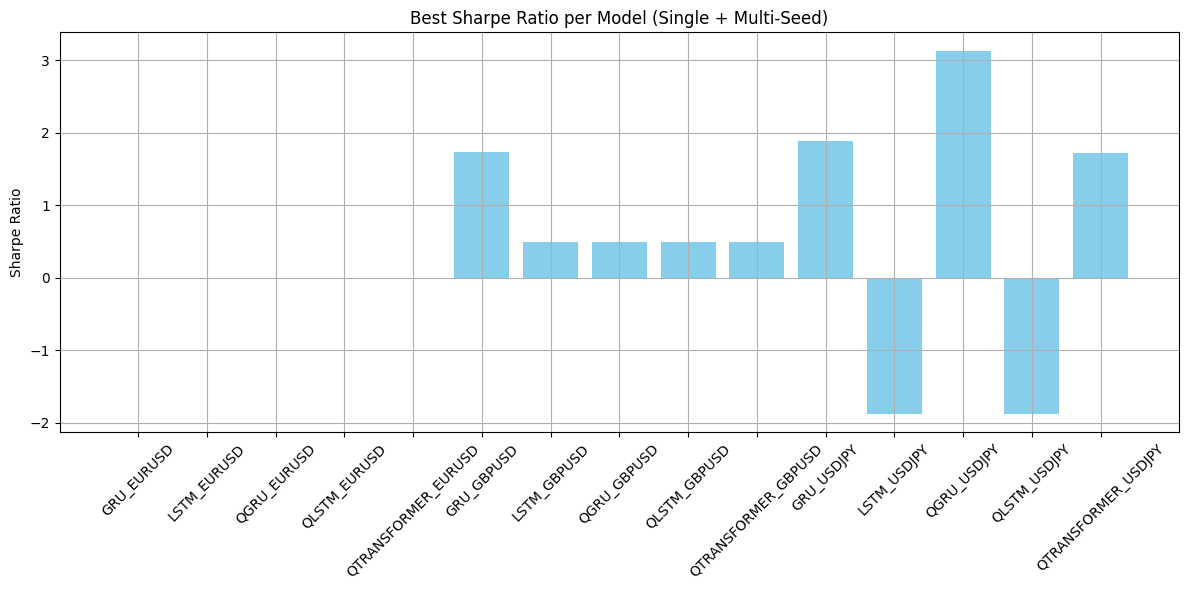

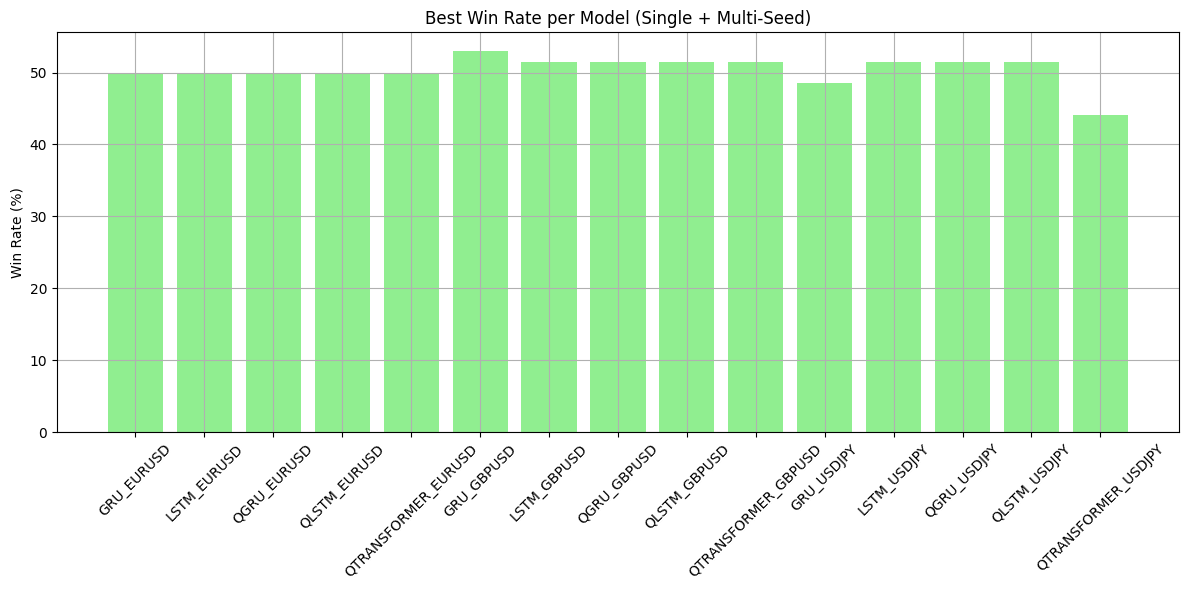

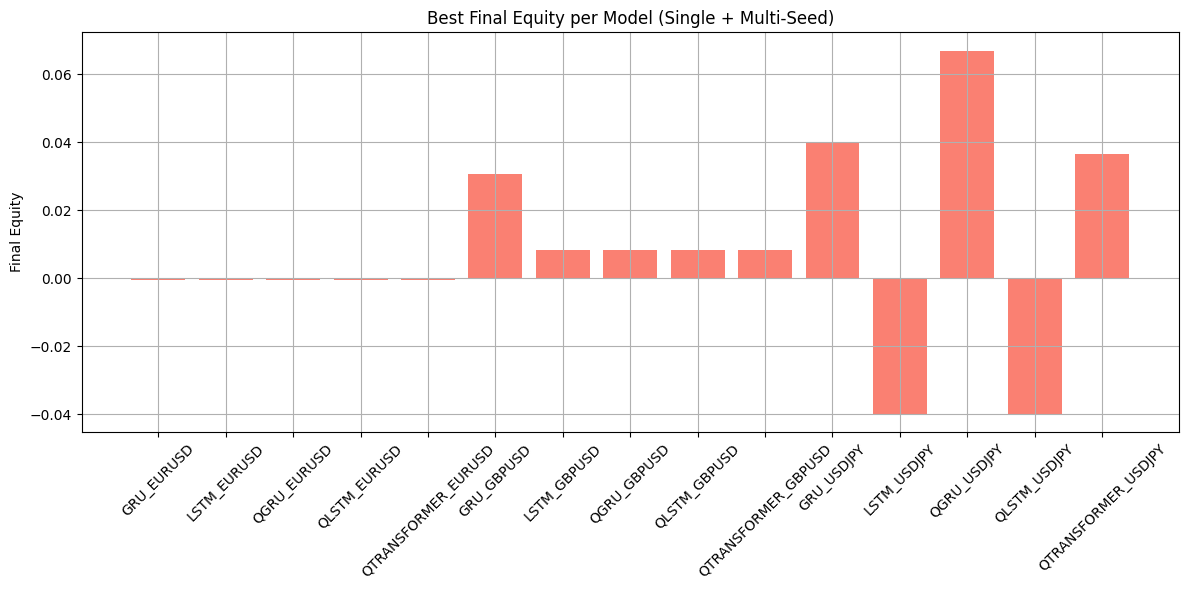


All global and model-level comparison plots generated successfully!


In [ ]:
# Import all the necessary Python libraries
import numpy as np                     # Used for mathematical calculations and array handling
import pandas as pd                    # Used to work with tabular data (reading and saving CSV files)
import matplotlib.pyplot as plt        # Used to create graphs and visual plots
import os                              # Used for file path handling and directory operations

# Define a helper function for a simple backtest that includes transaction costs

def simple_backtest_with_costs(preds, trues, cost=0.0001):
    """
    This function simulates a simple trading strategy using predicted prices.
    It assumes a long position (buy) when prediction >= actual price,
    and a short position (sell) otherwise.
    It also subtracts a transaction cost from each trade.
    """
    rets = []                                         # List to store all calculated trade returns
    for i in range(len(trues) - 1):                   # Loop over all price points except the last
        pos = 1.0 if preds[i] >= trues[i] else -1.0   # Take +1 (buy) if prediction is higher, else -1 (sell)
        ret = pos * ((trues[i + 1] - trues[i]) / max(trues[i], 1e-8)) - cost * abs(pos)
        # The above line computes:
        # - (trues[i+1] - trues[i]) → actual price change
        # - divide by price to get percentage change
        # - multiply by pos to determine direction
        # - subtract cost for each trade made
        rets.append(ret)                              # Store the calculated trade return in list
    return np.array(rets, dtype=float)                # Convert list into numpy array for further use

# Define a helper function to compute key performance metrics from returns

def metrics_from_rets(rets):
    """
    This function calculates the key trading performance metrics:
      - final_equity: total cumulative profit/loss
      - max_dd: maximum drawdown (largest loss from a peak)
      - sharpe: risk-adjusted return
      - trade_count: total number of trades
      - win_rate: percentage of profitable trades
      - profit_factor: ratio of total gains to total losses
    """
    rets = np.nan_to_num(rets, nan=0.0)               # Replace NaN values with zeros for safety

    # If there are no valid returns, return empty metrics
    if len(rets) == 0:
        return {"final_equity": np.nan, "max_dd": np.nan, "sharpe": np.nan,
                "trade_count": 0, "win_rate": np.nan, "profit_factor": np.nan}

    cum = (1 + rets).cumprod() - 1                    # Compute cumulative returns over all trades
    peak = np.maximum.accumulate(cum)                 # Track running maximum value of cumulative returns
    final_eq = float(cum[-1])                         # Get the final total equity (last value)
    max_dd = float(np.min(cum - peak))                # Compute maximum drawdown (drop from peak to bottom)

    # Calculate Sharpe ratio = mean(daily return) / std(daily return) * sqrt(252)
    if np.std(rets) > 0:
        sharpe = float(np.mean(rets) / np.std(rets) * np.sqrt(252))
    else:
        sharpe = np.nan

    wins = rets[rets > 0]                             # Select all positive returns (winning trades)
    losses = -rets[rets < 0]                          # Select all negative returns (losing trades, as positive values)
    win_rate = len(wins) / len(rets) * 100 if len(rets) > 0 else np.nan  # Calculate win rate in percentage
    profit_factor = wins.sum() / (losses.sum() + 1e-9) if len(losses) > 0 else np.nan  # Gain/Loss ratio

    # Return all computed metrics as dictionary
    return {"final_equity": final_eq, "max_dd": max_dd, "sharpe": sharpe,
            "trade_count": len(rets), "win_rate": win_rate, "profit_factor": profit_factor}


# Define configuration and environment setup

DRIVE_DIR = "/content/drive/MyDrive/quantum_project"   # Main folder path on Google Drive
pairs = ["EURUSD", "GBPUSD", "USDJPY"]                 # Currency pairs to test
model_types = ["lstm", "qlstm", "gru", "qgru", "qtransformer"]  # List of model names
costs = [0.0, 0.0001, 0.0005, 0.001]                   # Transaction costs to simulate

# Create a folder to store all final backtest plots if not already existing
os.makedirs(os.path.join(DRIVE_DIR, "backtest_plots_final"), exist_ok=True)

# Create an empty list to store all backtest results
results = []

# Start main backtest loop for each currency pair

for PAIR in pairs:                                     # Loop through all pairs like EURUSD, GBPUSD, etc.
    try:
        # Load the actual market (close price) data for this pair
        df = pd.read_csv(os.path.join(DRIVE_DIR, f"{PAIR}.csv"))
        df.columns = df.columns.str.title()            # Ensure column names are in proper format (e.g., "Close")
        df["Close"] = pd.to_numeric(df["Close"], errors="coerce")  # Convert 'Close' column to numeric
        df.dropna(subset=["Close"], inplace=True)      # Drop rows where 'Close' is missing
        y_te = df["Close"].values                      # Convert close prices into numpy array
        print(f"\nProcessing {PAIR}...")               # Print message showing current pair

        # Loop over each model type
        for model_type in model_types:
            # Find files that match multi-seed predictions for this model and pair
            seed_files = [f for f in os.listdir(DRIVE_DIR)
                          if f.startswith(f"preds_{model_type}_seed") and f.endswith(f"_{PAIR}.npy")]

            # Define the single-seed prediction file path
            single_file = os.path.join(DRIVE_DIR, f"preds_{model_type}_{PAIR}.npy")

            variants = {}                              # Dictionary to store model variant predictions
            if seed_files:
                # If multiple seed prediction files are found, load all of them
                preds_list = []
                for f in seed_files:
                    preds = np.load(os.path.join(DRIVE_DIR, f))   # Load the predictions
                    preds_list.append(preds)                      # Add to list
                    variants[os.path.splitext(f)[0]] = preds      # Save with filename as key
                ensemble = np.mean(np.stack(preds_list), axis=0)  # Take average across all seeds
                variants[f"{model_type}_ensemble"] = ensemble     # Add averaged ensemble prediction
            elif os.path.exists(single_file):
                # If no multi-seed predictions exist, use single prediction file
                variants[f"{model_type}_single"] = np.load(single_file)
            else:
                print(f"No predictions found for {model_type.upper()} ({PAIR})")
                continue

            # Loop over each model variant (single and ensemble)
            for name, preds in variants.items():
                min_len = min(len(y_te), len(preds))     # Align prediction and actual array lengths
                preds, y = preds[-min_len:], y_te[-min_len:]

                # Evaluate model under different transaction cost settings
                for c in costs:
                    rets = simple_backtest_with_costs(preds, y, c)  # Compute simulated returns
                    m = metrics_from_rets(rets)                     # Get metrics from returns
                    m.update({"pair": PAIR, "model": model_type.upper(), "variant": name, "cost": c})
                    results.append(m)                               # Save this record to results list
                    print(f"{PAIR} | {name} | cost={c:.4f} | Sharpe={m['sharpe']:.4f} | WinRate={m['win_rate']:.2f}%")

            # Create DataFrame with all results for current pair and model
            df_sub = pd.DataFrame([r for r in results if r["pair"] == PAIR and r["model"] == model_type.upper()])
            if len(df_sub) == 0:
                continue

            out_dir = os.path.join(DRIVE_DIR, "backtest_plots_final")  # Directory for saving plots


            # Plot Sharpe Ratio vs Transaction Cost

            plt.figure(figsize=(8, 4))
            for v in df_sub["variant"].unique():
                sub = df_sub[df_sub["variant"] == v]
                plt.plot(sub["cost"], sub["sharpe"], marker="o", label=v)
            plt.title(f"{PAIR} - {model_type.upper()} | Sharpe vs Cost")
            plt.xlabel("Transaction Cost"); plt.ylabel("Sharpe Ratio")
            plt.legend(); plt.grid(True, linestyle='--', alpha=0.5)
            plt.tight_layout(); plt.show()
            plt.savefig(os.path.join(out_dir, f"{PAIR}_{model_type}_Sharpe_vs_Cost.png"))
            plt.close()


            # Plot Win Rate vs Transaction Cost

            plt.figure(figsize=(8, 4))
            for v in df_sub["variant"].unique():
                sub = df_sub[df_sub["variant"] == v]
                plt.plot(sub["cost"], sub["win_rate"], marker="s", label=v)
            plt.title(f"{PAIR} - {model_type.upper()} | Win Rate vs Cost")
            plt.xlabel("Transaction Cost"); plt.ylabel("Win Rate (%)")
            plt.legend(); plt.grid(True, linestyle='--', alpha=0.5)
            plt.tight_layout(); plt.show()
            plt.savefig(os.path.join(out_dir, f"{PAIR}_{model_type}_WinRate_vs_Cost.png"))
            plt.close()


            # Plot Final Equity vs Transaction Cost

            plt.figure(figsize=(8, 4))
            for v in df_sub["variant"].unique():
                sub = df_sub[df_sub["variant"] == v]
                plt.plot(sub["cost"], sub["final_equity"], marker="^", label=v)
            plt.title(f"{PAIR} - {model_type.upper()} | Final Equity vs Cost")
            plt.xlabel("Transaction Cost"); plt.ylabel("Final Equity")
            plt.legend(); plt.grid(True, linestyle='--', alpha=0.5)
            plt.tight_layout(); plt.show()
            plt.savefig(os.path.join(out_dir, f"{PAIR}_{model_type}_Equity_vs_Cost.png"))
            plt.close()

    except Exception as e:
        print(f"Failed for {PAIR}: {e}")                # Print error message if any issue occurs


# Save all results to a CSV file for record keeping

df_all = pd.DataFrame(results)                         # Convert results list to DataFrame
out_csv = os.path.join(DRIVE_DIR, "universal_backtest_results.csv")
df_all.to_csv(out_csv, index=False)                    # Save to CSV in Drive
print(f"\nResults saved to {out_csv}")


# Global model comparison charts for Sharpe, Win Rate, and Equity

df_best = df_all.loc[df_all.groupby(['pair', 'model', 'variant'])['sharpe'].idxmax()]  # Select best Sharpe ratio per model

# 1. Compare Sharpe Ratios across models
plt.figure(figsize=(12,6))
plt.bar(df_best["model"] + "_" + df_best["pair"], df_best["sharpe"], color="skyblue")
plt.xticks(rotation=45)
plt.title("Best Sharpe Ratio per Model (Single + Multi-Seed)")
plt.ylabel("Sharpe Ratio")
plt.tight_layout()
plt.show()

# 2. Compare Win Rates across models
plt.figure(figsize=(12,6))
plt.bar(df_best["model"] + "_" + df_best["pair"], df_best["win_rate"], color="lightgreen")
plt.xticks(rotation=45)
plt.title("Best Win Rate per Model (Single + Multi-Seed)")
plt.ylabel("Win Rate (%)")
plt.tight_layout()
plt.show()

# 3. Compare Final Equity across models
plt.figure(figsize=(12,6))
plt.bar(df_best["model"] + "_" + df_best["pair"], df_best["final_equity"], color="salmon")
plt.xticks(rotation=45)
plt.title("Best Final Equity per Model (Single + Multi-Seed)")
plt.ylabel("Final Equity")
plt.tight_layout()
plt.show()

# Print completion message
print("\nAll global and model-level comparison plots generated successfully!")


###Multi-Seed Feature Sensitivity Comparison (Visualization and Saving)

This cell loads the mean and standard deviation of feature sensitivities for all models trained under multiple seeds.
It then plots a grouped bar chart comparing how sensitive each model’s predictions are to changes in input features.

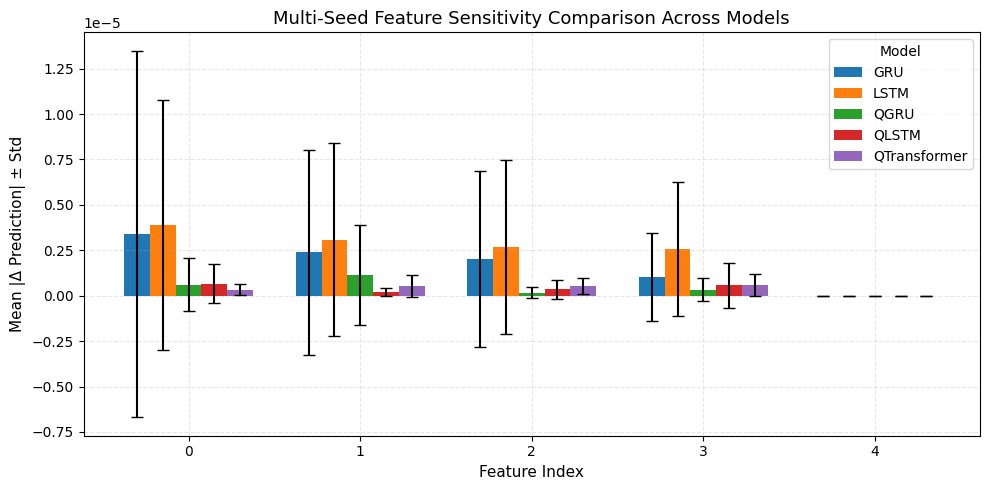

Multi-seed sensitivity plot saved to /content/drive/MyDrive/quantum_project/Feature_Sensitivity_Comparison_MultiSeed.png


<Figure size 1000x400 with 0 Axes>

In [ ]:
# Import all required libraries
import os                      # for file and path handling
import pandas as pd             # for reading and managing tabular data
import matplotlib.pyplot as plt # for creating visual plots
import numpy as np              # for array and math operations

# Set the directory path where model data is stored
MODEL_DIR = "/content/drive/MyDrive/quantum_project"

# Define the full path of the combined sensitivity results CSV
csv_path = os.path.join(MODEL_DIR, "sensitivity_all_models_mean_std.csv")

# Read the combined multi-seed sensitivity data
df = pd.read_csv(csv_path)

# Check that the CSV file contains all required columns
# ('model' for model name, 'feature_idx' for feature number,
#  'mean' for mean sensitivity, and 'std' for standard deviation)
if not {"model", "feature_idx", "mean", "std"}.issubset(df.columns):
    raise ValueError("CSV missing required columns (model, feature_idx, mean, std).")

# Sort data by feature index and model name for consistent plotting
df = df.sort_values(["feature_idx", "model"])

# Extract unique models and features for plotting
models = df["model"].unique()            # list of model names
features = df["feature_idx"].unique()    # list of input feature indices

# Create numerical x-axis positions for features
x = np.arange(len(features))

# Define bar width for grouped bars (so each model has its own small bar)
width = 0.15

# Create a new figure for the grouped bar chart
plt.figure(figsize=(10, 5))

# Loop over each model to plot its mean ± std sensitivity values
for i, model in enumerate(models):
    sub = df[df["model"] == model]       # get only rows for this model
    means = sub["mean"].values           # mean sensitivity values
    stds = sub["std"].values             # corresponding standard deviations
    # Plot one group of bars for this model
    plt.bar(x + i*width, means, width, yerr=stds, label=model, capsize=4)

# Add plot title and axis labels
plt.title("Multi-Seed Feature Sensitivity Comparison Across Models", fontsize=13)
plt.xlabel("Feature Index", fontsize=11)
plt.ylabel("Mean |Δ Prediction| ± Std", fontsize=11)

# Adjust x-ticks to center below grouped bars
plt.xticks(x + width * (len(models)-1)/2, features)

# Add legend showing model names
plt.legend(title="Model")

# Add faint grid lines for better readability
plt.grid(alpha=0.3, linestyle="--")

# Adjust spacing so labels and titles fit neatly
plt.tight_layout()

# Show the bar chart directly in the notebook
plt.show()

# Save a high-resolution version of the figure in the project folder
out_path = os.path.join(MODEL_DIR, "Feature_Sensitivity_Comparison_MultiSeed.png")
plt.savefig(out_path, dpi=300)
print(f"Multi-seed sensitivity plot saved to {out_path}")



###Multi-Seed Accuracy Evaluation Across Models

This cell checks how consistent each model’s performance is across different random seeds.
It loads predictions from each seed, compares them with the actual prices, calculates RMSE, MAE, and direction accuracy, averages them across seeds, and saves the final summarized results to a CSV file.

In [ ]:
# Import required libraries for handling files, arrays, and data frames
import os                   # Used to access files and folders easily
import numpy as np           # Used for mathematical operations and arrays
import pandas as pd          # Used for structured data storage and CSV handling

# Define main working directory on Google Drive where all data is stored
DRIVE_DIR = "/content/drive/MyDrive/quantum_project"

# Define all currency pairs for evaluation
pairs = ["EURUSD", "GBPUSD", "USDJPY"]

# Define all model names to be evaluated
models = ["LSTM", "QLSTM", "GRU", "QGRU", "QTransformer"]

# Define the seed values used during training (to check model consistency)
seeds = [1, 2, 3, 4, 5]


# Define a helper function to compute evaluation metrics

def compute_metrics(preds, trues):
    """
    preds : model predictions
    trues : actual true price values
    This function calculates:
      - RMSE (Root Mean Squared Error)
      - MAE  (Mean Absolute Error)
      - Directional Accuracy (how often direction of price change is correct)
    """
    preds, trues = np.array(preds), np.array(trues)        # Convert both lists to numpy arrays for mathematical operations
    rmse = np.sqrt(np.mean((preds - trues) ** 2))          # RMSE formula: sqrt(mean of squared differences)
    mae = np.mean(np.abs(preds - trues))                   # MAE formula: mean of absolute differences
    dir_acc = np.mean(np.sign(np.diff(preds))              # Calculate how often predicted direction matches actual direction
                      == np.sign(np.diff(trues))) * 100    # Convert to percentage accuracy
    return {"RMSE": rmse, "MAE": mae, "DirAcc": dir_acc}   # Return all metrics as a dictionary


# Create an empty list to store all results for all models and pairs
results = []


# Loop through each currency pair

for pair in pairs:
    print(f"\nPair: {pair}")   # Print the pair being processed

    # Define path for actual (true) closing price data saved earlier
    true_path = os.path.join(DRIVE_DIR, f"true_{pair}.npy")

    # Check if the true price file exists
    if not os.path.exists(true_path):
        print(f"Missing true labels for {pair}")
        continue

    # Load the actual closing prices for this currency pair
    y_true = np.load(true_path)


    # Loop through each model for this pair

    for model in models:
        metrics_per_seed = []  # To store metrics for all seeds of this model

        # Loop through each seed version of the model

        for seed in seeds:
            # Construct the file path for this model's prediction for current seed
            pred_path = os.path.join(DRIVE_DIR, f"preds_{model}_seed{seed}.npy")

            # If this seed’s prediction file doesn’t exist, skip it
            if not os.path.exists(pred_path):
                print(f"Missing {model} seed{seed} predictions for {pair}")
                continue

            # Load predictions from the file
            preds = np.load(pred_path)

            # Ensure both prediction and true arrays are of equal length
            min_len = min(len(preds), len(y_true))
            preds, trues = preds[-min_len:], y_true[-min_len:]

            # Compute metrics for this particular seed
            m = compute_metrics(preds, trues)

            # Append metrics to the list for this model
            metrics_per_seed.append(m)

            # Add one complete record (row) to the main results list
            results.append({
                "Pair": pair,        # Currency pair name
                "Model": model,      # Model type
                "Seed": seed,        # Current seed number
                **m                  # Expand metrics dictionary (RMSE, MAE, DirAcc)
            })


        # After all seeds are processed, calculate mean ± standard deviation

        if len(metrics_per_seed) > 0:
            df = pd.DataFrame(metrics_per_seed)                    # Convert list to DataFrame
            mean_rmse, std_rmse = df["RMSE"].mean(), df["RMSE"].std()  # Mean and std deviation of RMSE
            mean_mae, std_mae = df["MAE"].mean(), df["MAE"].std()      # Mean and std deviation of MAE
            mean_dir, std_dir = df["DirAcc"].mean(), df["DirAcc"].std()# Mean and std deviation of Direction Accuracy

            # Print summary of averaged results for this model and pair
            print(f"{model}: RMSE={mean_rmse:.5f}±{std_rmse:.5f} | "
                  f"MAE={mean_mae:.5f}±{std_mae:.5f} | "
                  f"DirAcc={mean_dir:.2f}±{std_dir:.2f}%")

            # Append the averaged record to results for summary CSV
            results.append({
                "Pair": pair,
                "Model": model,
                "Seed": "Mean±Std",
                "RMSE": f"{mean_rmse:.5f} ± {std_rmse:.5f}",
                "MAE": f"{mean_mae:.5f} ± {std_mae:.5f}",
                "DirAcc": f"{mean_dir:.2f} ± {std_dir:.2f}"
            })



# Save the results into a CSV file for future reference

df_results = pd.DataFrame(results)                      # Convert collected data to DataFrame
out_path = os.path.join(DRIVE_DIR, "multi_seed_accuracy_results.csv")  # Output file path
df_results.to_csv(out_path, index=False)                # Save to CSV in Drive folder
print(f"\nMulti-seed accuracy results saved to {out_path}")


# Generate and display a summary showing only the mean±std rows

df_summary = df_results[df_results["Seed"] == "Mean±Std"][["Pair", "Model", "RMSE", "MAE", "DirAcc"]]
print("\nSummary of multi-seed accuracy:")

# Display neatly in Colab as a table
display(df_summary)



Pair: EURUSD
LSTM: RMSE=0.77726±0.00220 | MAE=0.76864±0.00224 | DirAcc=41.18±2.94%
QLSTM: RMSE=0.77640±0.00759 | MAE=0.76681±0.00791 | DirAcc=45.59±3.29%
GRU: RMSE=0.77192±0.00381 | MAE=0.76330±0.00399 | DirAcc=40.59±2.87%
QGRU: RMSE=0.77252±0.00784 | MAE=0.76367±0.00735 | DirAcc=47.94±3.97%
QTransformer: RMSE=0.76163±0.01125 | MAE=0.75225±0.01182 | DirAcc=44.71±2.23%

Pair: GBPUSD
LSTM: RMSE=0.95173±0.00220 | MAE=0.94403±0.00224 | DirAcc=39.12±1.32%
QLSTM: RMSE=0.95071±0.00764 | MAE=0.94221±0.00791 | DirAcc=43.53±1.97%
GRU: RMSE=0.94638±0.00384 | MAE=0.93870±0.00399 | DirAcc=39.12±2.87%
QGRU: RMSE=0.94694±0.00777 | MAE=0.93907±0.00735 | DirAcc=43.53±3.97%
QTransformer: RMSE=0.93596±0.01136 | MAE=0.92765±0.01182 | DirAcc=39.71±3.45%

Pair: USDJPY
LSTM: RMSE=148.85008±0.00224 | MAE=148.83338±0.00224 | DirAcc=59.12±1.61%
QLSTM: RMSE=148.84820±0.00794 | MAE=148.83156±0.00791 | DirAcc=58.24±2.46%
GRU: RMSE=148.84475±0.00400 | MAE=148.82804±0.00399 | DirAcc=63.82±3.54%
QGRU: RMSE=148.84512

Pair         Model                 RMSE                  MAE  \
5   EURUSD          LSTM    0.77726 ± 0.00220    0.76864 ± 0.00224   
11  EURUSD         QLSTM    0.77640 ± 0.00759    0.76681 ± 0.00791   
17  EURUSD           GRU    0.77192 ± 0.00381    0.76330 ± 0.00399   
23  EURUSD          QGRU    0.77252 ± 0.00784    0.76367 ± 0.00735   
29  EURUSD  QTransformer    0.76163 ± 0.01125    0.75225 ± 0.01182   
35  GBPUSD          LSTM    0.95173 ± 0.00220    0.94403 ± 0.00224   
41  GBPUSD         QLSTM    0.95071 ± 0.00764    0.94221 ± 0.00791   
47  GBPUSD           GRU    0.94638 ± 0.00384    0.93870 ± 0.00399   
53  GBPUSD          QGRU    0.94694 ± 0.00777    0.93907 ± 0.00735   
59  GBPUSD  QTransformer    0.93596 ± 0.01136    0.92765 ± 0.01182   
65  USDJPY          LSTM  148.85008 ± 0.00224  148.83338 ± 0.00224   
71  USDJPY         QLSTM  148.84820 ± 0.00794  148.83156 ± 0.00791   
77  USDJPY           GRU  148.84475 ± 0.00400  148.82804 ± 0.00399   
83  USDJPY          QGRU  148.84512 ± 0.00725  148.82841 ± 0.00735   
89  USDJPY  QTransformer  148.83366 ± 0.01186  148.81700 ± 0.01182   

          DirAcc  
5   41.18 ± 2.94  
11  45.59 ± 3.29  
17  40.59 ± 2.87  
23  47.94 ± 3.97  
29  44.71 ± 2.23  
35  39.12 ± 1.32  
41  43.53 ± 1.97  
47  39.12 ± 2.87  
53  43.53 ± 3.97  
59  39.71 ± 3.45  
65  59.12 ± 1.61  
71  58.24 ± 2.46  
77  63.82 ± 3.54  
83  56.47 ± 3.97  
89  60.29 ± 3.45